<table align="left" width=100%>
    <tr>
        <td width="20%">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b>  Brazilian E-Commerce Public Dataset By Olist </b>
                </font>
            </div>
        </td>
        <td width="25%">
        </td>
    </tr>
</table>


# Table of Content


1. **[About Dataset](#data)**
2. **[Import Libraries](#lib)**
3. **[Reading the datasets](#read)**
4. **[Exploratory Data Analysis](#eda)**
    - 4.1. **[Exploratory Data Analysis on Customers Dataframe](#customers)**
    - 4.2. **[Exploratory Data Analysis on orderItems Dataframe](#orderItems)**
    - 4.3. **[Exploratory Data Analysis on Payments DataFrame](#payments)**
    - 4.4. **[Exploratory DataAnalysis On Order reviews dataframe](#reviews)**
    - 4.5. **[Exploratory Data Analysis On Orders dataframe](#orders)**
    - 4.6. **[Exploratory Data Analysis On Products dataframe](#products)**
5. **[Merging the individual datasets](#merge)**
6. **[Creating a grouped-by dataframe based on individual customers](#Grp)**
7. **[RMF Analysis](#rmf)**
8. **[Recency](#recency)**
9. **[Frequency](#frequency)**
10. **[Monetary](#monetary)**
11. **[Analysing the RFM data](#rfmanalysis)**
12. **[Customer Segmentation](#seg)**
    - 12.1. **[Labels for Recency](#lare)**
    - 12.2. **[Labels for Monetary](#lamy)**
    - 12.3. **[Labels for Frequency](#lafr)**
    - 12.4. **[Meaning of ranks](#ranking)**
13. **[Creating a target variable](#target)**
14. **[Merging the target variable with our final dataframe](#finaldf)**
15. **[Outlier Treatement](#out)**
16. **[Missing Value Treatement](#miss)**
17. **[Exploratory Data Analysis](#edafinal)**
18. **[Statistical Tests](#stats)**
19. **[Transformation of Data](#trans)**
20. **[Classification Model](#class)**
21. **[Model Building](#model)**

<a id="data"></a>
# About Dataset

## Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.<br>

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.<br>

### Join it With the Marketing Funnel by Olist
We have also released a Marketing Funnel Dataset. You may join both datasets and see an order from Marketing perspective now!<br>
https://www.kaggle.com/olistbr/marketing-funnel-olist/home<br>

Instructions on joining are available on this Kernel.<br>
https://www.kaggle.com/andresionek/joining-marketing-funnel-with-brazilian-e-commerce<br>

### Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. <br>
See more on our website: www.olist.com<br>

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.<br>

### Attention
- An order might have multiple items.
- Each item might be fulfilled by a distinct seller.
- All text identifying stores and partners where replaced by the names of Game of Thrones great houses.<br>

### Example of a product listing on a marketplace
<img src = "website.png" width = "600" height = "600">


### Data Schema
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:
<img src = "dataSchema.png" width = "600" height = "600">

### Classified Dataset
We had previously released a classified dataset, but we removed it at Version 6. We intend to release it again as a new dataset with a new data schema. While we don't finish it, you may use the classified dataset available at the Version 5 or previous.

### Inspiration
Here are some inspiration for possible outcomes from this dataset.

### NLP:
This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

### Clustering:
Some customers didn't write a review. But why are they happy or mad?

### Sales Prediction:
With purchase date information you'll be able to predict future sales.

### Delivery Performance:
You will also be able to work through delivery performance and find ways to optimize delivery times.

### Product Quality:
Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

### Feature Engineering:
Create features from this rich dataset or attach some external public information to it.

<a id="lib"></a>
# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from datetime import datetime as dt

# To visualize the geographical coordinates in the world map
import folium
from folium.plugins import HeatMap

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# To display all the columns in the dataframe
pd.set_option('display.max_columns', None)

<a id="read"></a>
# Reading the datasets

In [3]:
#Olist E-Commerce datasets
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
orderItems = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
orderReviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
productCategoryTranslation = pd.read_csv("product_category_name_translation.csv")

#Marketing Funnel datasets
closedDeals = pd.read_csv("olist_closed_deals_dataset.csv")
marketingQuantifiedLeads = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")

**Observation:** <br>
1. We will not be using the datasets in the marketing funnel. But they can be merged to further the project.

<a id="eda"></a>
# Understanding the datasets

<a id = 'customers'></a>
## 1.Exploratory Data Analysis on Customers Dataframe

In [4]:
customers.head(3)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP

In [5]:
print('Number of records:',customers.shape[0])
print('Number of columns:',customers.shape[1])

Number of records: 99441
Number of columns: 5


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**observation:**
1. There are 4 categorical variables: `customer_id`, `customer_unique_id`, `customer_city`, `customer_state`.
2. There is one Numeric variable: `customer_zip_code_prefix`, which should be converted to object datatype. 
3. There is `no presence of Null values` in the Customer dataset. 

In [8]:
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(object)

In [9]:
customers.describe(include='object')

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

        customer_zip_code_prefix customer_city customer_state  
count                      99441         99441          99441  
unique                     14994          4119             27  
top                        22790     sao paulo             SP  
freq                         142         15540          41746

**observation:**
1. The `total count of customer unique ID is 99441`, while the count of unique customer unique ID is 96096. We could observe that almost all of the customers are `one time visitors`, i.e., the frequency of their visit would be 1. 
2. Our top customer, `8d50f5eadf50201ccdcedfb9e2ac8455` visited the store `17 times`, but we could not make out any new information from it as the `data is masked`. 
3. Our customers come from `14994 unique zip code locations`, and the most number of customers, 142, belong to the zip code `22790`, which is `Rio de Janeiro, Brazil`.
4. The `top city` to which our customers belong to is `Sao Paulo` and the `top state` to which our customers belong is `Sao Paulo`. 

## Visualization of top 10 cities 

In [10]:
customerCity = customers.customer_city.value_counts(normalize = True)[:10] * 100
print('The top 10 cities from which customers come are: \n', customerCity)

The top 10 cities from which customers come are: 
 sao paulo                15.627357
rio de janeiro            6.920687
belo horizonte            2.788588
brasilia                  2.142979
curitiba                  1.529550
campinas                  1.452117
porto alegre              1.386752
salvador                  1.251999
guarulhos                 1.195684
sao bernardo do campo     0.943273
Name: customer_city, dtype: float64


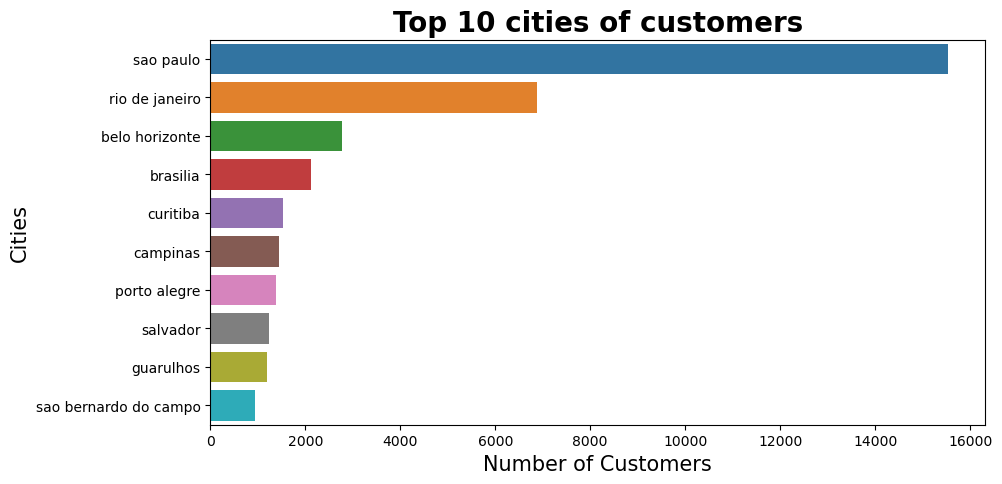

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(y = customers.customer_city.value_counts().index[:10], x = customers.customer_city.value_counts().values[:10])
plt.xlabel('Number of Customers',color='black',fontsize=15)
plt.ylabel('Cities',color='black',fontsize=15)
plt.title('Top 10 cities of customers',color='black',fontsize=20,fontweight='bold')
plt.show()

**observation:**
1. The `top city` to which our customers belong is `Sao Paulo`, which account to `15.62%` of customers. 
2. This is followed by `Rio De Janeiro`, which accounts to `6.92%` of customers.
3. The least city to which our customers belong to among the top 10 is from `Sao Bernardo Do Campo`, which accounts to just `0.94%`.

## Visualization of top 10 States 

In [12]:
customerState = customers.customer_state.value_counts(normalize=True)[:10] * 100
print('The top 10 cities from which customers come are: \n', customerState)

The top 10 cities from which customers come are: 
 SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
Name: customer_state, dtype: float64


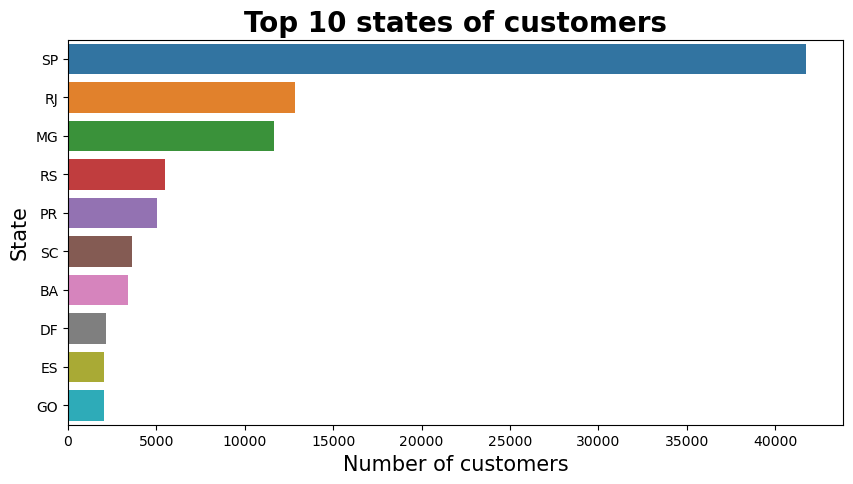

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(y = customers.customer_state.value_counts().index[:10], x = customers.customer_state.value_counts().values[:10])
plt.xlabel('Number of customers',color='black',fontsize=15)
plt.ylabel('State',color='black',fontsize=15)
plt.title('Top 10 states of customers',color='black',fontsize=20,fontweight='bold')
plt.show()

**observation:**
1. The `top state` to which our customers belong is `Sao Paulo`, from where `41.98%` of customers come from. 
2. This is followed by `Rio De Janeiro`, which accounts to `12.92%` of customers. 

## Visualization of Geolocation of Customers

There are some records in the geolocation data for which the geolocation latitude and longitude are pointing to locations in the sea, which will lead to inappropriate visualization of the geolocation, when aggregation is applied to the fields. So such records are alone dropped from the data. Those records include geolocation zipcodes 29654 and 35179, for which the latitude and longitude values for certain records are incorrectly given.  

In [14]:
incorrectLocation = geolocation[(geolocation.geolocation_lat > 10) & (geolocation.geolocation_lng < -18)]
incorrectLocation

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
538512                        29654        29.409252       -98.484121   
538557                        29654        21.657547      -101.466766   
585242                        35179        25.995203       -98.078544   
585260                        35179        25.995245       -98.078533   

              geolocation_city geolocation_state  
538512  santo antônio do canaã                ES  
538557  santo antonio do canaa                ES  
585242      santana do paraíso                MG  
585260      santana do paraiso                MG

In [15]:
geolocation.drop(index = [538512, 538557, 585242, 585260], inplace = True)

In [16]:
geolocationMean = geolocation.groupby('geolocation_zip_code_prefix', as_index = False).agg({'geolocation_lat'  : 'max',
                                                                                            'geolocation_lng'  : 'max'})
geolocationMean.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
0                         1001       -23.549292       -46.633559
1                         1002       -23.544641       -46.633180
2                         1003       -23.548901       -46.634862
3                         1004       -23.549181       -46.634057
4                         1005       -23.548758       -46.634768

In [17]:
customerDensity = customers.merge(geolocationMean, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', how = 'left')[['customer_unique_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
customerDensity.head()

customer_unique_id customer_zip_code_prefix  geolocation_lat  \
0  861eff4711a542e4b93843c6dd7febb0                    14409       -20.468849   
1  290c77bc529b7ac935b93aa66c333dc3                     9790       -23.659702   
2  060e732b5b29e8181a18229c7b0b2b5e                     1151       -23.527788   
3  259dac757896d24d7702b9acbbff3f3c                     8775       -23.493944   
4  345ecd01c38d18a9036ed96c73b8d066                    13056       -22.961980   

   geolocation_lng  
0       -47.382173  
1       -46.530264  
2       -46.652997  
3       -46.172406  
4       -47.125767

In [18]:
customerDensity.dropna(inplace = True)

**observations:**
1. The customer zip codes are mapped with the geolocation zip code's latitude and longidute, so as to visualise from which region our customers are more densly concentrated. 
2. There are some zip codes for which the latitude and longitude values are not available in the data, so we drop such records for visualization. 

In [19]:
# create a map centered on your coordinates
m = folium.Map(location = customerDensity[['geolocation_lat', 'geolocation_lng']].values.tolist()[0], zoom_start = 13)

# create a list of coordinates
coordinates = customerDensity[['geolocation_lat', 'geolocation_lng']].values.tolist()

# create a heatmap layer with the list of coordinates
heat_layer = HeatMap(coordinates)

# add the heatmap layer to the map
heat_layer.add_to(m)

# display the map
m

**observation:**
1. From the heatmap, we could see that most of our customers are `based in South America`, while `some are from the Europe`. 

<a id = 'orderItems'> </a>
# 2.Exploratory Data Analysis On OrderItems dataframe

In [20]:
orderItems.head(3)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93  
2  2018-01-18 14:48:30  199.0          17.87

In [21]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
orderItems['shipping_limit_date'] = pd.to_datetime(orderItems.shipping_limit_date)

In [23]:
orderItems.isna().sum() / len(orderItems) * 100

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [24]:
orderItems.describe(exclude = np.number)

order_id                        product_id  \
count                             112650                            112650   
unique                             98666                             32951   
top     8272b63d03f5f79c56e9e4120aec44ef  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                                  21                               527   
first                                NaN                               NaN   
last                                 NaN                               NaN   

                               seller_id  shipping_limit_date  
count                             112650               112650  
unique                              3095                93318  
top     6560211a19b47992c3666cc44a7e94c0  2017-07-21 18:25:23  
freq                                2033                   21  
first                                NaN  2016-09-19 00:15:34  
last                                 NaN  2020-04-09 22:35:08

In [25]:
orderItems.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

**observation:**
1. The order items dataframe consist of all the orders placed by the customers and the details of the products in that order. 
2. There are` 98666 unique orders` placed with our business and the order with most number of items is `8272b63d03f5f79c56e9e4120aec44ef`, which has `21 items` in a single order. 
3. `32951 unique products` were ordered from us during the taken time period and the most ordered product is `aca2eb7d00ea1a7b8ebd4e68314663af`, which was ordered `527 times`. During the further stages of analysis, the product will be analysed mapping the ID with the products dataframe. 
4. Similarly there are `3095 unique sellers` for our product and the seller who sells most of the product is `6560211a19b47992c3666cc44a7e94c0`. This data is also masked but we can combine this and find which state or city the sellers belong to and do further analysis. 
5. The `average price of the products` ordered is `120.65`. The price of the products ordered is highly right skewed, as the `costliest product` ordered is priced at `6735`. 
6. Similarly the `freight value of the order on an average` for each order is `19.99`, and the `expensive freight value` is `409.68`. The particular orders whose freight values are higher will be studied later in the course of analysis. 

In [26]:
orderItems.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

## Visualization of Top 10 orders

In [27]:
topOrders = orderItems.groupby('order_id', as_index = False).agg({'price'         : 'sum',
                                                                  'freight_value' : 'sum'})
topOrders['total_price'] = topOrders.price + topOrders.freight_value
top10Orders = topOrders.sort_values(by = 'total_price', ascending = False)[:10]
top10Orders

order_id    price  freight_value  total_price
1455   03caa2c082116e1d31e67e9ae3700499  13440.0         224.08     13664.08
44467  736e1922ae60d0d6a89247b851902527   7160.0         114.88      7274.88
3130   0812eb902a67711a1cb742b3cdaa65ae   6735.0         194.31      6929.31
98298  fefacc66af859508bf1a7934eab1e97f   6729.0         193.21      6922.21
94439  f5136e38d1a14a4dbd87dff67da82701   6499.0         227.66      6726.66
17114  2cc9089445046817a7539d90805e6e5a   5934.6         146.94      6081.54
65046  a96610ab360d42a2e5335a3998b4718a   4799.0         151.34      4950.34
69531  b4c4b76c642808cbe472a32b86cddc95   4599.9         209.54      4809.44
9868   199af31afc78c699f0dbf71fb178d4d4   4690.0          74.34      4764.34
54353  8dbc85d1447242f3b127dda390d56e19   4590.0          91.78      4681.78

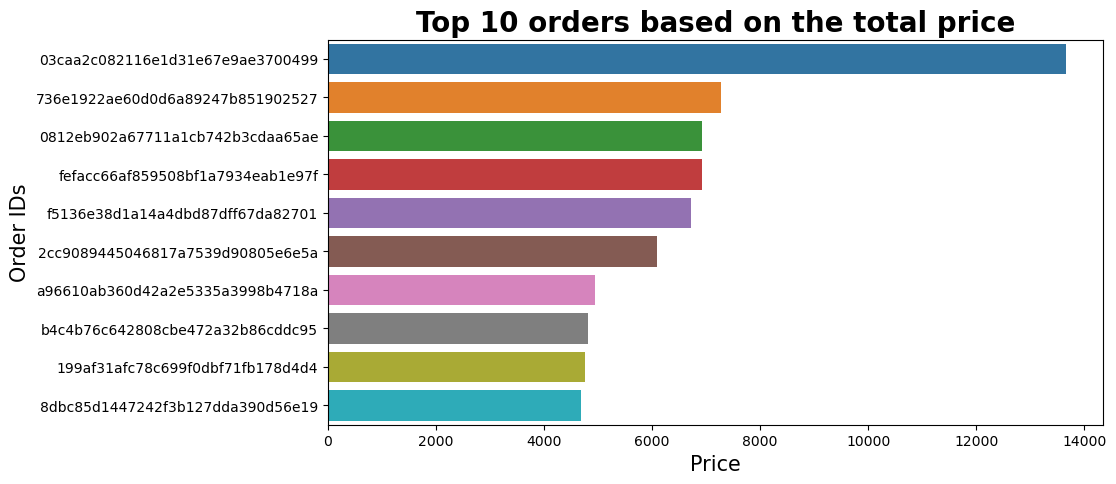

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(top10Orders.total_price, top10Orders.order_id)
plt.xlabel('Price',color='black',fontsize=15)
plt.ylabel('Order IDs',color='black',fontsize=15)
plt.title('Top 10 orders based on the total price',color='black',fontsize=20,fontweight='bold')
plt.show()

**Observations:**
1. The order ID, `03caa2c082116e1d31e67e9ae3700499` is the most costliest order with a `total value` of `13664.08`. 

## Visualization of top sellers of the orders placed by customers

In [29]:
orderItems.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [30]:
topSellers = orderItems.seller_id.value_counts()
topSellers.head()

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: seller_id, dtype: int64

In [31]:
topSellers = pd.DataFrame({'seller_id'     : topSellers.index,
                           'instances'     : topSellers.values})
topSellers.head()

seller_id  instances
0  6560211a19b47992c3666cc44a7e94c0       2033
1  4a3ca9315b744ce9f8e9374361493884       1987
2  1f50f920176fa81dab994f9023523100       1931
3  cc419e0650a3c5ba77189a1882b7556a       1775
4  da8622b14eb17ae2831f4ac5b9dab84a       1551

In [32]:
topSellersOfOrders = topSellers.merge(sellers, on = 'seller_id').merge(geolocationMean, left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix').drop(columns = ['geolocation_zip_code_prefix'], axis = 1).sort_values('instances', ascending = False)
topSellersOfOrders

seller_id  instances  seller_zip_code_prefix  \
0     6560211a19b47992c3666cc44a7e94c0       2033                    5849   
2     4a3ca9315b744ce9f8e9374361493884       1987                   14940   
51    1f50f920176fa81dab994f9023523100       1931                   15025   
55    cc419e0650a3c5ba77189a1882b7556a       1775                    9015   
58    da8622b14eb17ae2831f4ac5b9dab84a       1551                   13405   
...                                ...        ...                     ...   
47    0f519b0d2e5eb2227c93dd25038bfc01          1                   14940   
48    f7c31656c19db6275a8acadca289f426          1                   14940   
49    422be4cc81a457fdb46f47edeb968ae5          1                   14940   
2524  57a834594e1e9e9219603bfec184eadc          1                   98780   
3087  13d95f0f6f73943d4ceffad0fc2cd32c          1                   74473   

                seller_city seller_state  geolocation_lat  geolocation_lng  
0                 sao paulo           SP       -23.649432       -46.753466  
2                  ibitinga           SP       -21.734663       -48.809349  
51    sao jose do rio preto           SP       -20.793902       -49.376768  
55              santo andre           SP       -23.653394       -46.513267  
58               piracicaba           SP       -22.692313       -47.653256  
...                     ...          ...              ...              ...  
47                 ibitinga           SP       -21.734663       -48.809349  
48                 ibitinga           SP       -21.734663       -48.809349  
49                 ibitinga           SP       -21.734663       -48.809349  
2524             santa rosa           RS        -7.232281       -35.904965  
3087                goiania           GO       -16.607116       -49.313425  

[3088 rows x 7 columns]

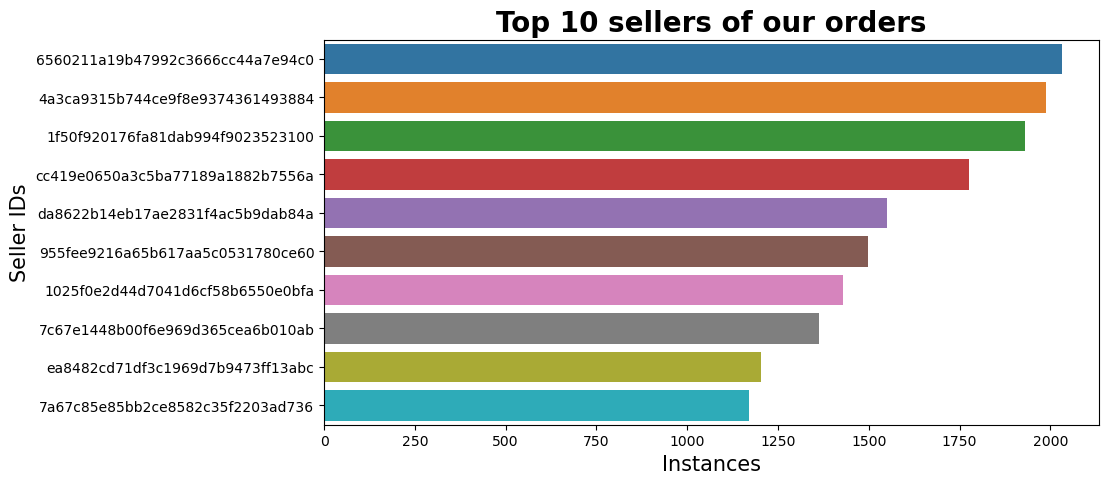

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x = topSellers.instances[:10], y = topSellers.seller_id[:10])
plt.xlabel('Instances',color='black',fontsize=15)
plt.ylabel('Seller IDs',color='black',fontsize=15)
plt.title('Top 10 sellers of our orders',color='black',fontsize=20,fontweight='bold')
plt.show()

**Observations:**
1. Since the seller IDs are masked, we could not make out from what the seller ID means. 
2. So we use the location and city of the sellers to draw inferences. 

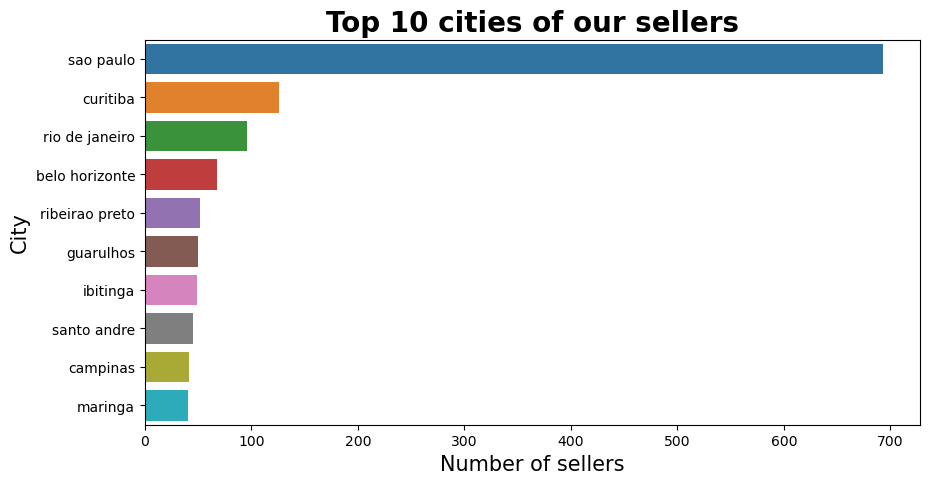

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(y = topSellersOfOrders.seller_city.value_counts().index[:10], x = topSellersOfOrders.seller_city.value_counts().values[:10])
plt.xlabel('Number of sellers',color='black',fontsize=15)
plt.ylabel('City',color='black',fontsize=15)
plt.title('Top 10 cities of our sellers',color='black',fontsize=20,fontweight='bold')
plt.show()

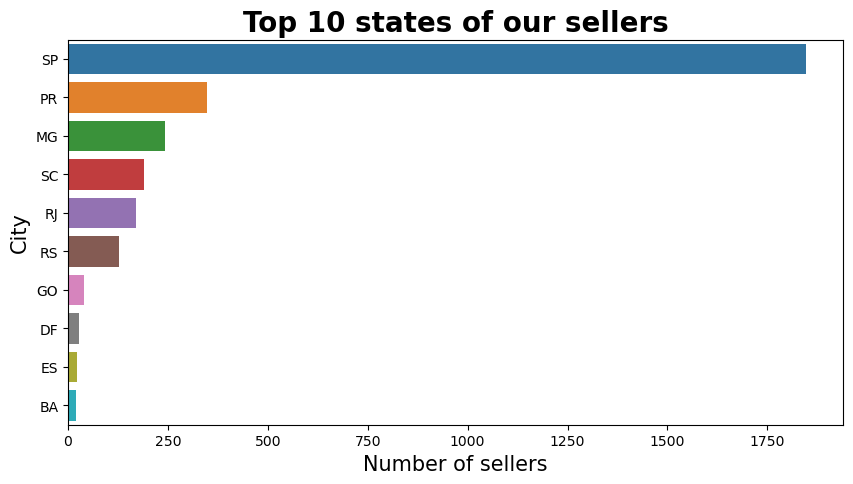

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(y = topSellersOfOrders.seller_state.value_counts().index[:10], x = topSellersOfOrders.seller_state.value_counts().values[:10])
plt.xlabel('Number of sellers',color='black',fontsize=15)
plt.ylabel('City',color='black',fontsize=15)
plt.title('Top 10 states of our sellers',color='black',fontsize=20,fontweight='bold')
plt.show()

**Observations:**
1. The sellers of our orders are mostly from the city of `Sao Paulo`, followed by `Curitiba` and `Rio De Janeiro`. 
2. The sellers of our orders are mostly from the state of `Sao Paulo`. 
3. This is obvious as most of our customers are from the same state and city of Sao Paulo. 

In [36]:
# create a map centered on your coordinates
m = folium.Map(location = topSellersOfOrders[['geolocation_lat', 'geolocation_lng']].values.tolist()[0], zoom_start = 13)

# create a list of coordinates
coordinates = topSellersOfOrders[['geolocation_lat', 'geolocation_lng']].values.tolist()

# create a heatmap layer with the list of coordinates
heat_layer = HeatMap(coordinates)

# add the heatmap layer to the map
heat_layer.add_to(m)

# display the map
m

**Observations:**
1. From the heatmap of the sellers based on their latitudes and longitudes, we could infer the `concentration of our sellers is only in South America`. They carter to all of our customers spread in Europe and South America.  

## Visualization of top products ordered by customers

In [37]:
top10Products = orderItems.product_id.value_counts()[:10]
print('Top 10 Products:',top10Products,sep='\n')

Top 10 Products:
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: product_id, dtype: int64


In [38]:
topProducts = {'product_id': top10Products.index, 'count': top10Products.values}
topProducts = pd.DataFrame(topProducts).merge(products, on = 'product_id').merge(productCategoryTranslation, on = 'product_category_name')
topProducts = topProducts[['product_id', 'product_category_name_english', 'count']]
topProducts = topProducts.sort_values(by = 'count', ascending = False)
topProducts

product_id product_category_name_english  count
0  aca2eb7d00ea1a7b8ebd4e68314663af               furniture_decor    527
1  99a4788cb24856965c36a24e339b6058                bed_bath_table    488
2  422879e10f46682990de24d770e7f83d                  garden_tools    484
3  389d119b48cf3043d311335e499d9c6b                  garden_tools    392
4  368c6c730842d78016ad823897a372db                  garden_tools    388
5  53759a2ecddad2bb87a079a1f1519f73                  garden_tools    373
6  d1c427060a0f73f6b889a5c7c61f2ac4         computers_accessories    343
8  53b36df67ebb7c41585e8d54d6772e08                 watches_gifts    323
9  154e7e31ebfa092203795c972e5804a6                 health_beauty    281
7  3dd2a17168ec895c781a9191c1e95ad7         computers_accessories    274

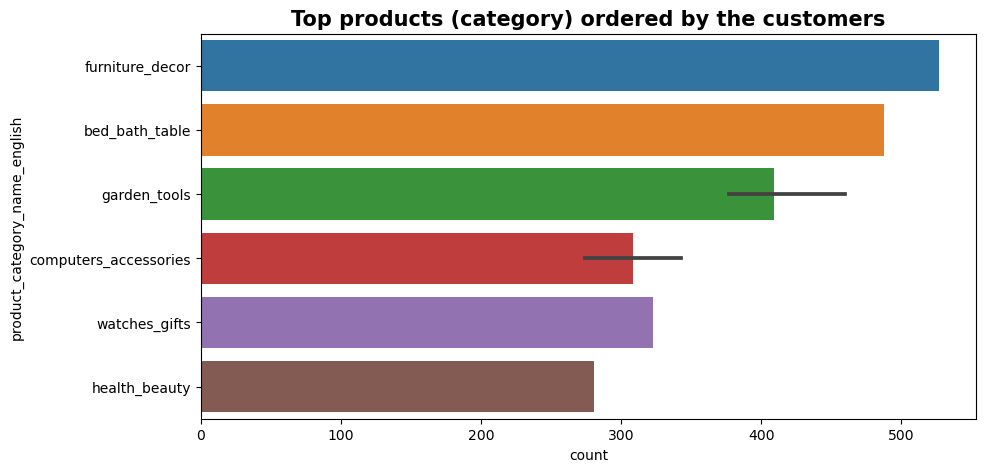

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(y = topProducts.product_category_name_english, x = topProducts['count'])
plt.title('Top products (category) ordered by the customers',fontweight='bold',fontsize=15)
plt.show()

**observation:**
1. Since the product ID is masked, we merge the ID with the products dataframe to see the category name of the product and find which product category is mostly ordered by our customers. 
2. From the barplot we could infer that our customers mostly ordered `furniture decor`, with a whopping `527 orders`. 
3. This is followed by the `bed bath table` and then followed by different `garden tools`. 
4. What we could read from the purchase history of our customers is that our customers rely on us to buy furniture and tools compared to all other items in our stores. 

## Visualization of price of the orders

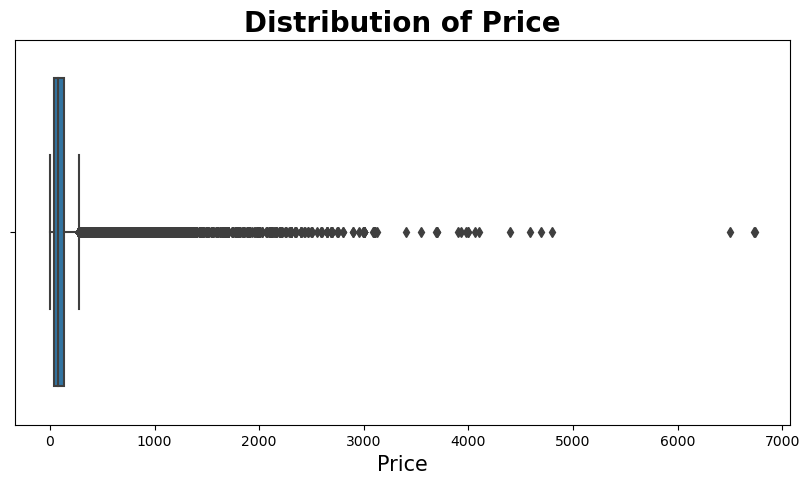

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', data=orderItems)
plt.xlabel('Price',color='black',fontsize=15)
plt.title('Distribution of Price',color='black',fontsize=20,fontweight='bold')
plt.show()

**observation:**
1. From the boxplot we could infer that the `price of the products` ordered is highly `right skewed`.
2. So as to view the spread of the price more clearly we will ignore the outliers and then find the distribution. 

In [41]:
Q1 = np.quantile(orderItems.price, 0.25)
Q3 = np.quantile(orderItems.price, 0.75)
IQR = Q3 - Q1
priceDistribution = orderItems[~((orderItems.price < Q1 - 1.5 * IQR) | (orderItems.price > Q3 + 1.5 * IQR))]
priceDistribution.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

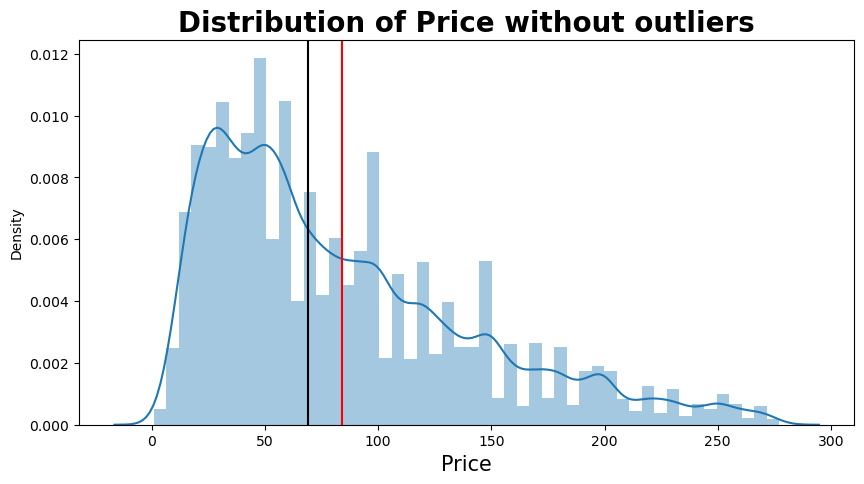

In [42]:
plt.figure(figsize=(10, 5))
sns.distplot(priceDistribution.price)
plt.axvline(priceDistribution.price.mean(), c = 'red')
plt.axvline(priceDistribution.price.median(), c = 'black')
plt.xlabel('Price',color='black',fontsize=15)
plt.title('Distribution of Price without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [43]:
priceDistribution.price.describe()

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

**Observations:**
1. The price of the products within the interquartile range are spread mostly between 0 and 100, which could be seen in the distribution plot. 
2. The `average price of the products` is `83.97`. 

## Visualization of freight value of the orders

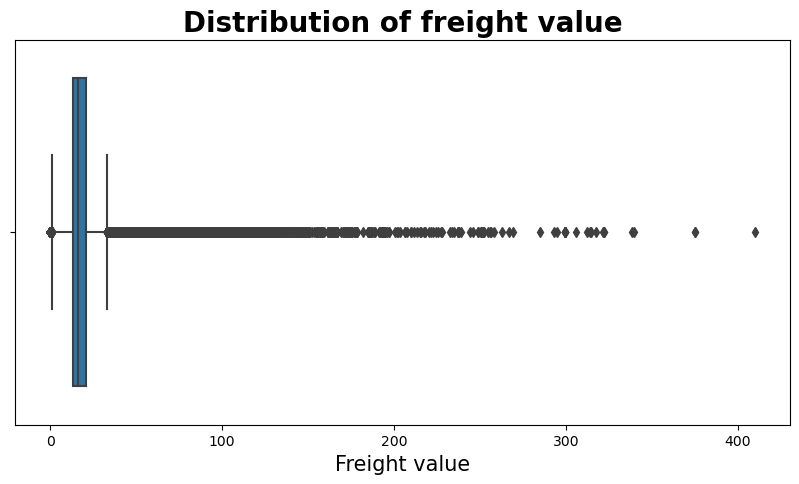

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='freight_value', data=orderItems)
plt.xlabel('Freight value',color='black',fontsize=15)
plt.title('Distribution of freight value',color='black',fontsize=20,fontweight='bold')
plt.show()

**observation:**
1. From the boxplot we could infer that the `freight value of the products` ordered is highly `right skewed`.
2. So as to view the spread of the freight value more clearly we will ignore the outliers and then find the distribution. 

In [45]:
Q1 = np.quantile(orderItems.freight_value, 0.25)
Q3 = np.quantile(orderItems.freight_value, 0.75)
IQR = Q3 - Q1
freightValueDistribution = orderItems[~((orderItems.freight_value < Q1 - 1.5 * IQR) | (orderItems.freight_value > Q3 + 1.5 * IQR))]
freightValueDistribution.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

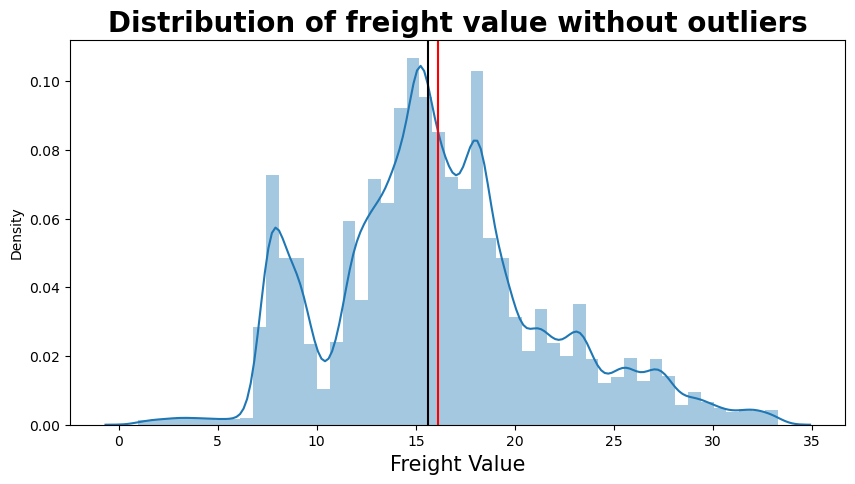

In [46]:
plt.figure(figsize=(10, 5))
sns.distplot(freightValueDistribution.freight_value)
plt.axvline(freightValueDistribution.freight_value.mean(), c = 'red')
plt.axvline(freightValueDistribution.freight_value.median(), c = 'black')
plt.xlabel('Freight Value',color='black',fontsize=15)
plt.title('Distribution of freight value without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [47]:
freightValueDistribution.freight_value.describe()

count    100516.000000
mean         16.125685
std           5.468564
min           0.980000
25%          12.760000
50%          15.620000
75%          18.800000
max          33.250000
Name: freight_value, dtype: float64

**Observations:**
1. The freight values of the products within the interquartile range are spread mostly between 5 and 25, which could be seen in the distribution plot. We could infer that such orders were within the continent of South America.
2. The `average freight value` of the products is `16.12`. 

## Relationship between Price and Freight value

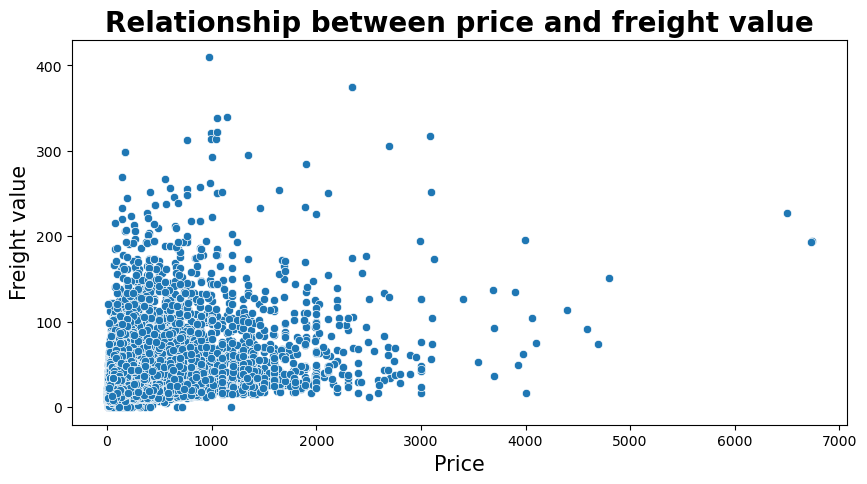

In [48]:
plt.figure(figsize=(10, 5))
sns.scatterplot(orderItems.price, orderItems.freight_value)
plt.xlabel('Price',color='black',fontsize=15)
plt.ylabel('Freight value',color='black',fontsize=15)
plt.title('Relationship between price and freight value',color='black',fontsize=20,fontweight='bold')
plt.show()

**Observations:**
1. From the scatterplot between price of the products ordered and its respective freight value, we could clearly see that there is `no relationship between the price and its freight value`. The data is scattered. 

<a id="payments"></a>
# 3. Exploratory Data Analysis on Payments DataFrame

In [49]:
payments.head(3)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71

In [50]:
print('Number of Records:',payments.shape[0])
print('Number of Columns:',payments.shape[1])

Number of Records: 103886
Number of Columns: 5


In [51]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [52]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [53]:
payments.describe(include = np.number)

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [54]:
payments.describe(exclude = np.number)

order_id payment_type
count                             103886       103886
unique                             99440            5
top     fa65dad1b0e818e3ccc5cb0e39231352  credit_card
freq                                  29        76795

**observation:**
1. There is no presence of Null values in the payments dataframe.
2. For `99440 unique orders`, most of the payements were made through `credit cards`. 
3. The `average number of payment installments` were `1`, since it is highly right skewed, the mean is not considered. `24` was the `maximum number of payment installments` for an order. 
4. The payment value of the orders is also highly right skewed. The `average payment value` is `154.1`.

## Visulaization Of Different Payment types

In [55]:
payments.payment_type.value_counts(normalize = True) * 100

credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: payment_type, dtype: float64

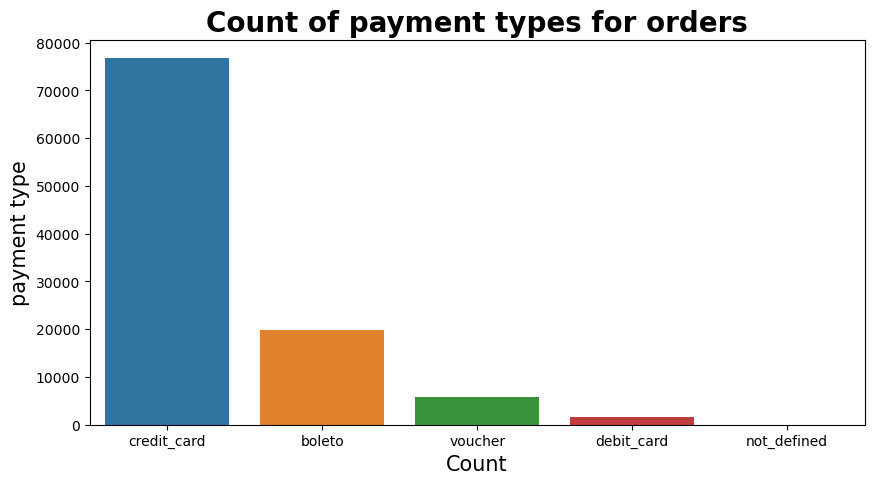

In [56]:
plt.figure(figsize=(10, 5))
sns.countplot(payments.payment_type)
plt.xlabel('Count',color='black',fontsize=15)
plt.ylabel('payment type',color='black',fontsize=15)
plt.title('Count of payment types for orders',color='black',fontsize=20,fontweight='bold')
plt.show()

**observation:**
1. From the count plot, we cound clearly see that `credit card` accounts for `73.9%` of payments, which is the most preferred payment type, followed by boleto, voucher and debit card.
2. As we can see, most customers prefer credit card, followed by boleto, voucher and then debit card. We can also see the presence of a 'not_defined' value which is analogous to missing values. 
4. There is `imbalance` present in the data as most of the payment types are of credit cards. 

## Visulaization of Number of Payment Installments

In [57]:
payments.payment_installments.value_counts(normalize = True)[:10] * 100 

1     50.580444
2     11.948675
3     10.069692
4      6.832489
10     5.128699
5      5.043028
8      4.108350
6      3.773367
7      1.565177
9      0.619910
Name: payment_installments, dtype: float64

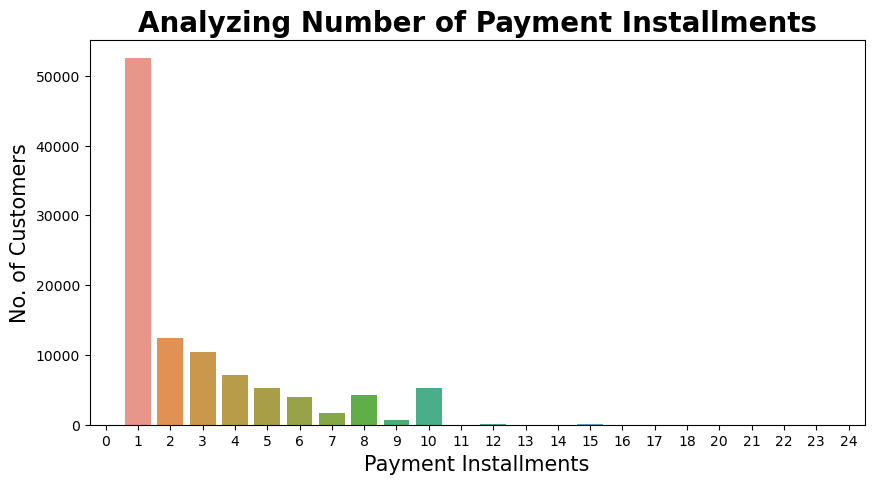

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_installments',data=payments)
plt.title('Analyzing Number of Payment Installments',fontweight='bold',fontsize=20)
plt.xlabel('Payment Installments',fontsize=15,color='black')
plt.ylabel('No. of Customers',fontsize=15,color='black')
plt.show()

**observation**
1. Most customers prefered to pay for the order in a `single installment`. However, customers also opted for more than one installment, the number is not insignificant.
2. For further analysis, we could convert the installments to an object datatype as we could not consider it as a numeric column.

## Visualization of the payment value of the orders

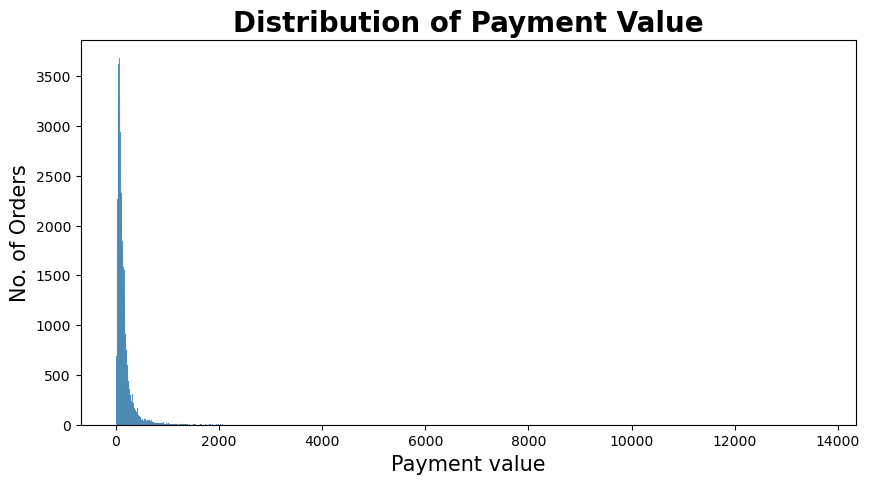

In [59]:
plt.figure(figsize=(10, 5))
sns.histplot(x='payment_value', data=payments)
plt.title('Distribution of Payment Value',fontweight='bold',fontsize=20)
plt.xlabel('Payment value',fontsize=15)
plt.ylabel('No. of Orders',fontsize=15)
plt.show()

In [60]:
Q1 = np.quantile(payments.payment_value, 0.25)
Q3 = np.quantile(payments.payment_value, 0.75)
IQR = Q3 - Q1
paymentValueDistribution = payments[~((payments.payment_value < Q1 - 1.5 * IQR) | (payments.payment_value > Q3 + 1.5 * IQR))]
paymentValueDistribution.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

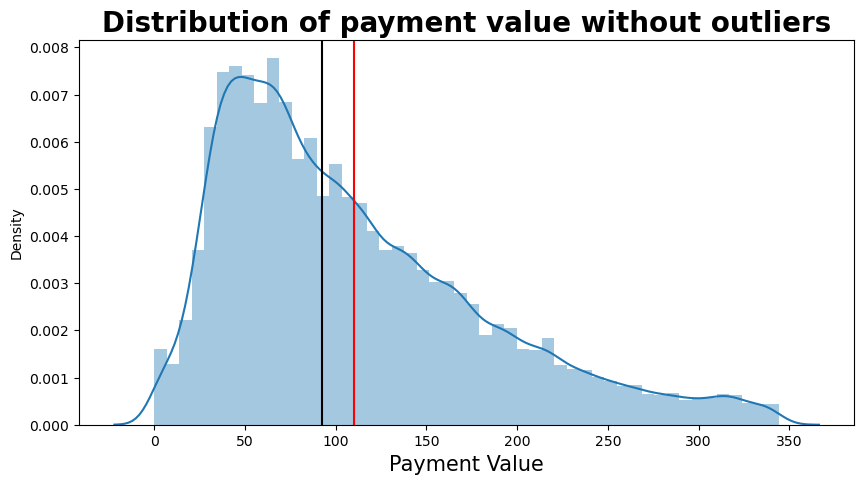

In [61]:
plt.figure(figsize=(10, 5))
sns.distplot(paymentValueDistribution.payment_value)
plt.axvline(paymentValueDistribution.payment_value.mean(), c = 'red')
plt.axvline(paymentValueDistribution.payment_value.median(), c = 'black')
plt.xlabel('Payment Value',color='black',fontsize=15)
plt.title('Distribution of payment value without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [62]:
paymentValueDistribution.payment_value.describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

**Observations:**
1. The payment values of the orders within the interquartile range are spread mostly `between 0 and 200`, which could be seen in the distribution plot.
2. The `average payment value` for the orders is `110.06`. 

<a id="reviews"></a>
# 4. Exploratory DataAnalysis On Order reviews dataframe

In [63]:
orderReviews.head(3)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   
1             5                  NaN                    NaN   
2             5                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59  
1  2018-03-10 00:00:00     2018-03-11 03:05:13  
2  2018-02-17 00:00:00     2018-02-18 14:36:24

In [64]:
print('Number of records:',orderReviews.shape[0])
print('number of columns:',orderReviews.shape[1])

Number of records: 99224
number of columns: 7


In [65]:
orderReviews['review_answer_timestamp'] = pd.to_datetime(orderReviews.review_answer_timestamp)
orderReviews['review_creation_date'] = pd.to_datetime(orderReviews.review_creation_date)

In [66]:
orderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [67]:
orderReviews.isna().sum()[orderReviews.isna().sum() > 0] / len(orderReviews) * 100

review_comment_title      88.341530
review_comment_message    58.702532
dtype: float64

**Observations:**
1. There are `88.34%` of `review comment title` and `58.7%` of `review comment message` as null values.
2. Since NLP is not part of the project we will not delve much into the reviews of the orders. 

In [68]:
orderReviews.dropna(inplace = True)

In [69]:
reviewScore = orderReviews.review_score.value_counts(normalize = True) * 100
reviewScore

5    55.107226
1    18.182742
4    14.564488
3     7.490599
2     4.654945
Name: review_score, dtype: float64

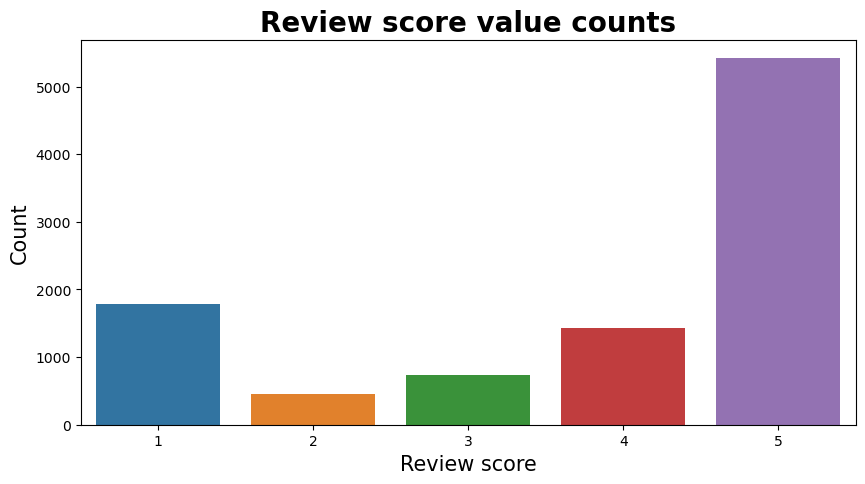

In [70]:
plt.figure(figsize=(10, 5))
sns.countplot(orderReviews.review_score)
plt.title('Review score value counts',fontweight='bold',fontsize=20)
plt.xlabel('Review score',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')
plt.show()

**observation:**
1. From the count plot of review score, we could clearly see that for about `57.77%` of orders, the review score is `5`, which is the maximum review score. 
2. From this we could clearly see that customers were mostly satisfied by the products and our busines. 

## Top comments by the customers

In [71]:
topComments = orderReviews.review_comment_title.value_counts()[:10]
print('The top 20 comments by the customer are:',topComments,sep='\n')

The top 20 comments by the customer are:
Recomendo          354
recomendo          270
Bom                228
super recomendo    213
Excelente          203
Ótimo              193
Muito bom          192
Super recomendo    184
Ótimo              149
Otimo              133
Name: review_comment_title, dtype: int64


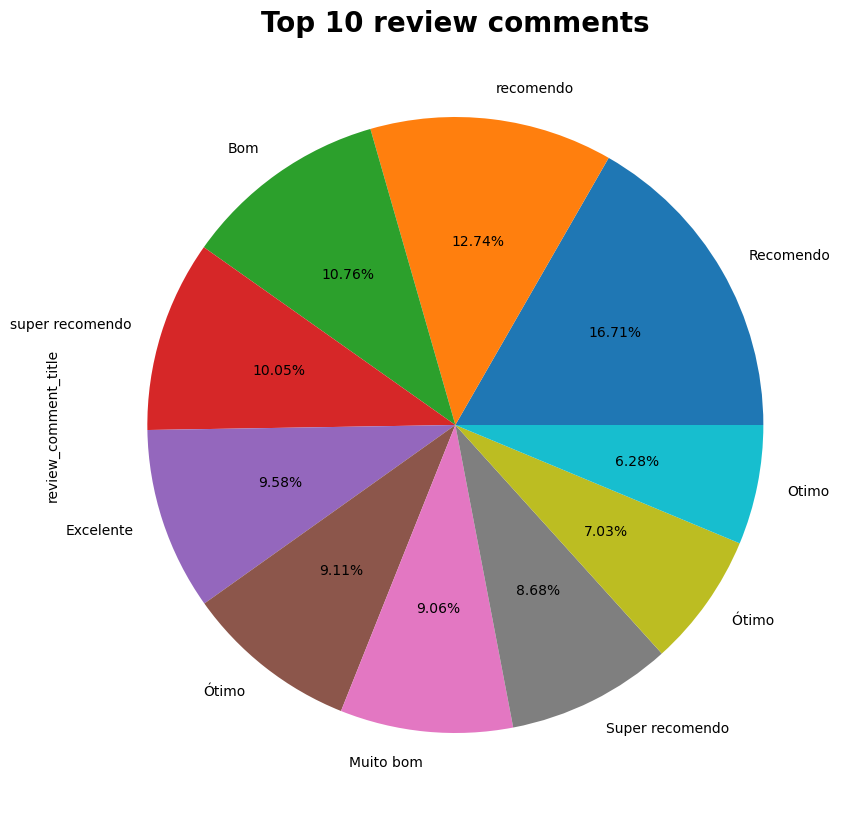

In [72]:
topComments.plot(kind="pie",autopct="%2.2f%%",figsize=(10, 10))
plt.title('Top 10 review comments',fontweight='bold',fontsize=20)
plt.show()

**observation:**
1. Most people have not given a review comment for the product they ordered, so those values are dropped. 
2. The most occuring comment is `'Recomendo'`, `'Bom'`, `'super recomendo'` and `'excelente'`.
3. `Recommedo` is about `11.93%`.

In [73]:
def partition(x):
    if x < 3:
        return 0
    return 1

orderReviewsAnalysis = orderReviews.copy()
orderReviewsAnalysis['review_score']=orderReviewsAnalysis['review_score'].map(lambda cw : partition(cw) ) 
    
# checking the review score now
orderReviewsAnalysis.review_score.value_counts()

1    7592
0    2247
Name: review_score, dtype: int64

Total Positive Reviews : 7592 , ( 77.16231324321578 %)
Total Negative Reviews : 2247 , ( 22.837686756784226 %)




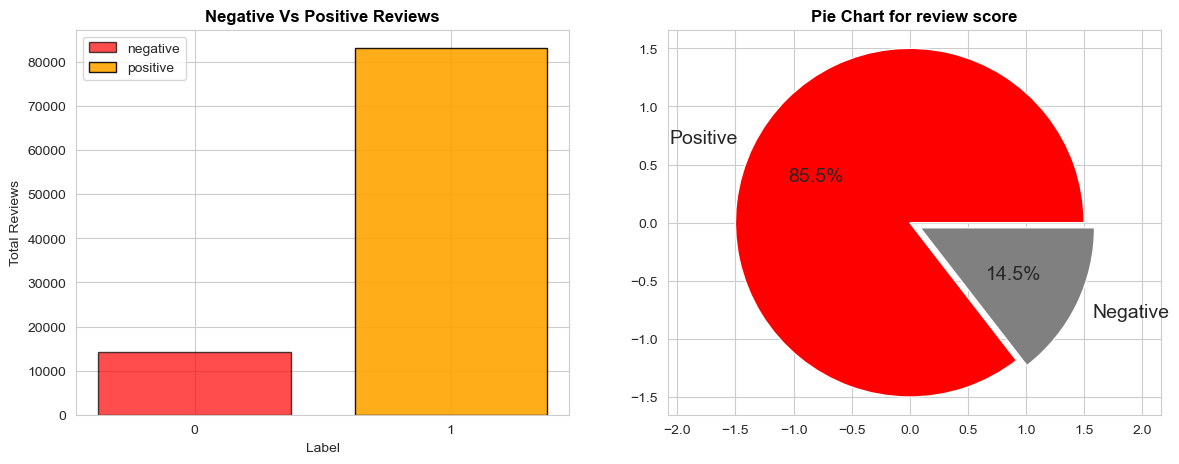

In [74]:
#counting the review score with 1 and 0
y_value_counts = orderReviewsAnalysis.review_score.value_counts()

#calculating the percentage of each review type
print("Total Positive Reviews :", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total Negative Reviews :", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print('\n')

#plotting bar-plot and pie chart
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total Reviews')
plt.xlabel('Label')
plt.title('Negative Vs Positive Reviews',color='black',fontweight='bold')
plt.xticks([10,10.20],['0','1'])
#creating bar plots
plt.bar(10,14112, color = 'red', width = 0.15,alpha=0.7,label='negative',edgecolor='black')
plt.bar(10.20,83143,color = 'orange', width = 0.15,alpha=0.9,label='positive',edgecolor='black')
plt.legend()

plt.subplot(1,2,2)
labels = ['Positive','Negative']
sizes = [83143,14112]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
color={'Red','grey'}
plt.pie(sizes,explode=explode ,colors=color,labels=labels, autopct='%1.1f%%',shadow=False, startangle=0,radius=1.5,labeldistance=1.1,textprops={'fontsize': 14},frame=True, )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for review score',color='black',fontweight='bold')
plt.show()

**observation:**
1. Review scores below 3 are considered as negative reviews and above 3 are said to be positive. 
2. We can observe from the above plots `85.5%` of the total reviews are `positive` and only `14.5%` reviews are `negative`. 

<a id="orders"></a>
# 5. Exploratory Data Analysis On Orders dataframe

In [75]:
orders.head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00

In [76]:
print('Number of Records:',orders.shape[0])
print('Number of Columns:',orders.shape[1])

Number of Records: 99441
Number of Columns: 8


In [77]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

In [78]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Treating missing values in orders dataframe

In [79]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [80]:
orders.order_id.nunique()

99441

In [81]:
orders.dropna()['order_status'].value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [82]:
orders[orders.isna().any(axis = 1)]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

**Observations:**
1. Since our only target is to find customers who are still within our business, we can consider `only those customers whose orders were delivered to them`. 
2. For the records whose delivery date is missing, we could consider that those customer's orders were not delivered or under various stages of the process, for instance, shipped, cancelled, unavailable and so on. 
3. So we consider dropping such records where the datetime is missing. 

In [83]:
orders.dropna(inplace = True)

In [84]:
orders['purchased_approved'] = (orders.order_approved_at -orders.order_purchase_timestamp).dt.seconds
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                  6                    7                    8  
1                 12                    5                   13  
2                  9                   17                    9  
3                  9                   12                   13  
4                  1                    9                    2

**Observations:**
1. New columns are created using the available datetime columns for easy analysis of the available data.
2. `Purchased_approved` represents the seconds taken for an order to get approved after the customer purchases it.
3. `approved_carrier` represents the days taken for the order to go to the delivery carrier after it being approved.
4. `carrier_delivered` represents the days taken for the order to be delivered to the customer from the date it reaches the delivery carrier.
5. `delivered_estimated` represents the date difference between the estimated delivery date and the actual delivery date. 
6. `purchased_delivered` represents the days taken for the order to be delivered to the customer from the date the customer made the purchase. 

In [85]:
orders.groupby('customer_id')['order_id'].count().sort_values(ascending=False)
#All customers collected in this data have ordered only once
del_diff = orders['purchased_delivered'] - orders['carrier_delivered']
avg_diff = del_diff.mean()
print('Average difference (in terms of days) for the delivery date and carrier delivered date is:',avg_diff)

Average difference (in terms of days) for the delivery date and carrier delivered date is: 3.215185411720799


In [86]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
purchased_approved               0
approved_carrier                 0
carrier_delivered                0
delivered_estimated              0
purchased_delivered              0
dtype: int64

In [87]:
purchasedel_null_indexes = orders['purchased_delivered'][np.isnan(orders['purchased_delivered']) == True].index
purchasedel_null_indexes

Int64Index([], dtype='int64')

In [88]:
carrier_null_indexes = orders['carrier_delivered'][np.isnan(orders['carrier_delivered']) == True].index
carrier_null_indexes

Int64Index([], dtype='int64')

- All the values are missing both carrier and purchased date, so we will drop them all

In [89]:
orders = orders.drop(carrier_null_indexes,axis=0)

In [90]:
orders.describe(include = np.number)

purchased_approved  approved_carrier  carrier_delivered  \
count        96461.000000      96461.000000       96461.000000   
mean         14160.414706          2.295923           8.878396   
std          23629.976622          3.548444           8.746673   
min              0.000000       -172.000000         -17.000000   
25%            756.000000          0.000000           4.000000   
50%           1169.000000          1.000000           7.000000   
75%          16980.000000          3.000000          12.000000   
max          86399.000000        125.000000         205.000000   

       delivered_estimated  purchased_delivered  
count         96461.000000         96461.000000  
mean             10.875577            12.093582  
std              10.183476             9.551576  
min            -189.000000             0.000000  
25%               6.000000             6.000000  
50%              11.000000            10.000000  
75%              16.000000            15.000000  
max             146.000000           209.000000

**Observations:**
1. From the summary statistics, we could infer that the it took an `average of 14160 seconds` or `3.93 hours` for the order to get `approved` after the customer purchased it. 
2. It took on an average of `12 days` for the order to get `delivered to the customer from the date of purchase`. 
3. The other columns show a minimum value in negative, which means the data present in the dataset is wrong. So those columns need to be dropped. 
4. After treating the null values, we have two order statuses, one `Delivered` and other `cancelled`. Cancelled constitute only a minimal number of records. 
5. The first order was `placed` on `15/09/2016` and the last order was placed on `29/08/2018`
6. The first `delivered` order was on `11/10/2016` and the last delivery date of all the orders is `17/10/2018`

In [91]:
orders.describe(exclude = np.number)

order_id                       customer_id  \
count                              96461                             96461   
unique                             96461                             96461   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
first                                NaN                               NaN   
last                                 NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count         96461                    96461                96461   
unique            2                    95939                88272   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96455                        3                    9   
first           NaN      2016-09-15 12:16:38  2016-09-15 12:16:38   
last            NaN      2018-08-29 15:00:37  2018-08-29 15:10:26   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         96461                         96461   
unique                        80100                         95649   
top             2018-05-09 15:48:00           2018-05-14 20:02:44   
freq                             47                             3   
first           2016-10-08 10:34:01           2016-10-11 13:46:32   
last            2018-09-11 19:48:28           2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          96461  
unique                           445  
top              2017-12-20 00:00:00  
freq                             507  
first            2016-10-04 00:00:00  
last             2018-10-25 00:00:00

In [92]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                  6                    7                    8  
1                 12                    5                   13  
2                  9                   17                    9  
3                  9                   12                   13  
4                  1                    9                    2

## Distribution of purchased approved

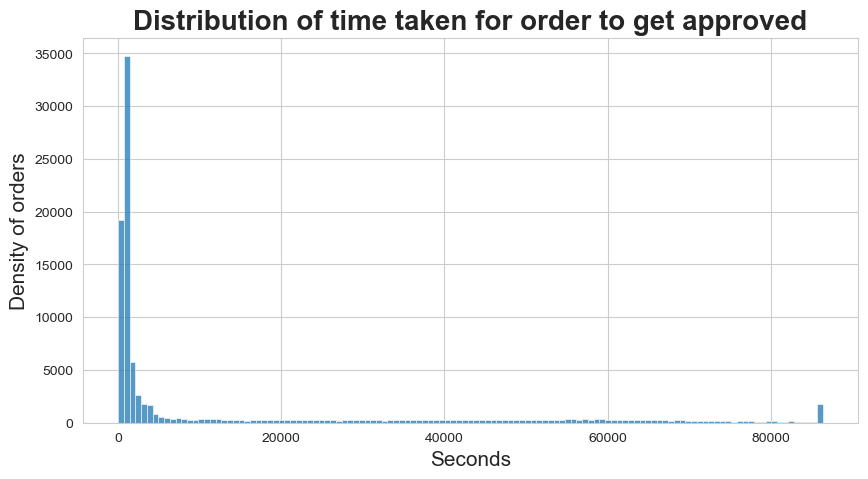

In [93]:
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_approved', data=orders)
plt.title('Distribution of time taken for order to get approved',fontweight='bold',fontsize=20)
plt.xlabel('Seconds',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.show()

In [94]:
Q1 = np.quantile(orders.purchased_approved, 0.25)
Q3 = np.quantile(orders.purchased_approved, 0.75)
IQR = Q3 - Q1
purchasedApprovedDist = orders[~((orders.purchased_approved < Q1 - 1.5 * IQR) | (orders.purchased_approved > Q3 + 1.5 * IQR))]
purchasedApprovedDist.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                  6                    7                    8  
1                 12                    5                   13  
2                  9                   17                    9  
3                  9                   12                   13  
4                  1                    9                    2

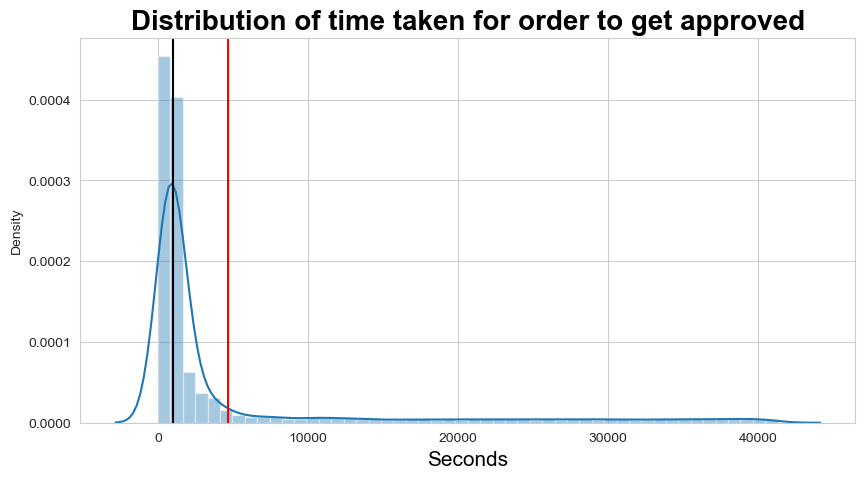

In [95]:
plt.figure(figsize=(10, 5))
sns.distplot(purchasedApprovedDist.purchased_approved)
plt.axvline(purchasedApprovedDist.purchased_approved.mean(), c = 'red')
plt.axvline(purchasedApprovedDist.purchased_approved.median(), c = 'black')
plt.xlabel('Seconds',color='black',fontsize=15)
plt.title('Distribution of time taken for order to get approved',color='black',fontsize=20,fontweight='bold')
plt.show()

In [96]:
purchasedApprovedDist.purchased_approved.describe()

count    80620.000000
mean      4655.633180
std       9038.679512
min          0.000000
25%        712.000000
50%        974.000000
75%       2268.000000
max      41316.000000
Name: purchased_approved, dtype: float64

**Observations:**
1. The approval time of orders within the interquartile range are spread mostly `between 0 and 5000 seconds`, which could be seen in the distribution plot.
2. The `average time taken for order approval` for the orders is `4655.63`. 

## Distribution of delivered purchased

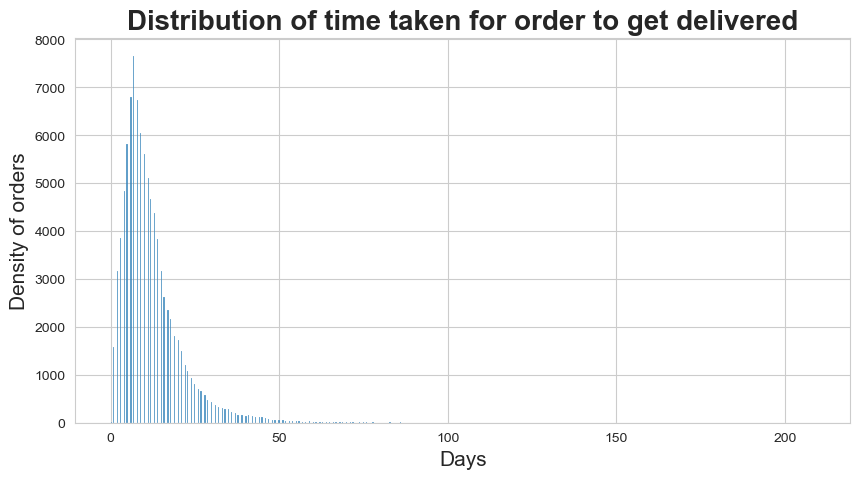

In [97]:
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_delivered', data=orders)
plt.title('Distribution of time taken for order to get delivered',fontweight='bold',fontsize=20)
plt.xlabel('Days',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.show()

In [98]:
Q1 = np.quantile(orders.purchased_delivered, 0.25)
Q3 = np.quantile(orders.purchased_delivered, 0.75)
IQR = Q3 - Q1
purchasedDeliveredDist = orders[~((orders.purchased_delivered < Q1 - 1.5 * IQR) | (orders.purchased_delivered > Q3 + 1.5 * IQR))]
purchasedDeliveredDist.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                  6                    7                    8  
1                 12                    5                   13  
2                  9                   17                    9  
3                  9                   12                   13  
4                  1                    9                    2

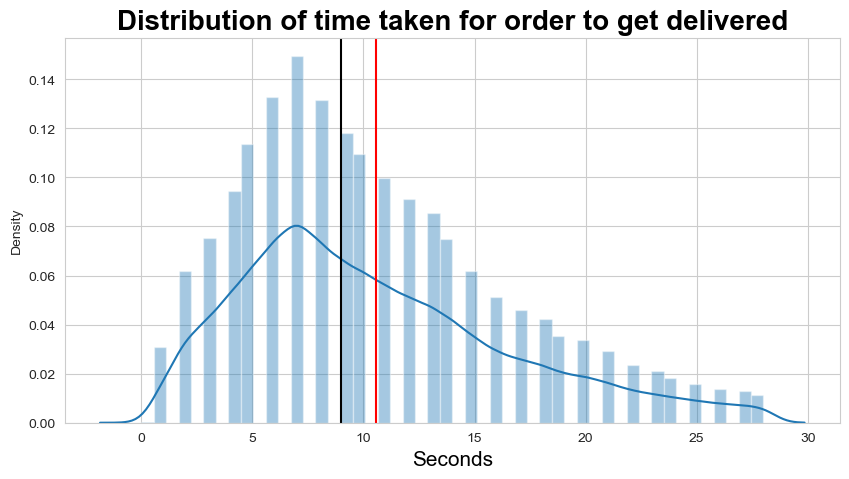

In [99]:
plt.figure(figsize=(10, 5))
sns.distplot(purchasedDeliveredDist.purchased_delivered)
plt.axvline(purchasedDeliveredDist.purchased_delivered.mean(), c = 'red')
plt.axvline(purchasedDeliveredDist.purchased_delivered.median(), c = 'black')
plt.xlabel('Seconds',color='black',fontsize=15)
plt.title('Distribution of time taken for order to get delivered',color='black',fontsize=20,fontweight='bold')
plt.show()

In [100]:
purchasedDeliveredDist.purchased_delivered.describe()

count    91437.000000
mean        10.558056
std          6.060675
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         28.000000
Name: purchased_delivered, dtype: float64

**Observations:**
1. The delivery time of orders within the interquartile range are spread mostly `between 0 and 20 days`, which could be seen in the distribution plot.
2. The `average time taken for order delivery` for the orders is `11`. 

## Yearwise order history

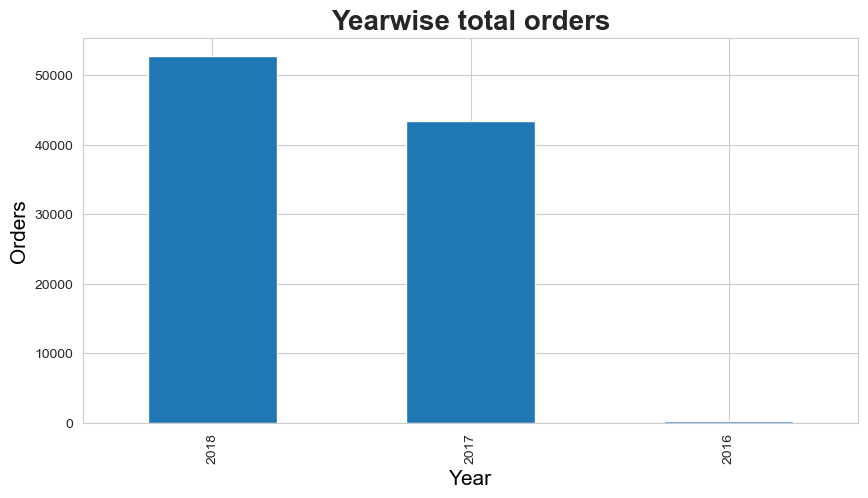

In [101]:
plt.figure(figsize=(10, 5))
pd.to_datetime(orders.order_purchase_timestamp).dt.year.value_counts().plot(kind='bar')
plt.title('Yearwise total orders',fontweight='bold',fontsize=20)
plt.xlabel('Year',fontsize=15,color='black')
plt.ylabel('Orders',fontsize=15,color='black')
plt.show()

**observation:**
1. The bar plot shows the most number of orders placed in a year. 
2. The year of `2018` is when `most orders` were placed. 

## Month-wise revenue for the years 2017 and 2018

In [102]:
year2016 = orders[orders.order_purchase_timestamp.dt.year == 2016].merge(orderItems, on = 'order_id')
year2016['Month'] = year2016.order_purchase_timestamp.dt.month
revenue2016 = year2016.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum', 'purchased_approved' : 'mean', 'carrier_delivered' : 'mean', 'delivered_estimated' : 'mean', 'purchased_delivered' : 'mean'})
revenue2016['total_revenue'] = revenue2016.price + revenue2016.freight_value
revenue2016

order_id     price  freight_value  purchased_approved  \
Month                                                          
9             1    134.97           8.49            0.000000   
10          270  40941.30        6253.85        31613.181818   
12            1     10.90           8.72          890.000000   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
9                1.00000           -37.000000            54.000000   
10               5.54232            35.840125            19.065831   
12               1.00000            21.000000             4.000000   

       total_revenue  
Month                 
9             143.46  
10          47195.15  
12             19.62

In [103]:
year2017 = orders[orders.order_purchase_timestamp.dt.year == 2017].merge(orderItems, on = 'order_id')
year2017['Month'] = year2017.order_purchase_timestamp.dt.month
revenue2017 = year2017.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum', 'purchased_approved' : 'mean', 'carrier_delivered' : 'mean', 'delivered_estimated' : 'mean', 'purchased_delivered' : 'mean'})
revenue2017['total_revenue'] = revenue2017.price + revenue2017.freight_value
revenue2017

order_id      price  freight_value  purchased_approved  \
Month                                                           
1           748  111712.47       15654.97        14290.487377   
2          1641  232638.86       36760.79        11201.294851   
3          2546  359198.85       55132.10         6173.063169   
4          2303  340669.68       50142.72        13356.873102   
5          3545  489159.25       77498.15        13595.493880   
6          3135  421923.37       68127.00        13462.277443   
7          3872  481604.52       84694.56        13874.733469   
8          4193  554699.70       91132.66        12514.733583   
9          4149  607220.67       93662.84        12330.294130   
10         4478  648247.65      102869.36        13479.104910   
11         7288  987648.07      165581.30        14513.553340   
12         5513  726033.19      117045.10        14290.349119   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
1               8.673985            26.793633            12.081229   
2               8.958266            18.170732            12.614092   
3               9.356576            11.441491            12.422506   
4              10.665629            12.115998            14.282600   
5               7.923807            12.394204            10.889583   
6               8.375752            11.715964            11.472342   
7               7.781476            11.627038            10.975317   
8               7.337711            12.355430            10.472795   
9               8.094383            10.441723            11.393370   
10              7.766206            10.992712            11.264097   
11             10.385886             7.280505            14.580599   
12             10.955390            12.094553            14.786811   

       total_revenue  
Month                 
1          127367.44  
2          269399.65  
3          414330.95  
4          390812.40  
5          566657.40  
6          490050.37  
7          566299.08  
8          645832.36  
9          700883.51  
10         751117.01  
11        1153229.37  
12         843078.29

In [104]:
year2018 = orders[orders.order_purchase_timestamp.dt.year == 2018].merge(orderItems, on = 'order_id')
year2018['Month'] = year2018.order_purchase_timestamp.dt.month
revenue2018 = year2018.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum', 'purchased_approved' : 'mean', 'carrier_delivered' : 'mean', 'delivered_estimated' : 'mean', 'purchased_delivered' : 'mean'})
revenue2018['total_revenue'] = revenue2018.price + revenue2018.freight_value
revenue2018

order_id      price  freight_value  purchased_approved  \
Month                                                           
1          7069  924645.00      153242.46        15916.518104   
2          6556  826467.12      139745.38        14438.776566   
3          7003  953356.25      167241.99        13615.974429   
4          6798  973534.09      159344.84        18008.900089   
5          6749  977544.69      151229.83        14940.262612   
6          6096  855591.97      155856.99        12724.845868   
7          6156  867486.47      159800.05        19654.878017   
8          6351  838576.64      146915.00        14519.399748   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
1               9.862635            12.005724            13.656962   
2              12.696901             7.370794            16.472536   
3              12.126855             5.801921            15.602470   
4               7.960138            12.115753            10.877475   
5               8.286940            11.380538            10.858387   
6               6.206508            18.329528             8.649779   
7               5.674713            10.552155             8.428448   
8               4.832120             7.451134             7.250630   

       total_revenue  
Month                 
1         1077887.46  
2          966212.50  
3         1120598.24  
4         1132878.93  
5         1128774.52  
6         1011448.96  
7         1027286.52  
8          985491.64

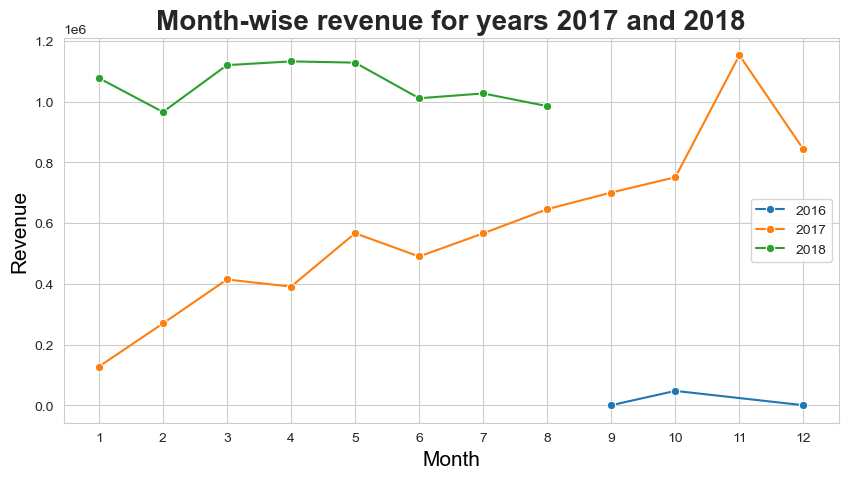

In [105]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2016['total_revenue'], x = revenue2016.index, marker = 'o', label = '2016')
sns.lineplot(y = revenue2017['total_revenue'], x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['total_revenue'], x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise revenue for years 2017 and 2018',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Revenue',fontsize=15,color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

**observation:**
1. There are not many records available for the year 2016, so the revenue is also less. Therefore we consider only the records from the year 2017 to the available records upto August of 2018 for our analysis. 
2. From the available data, it is clearly evident that the revenue grew constantly all throughout the year 2017, starting from `127K Brazilian Real` all the way upto `1.15M Brazilian Real` during the `November 2017`. 
3. There was a dip in the revenue of around `310K Brazilian Real` in the `December of 2017`. 
4. The year `2018` saw a constant revenue flow which was in the range of `966K - 1.13M Brazilian Real`.
5. The revenue is in correspondance with the number of orders placed.

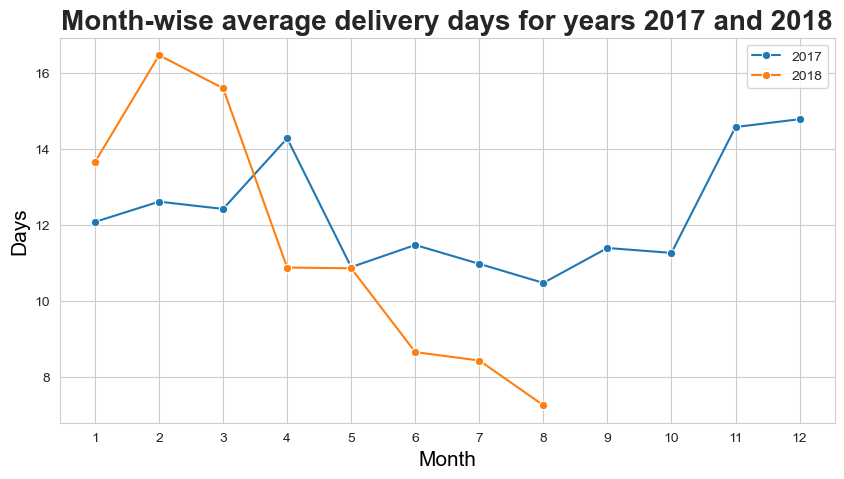

In [106]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017['purchased_delivered'], x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['purchased_delivered'], x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise average delivery days for years 2017 and 2018',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Days',fontsize=15,color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

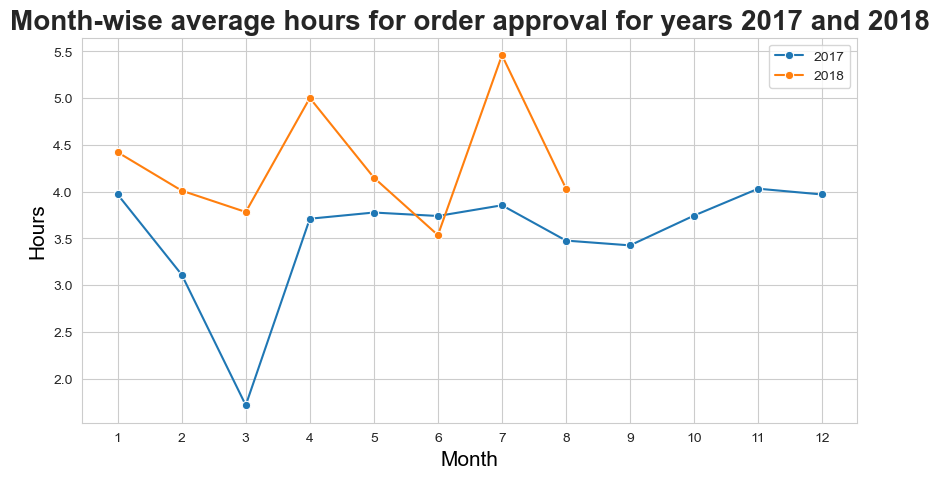

In [107]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017['purchased_approved']/3600, x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['purchased_approved']/3600, x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise average hours for order approval for years 2017 and 2018',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Hours',fontsize=15,color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

1. The data for the year 2016 was very less so we do not consider it for interpretation. 
2. Right from the start of the year 2017, until 2018, every month saw a rise in revenue, and revenue was at its peak in November of 2017. 
3. The rise in revenue is in accordance with the number of days it took on an average for the orders to get delivered to the customers.
4. This clearly indicates that the business thrives only based on the less number of days it takes for the order to get delivered. 
5. Optimising the delivery days would actually help in increasing the revenue and help sustain the business over years.  
6. The graphs clearly indicate that on periods when there were huge numbers of orders, the average delivery time was also comparatively high, which indicates that proper measures should be undertaken to carter fast delivery of products. 
7. The only viable method would be to invest in transit and delivery partners. 
Hours taken for the order to get approved does not have any impact on the business,

In [108]:
quarters2017 = pd.DataFrame(columns = ['total_revenue'])
quarters2018 = pd.DataFrame(columns = ['total_revenue'])
quarters2017.loc['Q1'] = [sum(revenue2017.total_revenue[:3])]
quarters2017.loc['Q2'] = [sum(revenue2017.total_revenue[3:6])]
quarters2017.loc['Q3'] = [sum(revenue2017.total_revenue[6:9])]
quarters2017.loc['Q4'] = [sum(revenue2017.total_revenue[9:])]
quarters2018.loc['Q1'] = [sum(revenue2018.total_revenue[:3])]
quarters2018.loc['Q2'] = [sum(revenue2018.total_revenue[3:6])]

In [109]:
quarters2017

total_revenue
Q1      811098.04
Q2     1447520.17
Q3     1913014.95
Q4     2747424.67

In [110]:
quarters2018

total_revenue
Q1     3164698.20
Q2     3273102.41

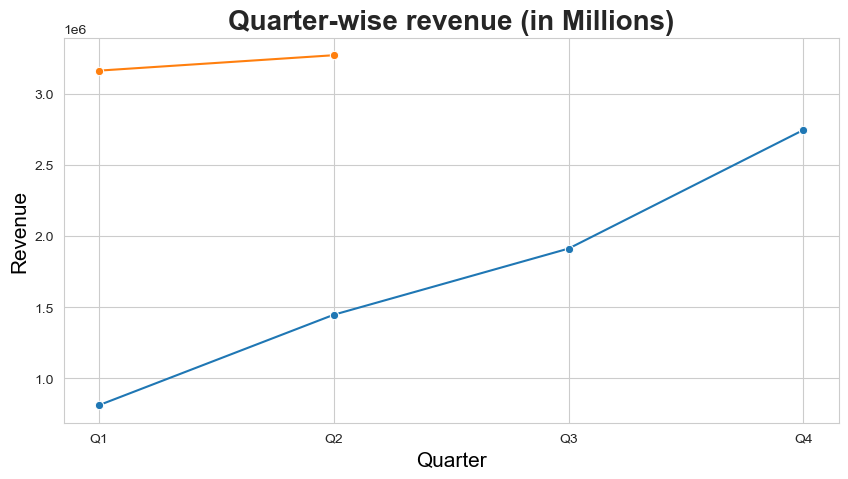

In [111]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = quarters2017['total_revenue'], x = quarters2017.index, marker = 'o')
sns.lineplot(y = quarters2018['total_revenue'], x = quarters2018.index, marker = 'o')
plt.title('Quarter-wise revenue (in Millions)',fontweight='bold',fontsize=20)
plt.xlabel('Quarter',fontsize=15,color='black')
plt.ylabel('Revenue',fontsize=15,color='black')
plt.show()

**observation:**
1. We only see the financial year 2017 to the Q2 of financial year 2018 as there are only those records available with us.
2. The revenue was on the rise during this period, which stood at a high of `3.27M Brazilian Real` at `Q2 of FY2018`. 
3. Comparing the first and second quarters, we find that the revenue increased very drastically, which says our business is on the uprising. 

## Analysis of sales during November and December of 2017

1. The sales during the month of November and December 2017 is alone studied extensively because it was the month that saw the highest revenue generated, and which was followed by a sudden dip in revenue the very next month. 
2. It is also in connection with the `Black Friday Sale` which was on `Friday, 24th of November 2017`. 

In [112]:
november2017 = year2017[year2017.order_purchase_timestamp.dt.month == 11]
november2017['Date'] = november2017.order_purchase_timestamp.dt.day
november2017

order_id                       customer_id  \
1      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
10     85ce859fd6dc634de8d2f1e290444043  059f7fc5719c7da6cbafe370971a8d70   
17     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
26     68873cf91053cd11e6b49a766db5af1a  4632eb5a8f175f6fe020520ae0c678f3   
27     8f06cc6465925031568537b815f1198d  9916715c2ab6ee1710c9c32f0a534ad2   
...                                 ...                               ...   
49515  a2a701c6f01ddffde8a1bde136ed7d4a  8543703cb2bc95c3606af4af727d604f   
49519  4146f35ac7a7ef4e39fe344e563c1e3b  e0eac226ceae49858de89e8a5c1ba1ec   
49522  788541a19c0791de0504c5a9cb7e7bd5  a537aaf902d2f436eb7f44817154bb68   
49527  6ec4642f9993cc34f826cfb9068e5a2f  f00bb12620b7b232233cace1b229db18   
49529  0e4b26f1fb99fc0f0472dd5f403d36d4  2e96fa6d55b9732013caed9866e2552d   

      order_status order_purchase_timestamp   order_approved_at  \
1        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
10       delivered      2017-11-21 00:03:41 2017-11-21 00:14:22   
17       delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
26       delivered      2017-11-30 22:02:15 2017-12-02 02:51:18   
27       delivered      2017-11-15 11:31:41 2017-11-15 11:46:42   
...            ...                      ...                 ...   
49515    delivered      2017-11-26 10:26:55 2017-11-26 10:36:06   
49519    delivered      2017-11-26 19:42:22 2017-11-26 19:53:48   
49522    delivered      2017-11-30 17:54:28 2017-11-30 18:16:25   
49527    delivered      2017-11-21 20:18:03 2017-11-21 20:28:52   
49529    delivered      2017-11-05 16:17:53 2017-11-05 16:30:29   

      order_delivered_carrier_date order_delivered_customer_date  \
1              2017-11-22 13:39:59           2017-12-02 00:28:42   
10             2017-11-23 21:32:26           2017-11-27 18:28:00   
17             2017-12-13 21:14:05           2017-12-28 18:59:23   
26             2017-12-04 22:07:01           2017-12-05 20:28:40   
27             2017-11-16 22:03:00           2017-11-22 22:41:07   
...                            ...                           ...   
49515          2017-11-27 22:49:48           2017-12-16 02:54:56   
49519          2017-11-27 18:33:24           2017-12-05 18:38:40   
49522          2017-12-05 20:58:57           2017-12-13 20:34:50   
49527          2017-11-27 17:18:52           2017-12-02 16:48:46   
49529          2017-11-07 18:35:08           2017-11-08 16:08:56   

      order_estimated_delivery_date  purchased_approved  approved_carrier  \
1                        2017-12-15                1073                 3   
10                       2017-12-11                 641                 2   
17                       2017-12-21               10401                18   
26                       2017-12-18               17343                 2   
27                       2017-12-05                 901                 1   
...                             ...                 ...               ...   
49515                    2018-01-03                 551                 1   
49519                    2017-12-15                 686                 0   
49522                    2017-12-27                1317                 5   
49527                    2017-12-08                 649                 5   
49529                    2017-11-17                 756                 2   

       carrier_delivered  delivered_estimated  purchased_delivered  \
1                      9                   12                   13   
10                     3                   13                    6   
17                    14                   -8                   33   
26                     0                   12                    4   
27                     6                   12                    7   
...                  ...                  ...                  ...   
49515                 18                   17                   19   

In [113]:
blackfriday = november2017[november2017['Date']==24]
blackfriday

order_id                       customer_id  \
17     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
59     b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
60     b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
115    c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   
116    c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   
...                                 ...                               ...   
49388  b93b079468bdf6a20fd54cf45d1e03b6  e570debfd69192cdd2e846ae00869a33   
49413  efe279abeb0fb2d03273c495d19b9f29  a0973c8c7e186a3e7425bb1ae01b0c9c   
49480  d81e1aea4814c6e5744458bcd1f94693  70d1caf284f34ea4ee405e25edba63f5   
49481  d81e1aea4814c6e5744458bcd1f94693  70d1caf284f34ea4ee405e25edba63f5   
49511  c0524fb1b4c905d054adbddaffa2380c  92e8f9754238b9697d9dcbe02c20fc70   

      order_status order_purchase_timestamp   order_approved_at  \
17       delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
59       delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
60       delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
115      delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   
116      delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   
...            ...                      ...                 ...   
49388    delivered      2017-11-24 22:29:08 2017-11-25 01:31:36   
49413    delivered      2017-11-24 08:31:27 2017-11-24 08:56:30   
49480    delivered      2017-11-24 20:59:45 2017-11-25 00:37:55   
49481    delivered      2017-11-24 20:59:45 2017-11-25 00:37:55   
49511    delivered      2017-11-24 16:44:08 2017-11-28 03:39:41   

      order_delivered_carrier_date order_delivered_customer_date  \
17             2017-12-13 21:14:05           2017-12-28 18:59:23   
59             2017-11-28 22:37:15           2017-12-01 21:11:40   
60             2017-11-28 22:37:15           2017-12-01 21:11:40   
115            2017-12-08 23:28:26           2017-12-18 20:24:54   
116            2017-12-08 23:28:26           2017-12-18 20:24:54   
...                            ...                           ...   
49388          2017-11-28 21:54:48           2017-12-11 21:11:35   
49413          2017-11-24 21:41:16           2017-12-06 03:13:29   
49480          2017-11-27 17:34:30           2017-12-05 19:07:39   
49481          2017-11-27 17:34:30           2017-12-05 19:07:39   
49511          2017-12-01 17:29:06           2017-12-11 18:09:24   

      order_estimated_delivery_date  purchased_approved  approved_carrier  \
17                       2017-12-21               10401                18   
59                       2017-12-15               12981                 3   
60                       2017-12-15               12981                 3   
115                      2017-12-19               39098                10   
116                      2017-12-19               39098                10   
...                             ...                 ...               ...   
49388                    2017-12-20               10948                 3   
49413                    2017-12-21                1503                 0   
49480                    2017-12-15               13090                 2   
49481                    2017-12-15               13090                 2   
49511                    2017-12-22               39333                 3   

       carrier_delivered  delivered_estimated  purchased_delivered  \
17                    14                   -8                   33   
59                     2                   13                    6   
60                     2                   13                    6   
115                    9                    0                   24   
116                    9                    0                   24   
...                  ...                  ...                  ...   
49388                 12                    8                   16   

In [114]:
revenueNovember2017 = november2017.groupby('Date').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum'})
revenueNovember2017['total_revenue'] = revenueNovember2017.price + revenueNovember2017.freight_value

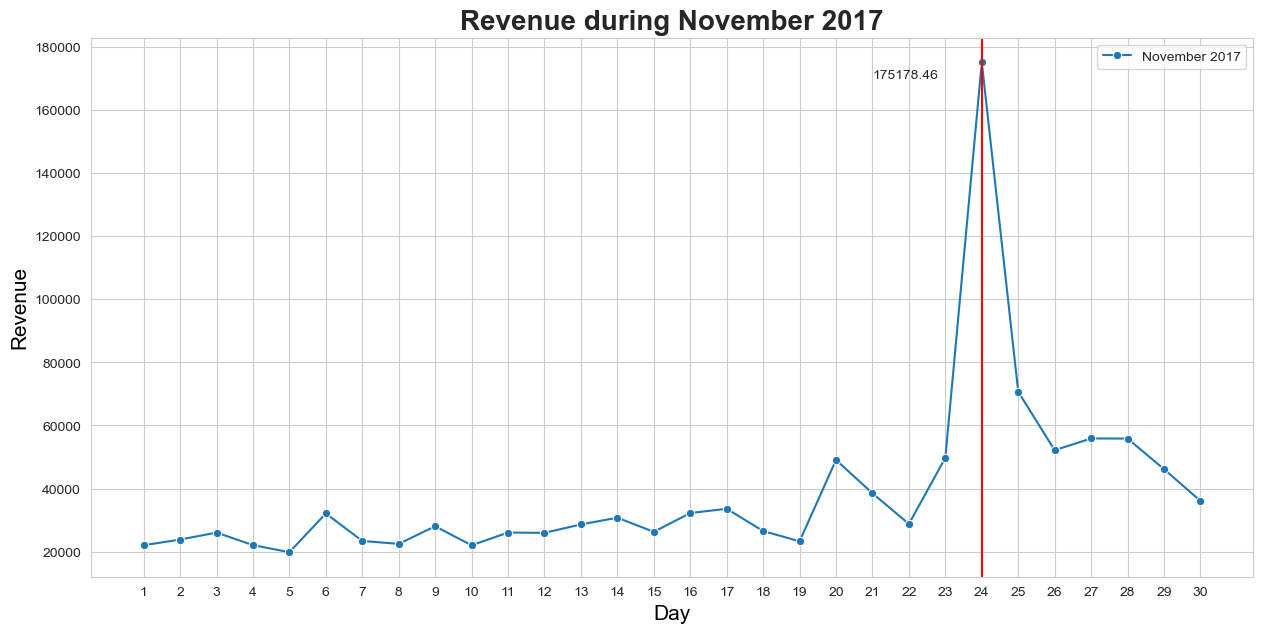

In [115]:
plt.figure(figsize=(15, 7))
sns.lineplot(y = revenueNovember2017['total_revenue'], x = revenueNovember2017.index, marker = 'o', label = 'November 2017')
plt.title('Revenue during November 2017',fontweight='bold',fontsize=20)
plt.axvline(24, c = 'r')
plt.annotate(revenueNovember2017.loc[24].total_revenue, (21, 170000))
plt.xlabel('Day',fontsize=15,color='black')
plt.ylabel('Revenue',fontsize=15,color='black')
plt.xticks(range(1, 31))
plt.legend()
plt.show()

**observation:**
1. `Black Friday Sale` fell on 24th of November during the year 2017, during which the highest number of orders `1147 orders` were placed. 
2. This generated the maximum revenue for a single day, which was around `175K Brazilian Real`.
3. During the further sales in later years, this should be tapped in to increase the revenue and compare with other players in the same industry.
4. The `peak and trought` seen in the revenue during the months of November and December corresponds to Black Friday Sale, and the dip in sales is not necessarily due to any specific reasons. This is said because the December's revenue is still higher than that of November's. So the trought is not due to any wrongdoings in the business. 

## Black Friday Sale

In [116]:
blackFriday = november2017[november2017.Date == 24]
blackFriday.head()

order_id                       customer_id  \
17   6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
59   b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
60   b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
115  c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   
116  c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   

    order_status order_purchase_timestamp   order_approved_at  \
17     delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
59     delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
60     delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
115    delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   
116    delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   

    order_delivered_carrier_date order_delivered_customer_date  \
17           2017-12-13 21:14:05           2017-12-28 18:59:23   
59           2017-11-28 22:37:15           2017-12-01 21:11:40   
60           2017-11-28 22:37:15           2017-12-01 21:11:40   
115          2017-12-08 23:28:26           2017-12-18 20:24:54   
116          2017-12-08 23:28:26           2017-12-18 20:24:54   

    order_estimated_delivery_date  purchased_approved  approved_carrier  \
17                     2017-12-21               10401                18   
59                     2017-12-15               12981                 3   
60                     2017-12-15               12981                 3   
115                    2017-12-19               39098                10   
116                    2017-12-19               39098                10   

     carrier_delivered  delivered_estimated  purchased_delivered  \
17                  14                   -8                   33   
59                   2                   13                    6   
60                   2                   13                    6   
115                  9                    0                   24   
116                  9                    0                   24   

     order_item_id                        product_id  \
17               1  be021417a6acb56b9b50d3fd2714baa8   
59               1  a6ad77b15e566298a4e8ee2011ab1255   
60               2  a6ad77b15e566298a4e8ee2011ab1255   
115              1  028b0b0277744a9eaa2c4f57c24dcb68   
116              2  028b0b0277744a9eaa2c4f57c24dcb68   

                            seller_id shipping_limit_date  price  \
17   f5f46307a4d15880ca14fab4ad9dfc9b 2017-11-30 00:21:09  339.0   
59   1025f0e2d44d7041d6cf58b6550e0bfa 2017-12-01 00:38:17   31.8   
60   1025f0e2d44d7041d6cf58b6550e0bfa 2017-12-01 00:38:17   31.8   
115  1025f0e2d44d7041d6cf58b6550e0bfa 2017-12-05 03:48:24  359.7   
116  1025f0e2d44d7041d6cf58b6550e0bfa 2017-12-05 03:48:24  359.7   

     freight_value  Month  Date  
17           17.12     11    24  
59           39.28     11    24  
60           39.28     11    24  
115          17.27     11    24  
116          17.27     11    24

In [117]:
lateDeliveringSellers_blackFriday = blackFriday[blackFriday.delivered_estimated < 0]['seller_id']
lateDeliveringSellers_blackFriday.value_counts().to_frame()

seller_id
8160255418d5aaa7dbdc9f4c64ebda44         22
1f50f920176fa81dab994f9023523100         18
1025f0e2d44d7041d6cf58b6550e0bfa         18
4a3ca9315b744ce9f8e9374361493884         12
54965bbe3e4f07ae045b90b0b8541f52         11
...                                     ...
1da3aeb70d7989d1e6d9b0e887f97c23          1
7b07b3c7487f0ea825fc6df75abd658b          1
c864036feaab8c1659f65ea4faebe1da          1
712e6ed8aa4aa1fa65dab41fed5737e4          1
2c9e548be18521d1c43cde1c582c6de8          1

[114 rows x 1 columns]

In [118]:
print('Number of sellers who delivered late during black friday: ', blackFriday[blackFriday.delivered_estimated < 0]['seller_id'].nunique())

Number of sellers who delivered late during black friday:  114


In [119]:
averageLateDeliveringSellers = november2017[november2017.delivered_estimated < 0].groupby('Date').agg({'seller_id' : 'nunique'}).drop(24).seller_id.mean()
print('Average late delivering sellers over the months: ', round(averageLateDeliveringSellers))

Average late delivering sellers over the months:  22


In [120]:
lateDeliveringSellers_blackFriday = blackFriday[blackFriday.delivered_estimated < 0]['seller_id']
lateDeliveringSellers_blackFriday.value_counts()[lateDeliveringSellers_blackFriday.value_counts() > 5]

8160255418d5aaa7dbdc9f4c64ebda44    22
1f50f920176fa81dab994f9023523100    18
1025f0e2d44d7041d6cf58b6550e0bfa    18
4a3ca9315b744ce9f8e9374361493884    12
54965bbe3e4f07ae045b90b0b8541f52    11
ea8482cd71df3c1969d7b9473ff13abc    10
Name: seller_id, dtype: int64

In [121]:
ontimeDelivery_bf = blackFriday[blackFriday.delivered_estimated > 0][['purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']].mean()
lateDelivery_bf = blackFriday[blackFriday.delivered_estimated < 0][['purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']].mean()
comparision = pd.DataFrame([ontimeDelivery_bf, lateDelivery_bf]).T
comparision.rename(columns = {0 : 'on time delivery', 1 : 'late delivery'}, inplace = True)
comparision

on time delivery  late delivery
purchased_approved       15799.711174   18235.150000
approved_carrier             3.282197       7.869231
carrier_delivered            8.235795      23.346154
delivered_estimated          9.737689      -9.788462
purchased_delivered         12.554924      32.380769

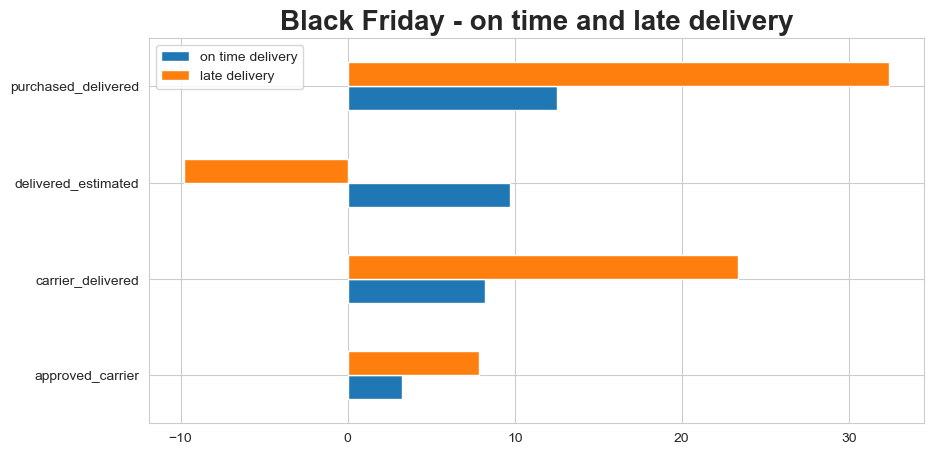

In [122]:
comparision.drop('purchased_approved').plot(kind = 'barh', figsize = (10, 5))
plt.title('Black Friday - on time and late delivery',fontweight='bold',fontsize=20)
plt.show()

**Observations:**
1. On an average day, there were 22 sellers who delivered late than expected. But for orders placed during Black Friday Sale, there were 114 sellers who delivered the orders late. 
2. There were many factors which influenced these late deliveries. 
 - Delivery partner side delays. We could not handle the huge number of deliveries, 

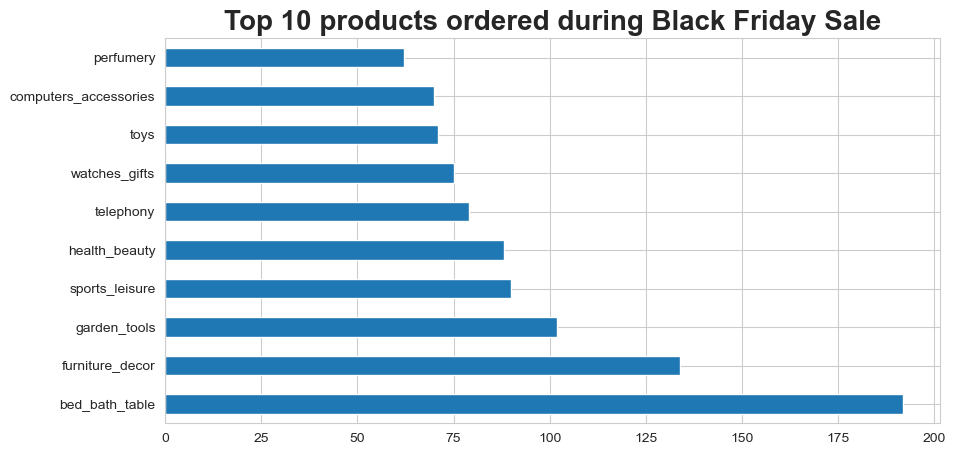

In [123]:
blackFridayProducts = blackFriday.merge(products[['product_id', 'product_category_name']], on = 'product_id').merge(productCategoryTranslation, on = 'product_category_name')
plt.figure(figsize = (10, 5))
blackFridayProducts.product_category_name_english.value_counts()[:10].plot(kind = 'barh')
plt.title('Top 10 products ordered during Black Friday Sale',fontweight='bold',fontsize=20)
plt.show()

## Analysis of Late Delivery of Orders

In [124]:
def is_late(Days):
    if Days < -10:
        return 'delayed by >10 days'
    elif Days < -5 and Days >= -10:
        return 'delayed by 6-10 days'
    elif Days < 0 and Days >= -5:
        return 'delayed by 1-5 days'
    else:
        return 'on time'

In [125]:
lateDelivery = orders[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivered_estimated']].merge(orderReviews[['order_id', 'review_score']], on = 'order_id', how = 'left')
lateDelivery['is_late'] = lateDelivery['delivered_estimated'].apply(is_late)
lateDelivery.head()

order_id order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2  47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4  ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-10 21:25:13                    2017-10-18   
1           2018-08-07 15:27:45                    2018-08-13   
2           2018-08-17 18:06:29                    2018-09-04   
3           2017-12-02 00:28:42                    2017-12-15   
4           2018-02-16 18:17:02                    2018-02-26   

   delivered_estimated  review_score  is_late  
0                    7           NaN  on time  
1                    5           4.0  on time  
2                   17           NaN  on time  
3                   12           NaN  on time  
4                    9           NaN  on time

In [126]:
lateDelivery.is_late.value_counts()

on time                 88643
delayed by 1-5 days      3616
delayed by >10 days      2300
delayed by 6-10 days     1911
Name: is_late, dtype: int64

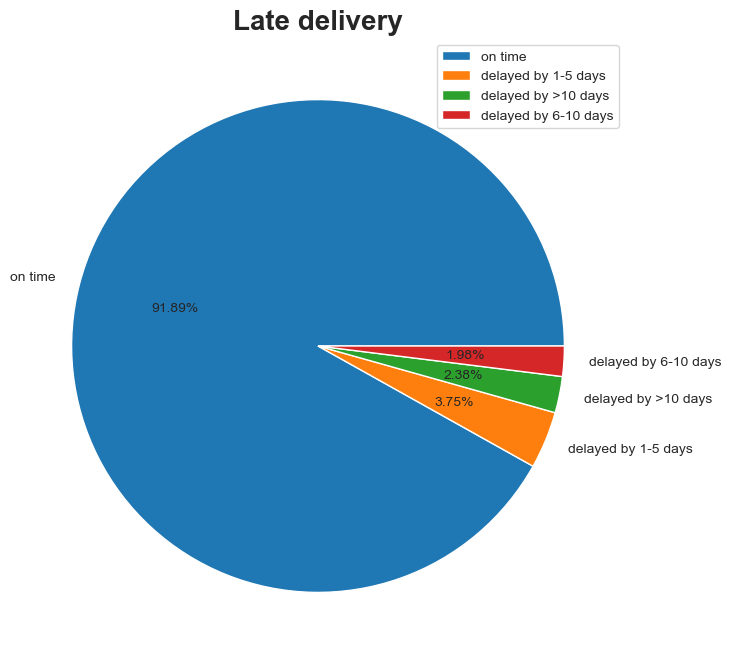

In [127]:
plt.figure(figsize = (10, 8))
plt.pie(lateDelivery.is_late.value_counts(), autopct = '%0.2f%%', labels = lateDelivery.is_late.value_counts().index)
plt.title('Late delivery',fontweight='bold',fontsize=20)
plt.legend()
plt.show()

**observation:**
1. To find out if the order was delivered late than the expected date of delivery, we took the `order_delivered_customer_date` and the `order_estimated_delivery_date` and subtracted them to get the required number of days. 
2. If the value was in `positive`, it denotes that the products were delivered before the estimated date of delivery, which are mapped to `on time`.
3. Late deliveries upto 5 days are mapped to `delayed by 1-5 days`, while late deliveries between 5-10 days are mapped to `delayed by 6-10 days` and late deliveries greater than 10 are mapped to `delayed by >10 days`.
4. Of all the orders, `91.89%` of orders were delivered on time, whereas, only `8.11%` of deliveries were delivered late. But this level of late deliveries should also be minimized in order to retain more customers, as they could potentially move to other e-commerce platforms. 

In [128]:
reviewScore_lateDelivery = lateDelivery.groupby('is_late').agg({'review_score' : 'mean'})
reviewScore_lateDelivery

review_score
is_late                           
delayed by 1-5 days       3.405612
delayed by 6-10 days      1.813084
delayed by >10 days       1.736559
on time                   4.040078

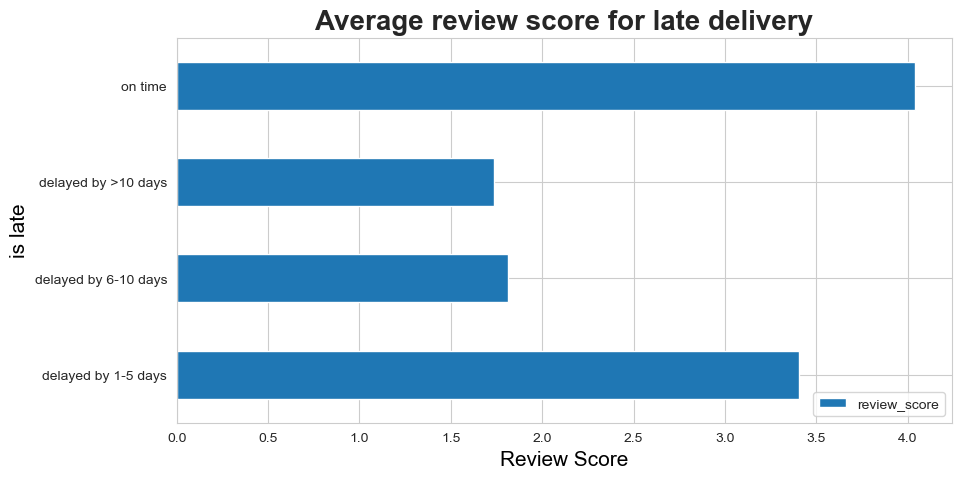

In [129]:
reviewScore_lateDelivery.plot(kind = 'barh', figsize = (10, 5))
plt.title('Average review score for late delivery',fontweight='bold',fontsize=20)
plt.xlabel('Review Score',fontsize=15,color='black')
plt.ylabel('is late',fontsize=15,color='black')
plt.show()

**observation:**
1. The delivery time with respect to the expected date of delivery is correlated with the review score that the customers give. 
2. For instance, orders which were delivered on time recieved on an average of `4` as their review score, while orders which were delivered late by more than 10 days recieved an average review score of `1.7`. 
3. This could be a clear indication that the customers were dissatisfied by the late deliveries, and this needs to be minimized to a greater extent to retain customers. 

In [130]:
lateDeliveringSellers = lateDelivery[lateDelivery.is_late != 'on time'].merge(orderItems[['seller_id', 'product_id', 'order_id', 'product_id']], on = 'order_id', how = 'left')
lateDeliveringSellersAnalysis = lateDeliveringSellers.groupby('seller_id').agg({'order_id' : 'count', 'delivered_estimated' : 'mean'}).sort_values(by = 'order_id', ascending = False)[:11]
lateDeliveringSellersAnalysis['delivered_estimated'] = lateDeliveringSellersAnalysis['delivered_estimated'].round()
lateDeliveringSellersAnalysis

order_id  delivered_estimated
seller_id                                                      
4a3ca9315b744ce9f8e9374361493884       214                -11.0
1f50f920176fa81dab994f9023523100       182                -10.0
4869f7a5dfa277a7dca6462dcf3b52b2       133                 -9.0
1025f0e2d44d7041d6cf58b6550e0bfa       131                 -6.0
7c67e1448b00f6e969d365cea6b010ab       130                -11.0
6560211a19b47992c3666cc44a7e94c0       124                 -7.0
ea8482cd71df3c1969d7b9473ff13abc       123                 -8.0
955fee9216a65b617aa5c0531780ce60       119                 -7.0
da8622b14eb17ae2831f4ac5b9dab84a       113                -11.0
cc419e0650a3c5ba77189a1882b7556a       103                 -8.0
8b321bb669392f5163d04c59e235e066       103                 -9.0

**observation:**
1. The list of sellers who were involved in late deliveries of more than 100 orders, and the `delivered_estimated` field is the average number of days taken for late delivery of such orders. 
2. If we could make these sellers deliver on time, we could further avoid customer dissatisfaction, which was reflected in the low review rating. 

## Analysis by days and hours

In [131]:
def weekend(dayName):
    if dayName == 'Saturday' or dayName == 'Sunday':
        return 'weekend'
    else:
        return 'weekday'

In [132]:
ordersTimeAnalysis = orders.copy().merge(orderItems, on = 'order_id')
ordersTimeAnalysis['Hour'] = ordersTimeAnalysis.order_purchase_timestamp.dt.hour
ordersTimeAnalysis['day_name'] = ordersTimeAnalysis.order_purchase_timestamp.dt.day_name()
ordersTimeAnalysis['is_weekend'] = ordersTimeAnalysis.day_name.apply(weekend)
ordersTimeAnalysis['total_revenue'] = ordersTimeAnalysis.price + ordersTimeAnalysis.freight_value
ordersTimeAnalysis.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  order_item_id  \
0                  6                    7                    8              1   
1                 12                    5                   13              1   
2                  9                   17                    9              1   
3                  9                   12                   13              1   
4                  1                    9                    2              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date   price  freight_value  Hour   day_name is_weekend  \
0 2017-10-06 11:07:15   29.99           8.72    10     Monday    weekday   
1 2018-07-30 03:24:27  118.70          22.76    20    Tuesday    weekday   
2 2018-08-13 08:55:23  159.90          19.22     8  Wednesday    weekday   
3 2017-11-23 19:45:59   45.00          27.20    19   Saturday    weekend   
4 2018-02-19 20:31:37   19.90           8.72    21    Tuesday    weekday   

   total_revenue  
0          38.71  
1         141.46  
2         179.12  
3          72.20  
4          28.62

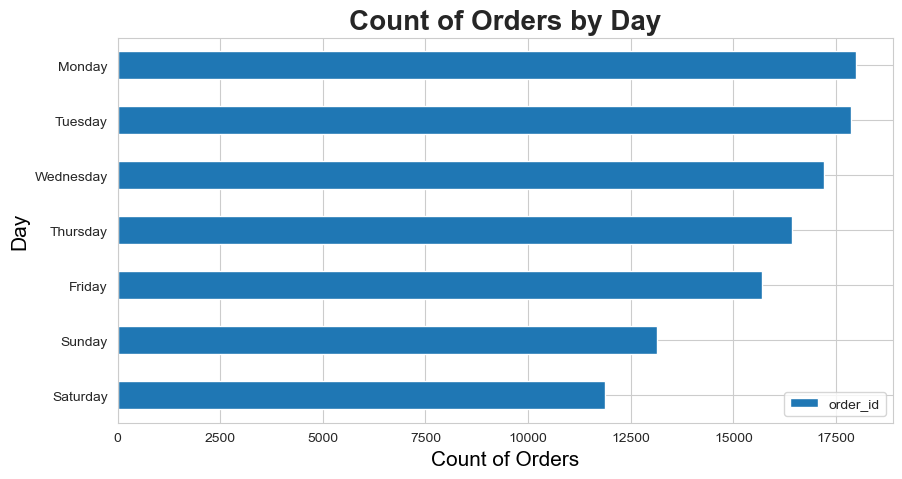

In [133]:
ordersTimeAnalysis.groupby(['day_name']).agg({'order_id' : 'count'}).sort_values('order_id').plot(kind = 'barh', figsize = (10, 5))
plt.title('Count of Orders by Day',fontweight='bold',fontsize=20)
plt.xlabel('Count of Orders',fontsize=15,color='black')
plt.ylabel('Day',fontsize=15,color='black')
plt.show()

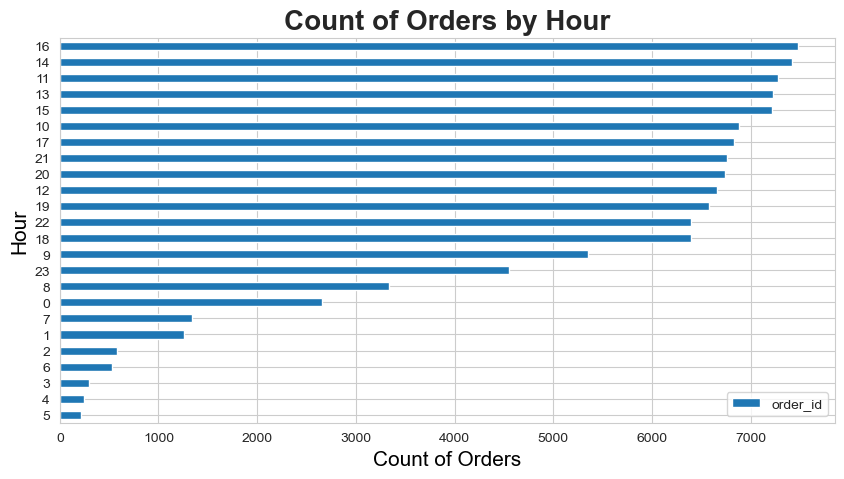

In [134]:
ordersTimeAnalysis.groupby(['Hour']).agg({'order_id' : 'count'}).sort_values('order_id').plot(kind = 'barh', figsize = (10, 5))
plt.title('Count of Orders by Hour',fontweight='bold',fontsize=20)
plt.xlabel('Count of Orders',fontsize=15,color='black')
plt.ylabel('Hour',fontsize=15,color='black')
plt.show()

**observation**
1. The above plots represent the peak hours and peak days during which the customers order products. 
2. The customer traffic is more during the weekdays compared to the weekends, with `Monday` and `Tuesday` being the days when most orders were placed. 
3. Similarly, the peak time during which most number of orders were placed were between `11 AM` to `4 PM` in the afternoon. 
4. We could improve our sales and revenue if we could tap in this information and target the customers with attractive offers. 

<a id="products"></a>
# 7. Exploratory Data Analysis On Products dataframe

In [135]:
products.head(3)

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   
2  96bd76ec8810374ed1b65e291975717f         esporte_lazer   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0

In [136]:
print('Number of records:',products.shape[0])
print('Number of Columns:',products.shape[1])

Number of records: 32951
Number of Columns: 9


In [137]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [138]:
products.dropna(inplace = True)

**observation**
1. Since the `product IDs are masked`, if they do not have any category name, we could not interpret anything from the data, so dropping such records will be the best way to proceed with the analysis. 

In [139]:
orderedProducts = products.merge(orderItems, on = 'product_id').merge(productCategoryTranslation, on = 'product_category_name')[['product_id', 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_id', 'price', 'freight_value']]
orderedProducts['total_revenue'] = orderedProducts.price + orderedProducts.freight_value
orderedProducts.head()

product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
2  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
3  0d009643171aee696f4733340bc2fdd0                     perfumery   
4  0d009643171aee696f4733340bc2fdd0                     perfumery   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 39.0                       346.0                 2.0   
2                 39.0                       346.0                 2.0   
3                 52.0                       150.0                 1.0   
4                 52.0                       150.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1             400.0               27.0                5.0              20.0   
2             400.0               27.0                5.0              20.0   
3             422.0               21.0               16.0              18.0   
4             422.0               21.0               16.0              18.0   

                           order_id   price  freight_value  total_revenue  
0  e17e4f88e31525f7deef66779844ddce   10.91           7.39          18.30  
1  048cc42e03ca8d43c729adf6962cb348   16.90           7.78          24.68  
2  5fa78e91b5cb84b6a8ccc42733f95742   16.90           7.78          24.68  
3  24b1c4d88fdb7a2dc87f8ecc7d8f47f1  339.00          17.13         356.13  
4  7b13c77c64a9a956500cbf1a9a23798d  275.00          23.48         298.48

In [140]:
orderedProductsAnalysis = orderedProducts.groupby('product_category_name_english', as_index = False).agg({
                                                        'product_id'                      : 'count',                                                       
                                                        'order_id'                        : 'count',
                                                        'price'                           : 'sum',
                                                        'freight_value'                   : 'sum',
                                                        'total_revenue'                   : 'sum'})
orderedProductsAnalysis.head()

product_category_name_english  product_id  order_id     price  \
0    agro_industry_and_commerce         212       212  72530.47   
1              air_conditioning         297       297  55024.96   
2                           art         209       209  24202.64   
3         arts_and_craftmanship          24        24   1814.01   
4                         audio         364       364  50688.50   

   freight_value  total_revenue  
0        5843.60       78374.07  
1        6749.23       61774.19  
2        4045.17       28247.81  
3         370.13        2184.14  
4        5710.44       56398.94

In [141]:
orderedProductsAnalysis.select_dtypes(include = np.number).describe()

product_id      order_id         price  freight_value  total_revenue
count     71.000000     71.000000  7.100000e+01      71.000000   7.100000e+01
mean    1563.690141   1563.690141  1.887980e+05   31313.653521   2.201117e+05
std     2606.537422   2606.537422  3.036850e+05   50281.462423   3.515343e+05
min        2.000000      2.000000  2.832900e+02      41.220000   3.245100e+02
25%       93.000000     93.000000  9.171185e+03    1973.205000   1.174393e+04
50%      281.000000    281.000000  4.685688e+04    6749.230000   5.605240e+04
75%     1819.000000   1819.000000  2.029071e+05   35505.620000   2.214684e+05
max    11115.000000  11115.000000  1.258681e+06  204693.040000   1.441248e+06

In [142]:
top10revenueGenerating = orderedProductsAnalysis.sort_values(by = 'total_revenue', ascending = False)[:10]
top10revenueGenerating

product_category_name_english  product_id  order_id       price  \
43                 health_beauty        9670      9670  1258681.34   
70                 watches_gifts        5991      5991  1205005.68   
7                 bed_bath_table       11115     11115  1036988.68   
65                sports_leisure        8641      8641   988048.97   
15         computers_accessories        7827      7827   911954.32   
39               furniture_decor        8334      8334   729762.49   
49                    housewares        6964      6964   632248.66   
20                    cool_stuff        3796      3796   635290.85   
5                           auto        4235      4235   592720.11   
42                  garden_tools        4347      4347   485256.46   

    freight_value  total_revenue  
43      182566.73     1441248.07  
70      100535.93     1305541.61  
7       204693.04     1241681.72  
65      168607.51     1156656.48  
15      147318.08     1059272.40  
39      172749.30      902511.79  
49      146149.11      778397.77  
20       84039.10      719329.95  
5        92664.21      685384.32  
42       98962.75      584219.21

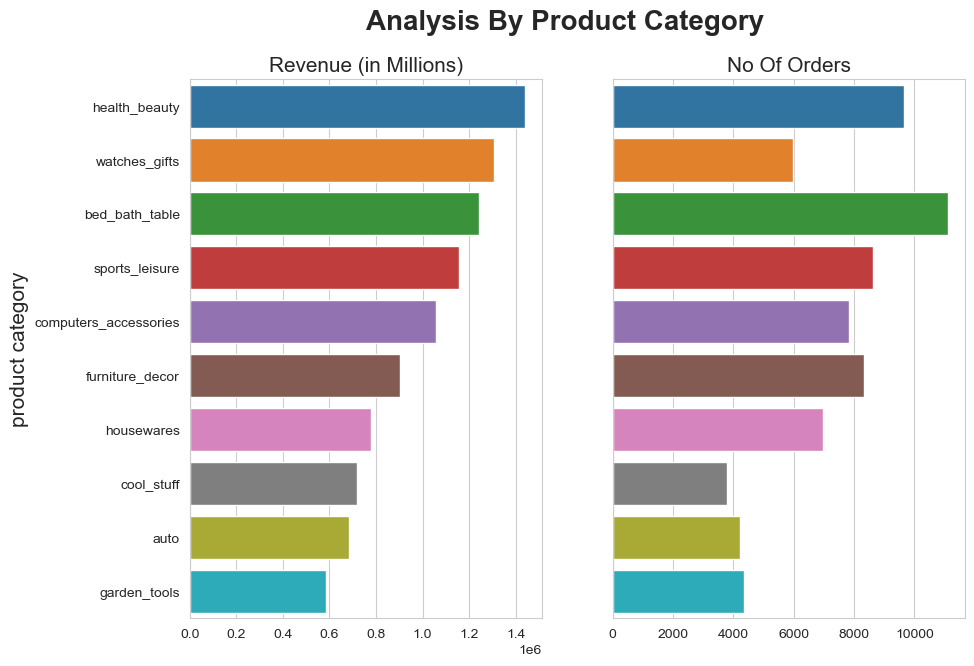

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), sharey=True)
fig.suptitle('Analysis By Product Category', fontsize=20, fontweight = 'bold')

sns.barplot(ax=ax[0], x='total_revenue', y= top10revenueGenerating.product_category_name_english, data = top10revenueGenerating)
ax[0].set_title('Revenue (in Millions)', fontsize = 15)
ax[0].set_ylabel('product category', fontsize = 15)

sns.barplot(ax=ax[1], x='order_id', y = top10revenueGenerating.product_category_name_english, data = top10revenueGenerating)
ax[1].set_title('No Of Orders', fontsize = 15)

for i in range(0,2):
    ax[i].set(xlabel=None)

for i in range(1,2):
    ax[i].set(ylabel=None)

In [144]:
bottom10revenueGenerating = orderedProductsAnalysis.sort_values(by = 'total_revenue', ascending = True)[:10]
bottom10revenueGenerating

product_category_name_english  product_id  order_id    price  \
61         security_and_services           2         2   283.29   
29     fashion_childrens_clothes           8         8   569.85   
11             cds_dvds_musicals          14        14   730.00   
46                home_comfort_2          30        30   760.27   
35                       flowers          33        33  1110.04   
23           diapers_and_hygiene          39        39  1567.59   
3          arts_and_craftmanship          24        24  1814.01   
52                    la_cuisine          14        14  2054.99   
32                 fashion_sport          30        30  2119.51   
27        fashio_female_clothing          48        48  2803.64   

    freight_value  total_revenue  
61          41.22         324.51  
29          95.51         665.36  
11         224.99         954.99  
46         410.31        1170.58  
35         488.87        1598.91  
23         573.68        2141.27  
3          370.13        2184.14  
52         333.55        2388.54  
32         578.13        2697.64  
27         621.75        3425.39

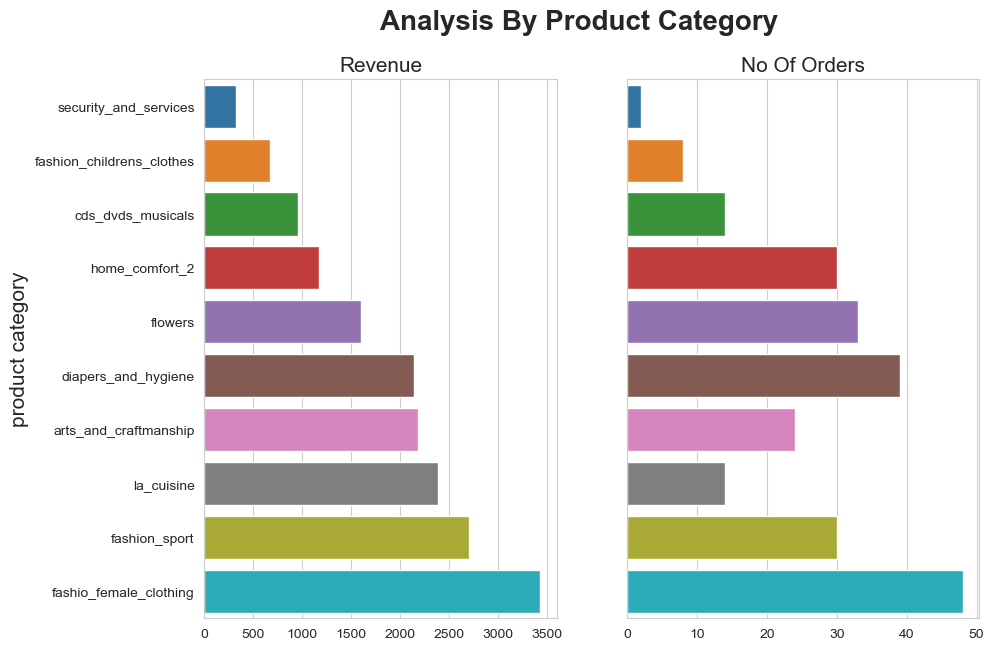

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), sharey=True)
fig.suptitle('Analysis By Product Category', fontsize=20, fontweight = 'bold')

sns.barplot(ax=ax[0], x='total_revenue', y= bottom10revenueGenerating.product_category_name_english, data = bottom10revenueGenerating)
ax[0].set_title('Revenue', fontsize = 15)
ax[0].set_ylabel('product category', fontsize = 15)

sns.barplot(ax=ax[1], x='order_id', y = bottom10revenueGenerating.product_category_name_english, data = bottom10revenueGenerating)
ax[1].set_title('No Of Orders', fontsize = 15)

for i in range(0,2):
    ax[i].set(xlabel=None)

for i in range(1,2):
    ax[i].set(ylabel=None)

**Observations:**
1. The main inference from the analysis of products ordered is, the total revenue each product category generated.
2. The minimum revenue generated products were, `security and services`, `fashion childrens clothes` and `cds dvds musicals`.
3. While the maximum revenue generated products were `health beauty`, `watches gifts` and `bed bath table`.
4. `security and services` is the least ordered product, while `bed bath table` is the most ordered product. 

<a id="merge"></a>
## Merging the individual datasets

In [146]:
merged = customers.merge(orders, on = 'customer_id').merge(orderItems, on = 'order_id').merge(products, on = 'product_id').merge(geolocationMean, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix').merge(payments, on = 'order_id').merge(sellers, on = 'seller_id').merge(productCategoryTranslation, on = 'product_category_name').merge(orderReviews, on = 'order_id', how = 'left')
merged.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

  customer_zip_code_prefix    customer_city customer_state  \
0                    14409           franca             SP   
1                    68030         santarem             PA   
2                    68030         santarem             PA   
3                    92480  nova santa rita             RS   
4                    25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2017-11-10 00:47:48          2017-11-22 01:43:37   
2 2017-11-10 00:47:48          2017-11-22 01:43:37   
3 2017-05-08 22:22:56          2017-05-19 20:16:31   
4 2018-02-04 22:29:19          2018-02-19 18:21:47   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35                    2017-06-05   
1           2017-11-28 00:09:50                    2017-12-19   
2           2017-11-28 00:09:50                    2017-12-19   
3           2017-05-26 09:54:04                    2017-06-12   
4           2018-02-28 21:09:00                    2018-03-22   

   purchased_approved  approved_carrier  carrier_delivered  \
0                 997                 6                  1   
1               86255                12                  5   
2               86255                12                  5   
3                7890                10                  6   
4                9819                14                  9   

   delivered_estimated  purchased_delivered  order_item_id  \
0                   10                    8              1   
1                   20                   18              1   
2                   20                   18              2   
3                   16                   18              1   
4                   21                   25              1   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
2  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
3  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
4  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   

  shipping_limit_date   price  freight_value product_category_name  \
0 2017-05-22 15:22:12  124.99          21.88     moveis_escritorio   
1 2017-11-23 00:47:18  112.99          24.90     moveis_escritorio   
2 2017-11-23 00:47:18  112.99          24.90     moveis_escritorio   
3 2017-05-22 22:22:56  124.99          15.62     moveis_escritorio   
4 2018-02-18 21:29:19  106.99          30.59     moveis_escritorio   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 41.0                      1141.0                 1.0   
1                 41.0                      1141.0                 1.0   
2                 41.0                      1141.0                 1.0   
3                 41.0                      1141.0                 1.0   
4                 41.0                      1141.0       

In [147]:
merged.shape

(113086, 48)

**Observations:**
1. The merged dataframe is obtained from merging all the individual dataframes. We will use the merged dataframe for our further analysis. 

In [148]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113086 entries, 0 to 113085
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113086 non-null  object        
 1   customer_unique_id             113086 non-null  object        
 2   customer_zip_code_prefix       113086 non-null  object        
 3   customer_city                  113086 non-null  object        
 4   customer_state                 113086 non-null  object        
 5   order_id                       113086 non-null  object        
 6   order_status                   113086 non-null  object        
 7   order_purchase_timestamp       113086 non-null  datetime64[ns]
 8   order_approved_at              113086 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113086 non-null  datetime64[ns]
 10  order_delivered_customer_date  113086 non-null  datetime64[ns]
 11  

In [149]:
merged.head(1)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

  customer_zip_code_prefix customer_city customer_state  \
0                    14409        franca             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35                    2017-06-05   

   purchased_approved  approved_carrier  carrier_delivered  \
0                 997                 6                  1   

   delivered_estimated  purchased_delivered  order_item_id  \
0                   10                    8              1   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   

  shipping_limit_date   price  freight_value product_category_name  \
0 2017-05-22 15:22:12  124.99          21.88     moveis_escritorio   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 41.0                      1141.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0            8683.0               54.0               64.0              31.0   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        14409       -20.468849       -47.382173   

   payment_sequential payment_type  payment_installments  payment_value  \
0                   1  credit_card                     2         146.87   

   seller_zip_code_prefix      seller_city seller_state  \
0                    8577  itaquaquecetuba           SP   

  product_category_name_english review_id  review_score review_comment_title  \
0              office_furniture       NaN           NaN                  NaN   

  review_comment_message review_creation_date review_answer_timestamp  
0                    NaN                  NaT                     NaT

In [150]:
merged.drop(columns = ['order_status', 'order_item_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'approved_carrier', 'carrier_delivered', 'seller_id', 'shipping_limit_date', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'geolocation_zip_code_prefix', 'payment_sequential', 'seller_zip_code_prefix', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'seller_city', 'seller_state'], axis = 1, inplace = True)
merged.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

  customer_zip_code_prefix    customer_city customer_state  \
0                    14409           franca             SP   
1                    68030         santarem             PA   
2                    68030         santarem             PA   
3                    92480  nova santa rita             RS   
4                    25931             mage             RJ   

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7      2018-02-03 19:45:40   

   purchased_approved  delivered_estimated  purchased_delivered  \
0                 997                   10                    8   
1               86255                   20                   18   
2               86255                   20                   18   
3                7890                   16                   18   
4                9819                   21                   25   

                         product_id   price  freight_value  product_weight_g  \
0  a9516a079e37a9c9c36b9b78b10169e8  124.99          21.88            8683.0   
1  a9516a079e37a9c9c36b9b78b10169e8  112.99          24.90            8683.0   
2  a9516a079e37a9c9c36b9b78b10169e8  112.99          24.90            8683.0   
3  a9516a079e37a9c9c36b9b78b10169e8  124.99          15.62            8683.0   
4  a9516a079e37a9c9c36b9b78b10169e8  106.99          30.59            8683.0   

   product_length_cm  product_height_cm  product_width_cm  geolocation_lat  \
0               54.0               64.0              31.0       -20.468849   
1               54.0               64.0              31.0        -2.430314   
2               54.0               64.0              31.0        -2.430314   
3               54.0               64.0              31.0       -29.826454   
4               54.0               64.0              31.0       -22.604835   

   geolocation_lng payment_type  payment_installments  payment_value  \
0       -47.382173  credit_card                     2         146.87   
1       -54.693217  credit_card                     1         275.79   
2       -54.693217  credit_card                     1         275.79   
3       -51.245676  credit_card                     7         140.61   
4       -43.026500  credit_card                    10         137.58   

  product_category_name_english  review_score  
0              office_furniture           NaN  
1              office_furniture           NaN  
2              office_furniture           NaN  
3              office_furniture           NaN  
4              office_furniture           NaN

<a id="Grp"></a>
## Creating a grouped-by dataframe based on individual customers

In [151]:
final = merged.groupby('customer_unique_id', as_index=False).agg({'customer_zip_code_prefix'      : 'max',
                                                                  'customer_city'                 : 'max',
                                                                  'customer_state'                : 'max',
                                                                  'order_id'                      : 'nunique',
                                                                  'purchased_approved'            : 'mean',
                                                                  'delivered_estimated'           : 'min',
                                                                  'purchased_delivered'           : 'mean',
                                                                  'product_id'                    : 'nunique',
                                                                  'price'                         : 'sum',
                                                                  'freight_value'                 : 'sum',
                                                                  'product_weight_g'              : 'sum',
                                                                  'product_length_cm'             : 'sum',
                                                                  'product_height_cm'             : 'sum',
                                                                  'product_width_cm'              : 'sum',
                                                                  'geolocation_lat'               : 'mean',
                                                                  'geolocation_lng'               : 'mean',
                                                                  'payment_type'                  : 'max',
                                                                  'payment_installments'          : 'max',
                                                                  'payment_value'                 : 'sum',
                                                                  'review_score'                  : 'mean'})

final.head()

customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state  order_id  purchased_approved  delivered_estimated  \
0             SP         1               891.0                    4   
1             SP         1             26057.0                    4   
2             SC         1                 0.0                    1   
3             PA         1              1176.0                   11   
4             SP         1              1270.0                    7   

   purchased_delivered  product_id   price  freight_value  product_weight_g  \
0                  6.0           1  129.90          12.00            1500.0   
1                  3.0           1   18.90           8.29             375.0   
2                 25.0           1   69.00          17.22            1500.0   
3                 20.0           1   25.99          17.63             150.0   
4                 13.0           1  180.00          16.89            6050.0   

   product_length_cm  product_height_cm  product_width_cm  geolocation_lat  \
0               34.0                7.0              32.0       -23.333580   
1               26.0               11.0              18.0       -23.545029   
2               25.0               50.0              35.0       -27.532246   
3               19.0                5.0              11.0        -1.304189   
4               16.0                3.0              11.0       -23.496567   

   geolocation_lng payment_type  payment_installments  payment_value  \
0       -46.823060  credit_card                     8         141.90   
1       -46.781482  credit_card                     1          27.19   
2       -48.618667  credit_card                     8          86.22   
3       -48.476339  credit_card                     4          43.62   
4       -47.462811  credit_card                     6         196.89   

   review_score  
0           5.0  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [152]:
final.rename(columns = {'order_id' : 'no_of_orders', 'product_id' : 'no_of_products'}, inplace = True)

In [153]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91813 entries, 0 to 91812
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        91813 non-null  object 
 1   customer_zip_code_prefix  91813 non-null  int64  
 2   customer_city             91813 non-null  object 
 3   customer_state            91813 non-null  object 
 4   no_of_orders              91813 non-null  int64  
 5   purchased_approved        91813 non-null  float64
 6   delivered_estimated       91813 non-null  int64  
 7   purchased_delivered       91813 non-null  float64
 8   no_of_products            91813 non-null  int64  
 9   price                     91813 non-null  float64
 10  freight_value             91813 non-null  float64
 11  product_weight_g          91813 non-null  float64
 12  product_length_cm         91813 non-null  float64
 13  product_height_cm         91813 non-null  float64
 14  produc

In [154]:
final['customer_zip_code_prefix'] = final.customer_zip_code_prefix.astype('object')

In [155]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91813 entries, 0 to 91812
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        91813 non-null  object 
 1   customer_zip_code_prefix  91813 non-null  object 
 2   customer_city             91813 non-null  object 
 3   customer_state            91813 non-null  object 
 4   no_of_orders              91813 non-null  int64  
 5   purchased_approved        91813 non-null  float64
 6   delivered_estimated       91813 non-null  int64  
 7   purchased_delivered       91813 non-null  float64
 8   no_of_products            91813 non-null  int64  
 9   price                     91813 non-null  float64
 10  freight_value             91813 non-null  float64
 11  product_weight_g          91813 non-null  float64
 12  product_length_cm         91813 non-null  float64
 13  product_height_cm         91813 non-null  float64
 14  produc

In [156]:
# to save the grouped-by dataframe as a new csv for future usage.
#final.to_csv('final.csv')
#merged.to_csv('merged.csv')

<a id="rfm"></a>
## RMF Analysis
RFM analysis is a data driven customer behavior segmentation technique.<br> <br>

RFM stands for recency, frequency, and monetary value.<br><br>

The  idea is to segment customers based on when their last purchase was, how often they’ve purchased in the past, and how much they’ve spent overall. All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers.<br>
<img src = "rfm.png" width = "600" height = "600">

<a id="recency"></a>
### Recency

In [157]:
recency = merged.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

customer_unique_id    LastPurchaseDate
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42

##### The last purchase date of every individual customer is taken using the group by function.

In [158]:
recent_date = merged['order_purchase_timestamp'].dt.date.max()
print('The last recent date in the available dataset is: ', recent_date)

The last recent date in the available dataset is:  2018-08-29


In [159]:
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

customer_unique_id    LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      111
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      114
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      537
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      321
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      288

##### Recency is calculated by subtracting the last recent date available in the dataset with every customer's last purchase date. 

<a id="frequency"></a>
### Frequency

In [160]:
frequency = merged.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

##### Frequency is calculated by selecting the number of unique order_id or orders placed by each individual customer.

<a id="monetary"></a>
### Monetary

In [161]:
monetary = merged.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

customer_unique_id  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89

##### Monetary is calculated by summing up the payment value of each individual customer who placed one or more orders.

In [162]:
rfm = recency.merge(frequency, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

##### The rfm dataframe is the recency, frequency and monetary values of individual customers.

<a id="rfmanalysis"></a>
### Analysing the RFM data

In [163]:
rfm[rfm.Recency == 0]

customer_unique_id  Recency  Frequency  Monetary
1482   0421e7a23f21e5d54efed456aedbc513        0          1    119.42
4514   0c6d7218d5f3fa14514fd29865269993        0          1    178.25
12232  21dbe8eabd00b34492a939c540e2b1a7        0          1     14.29
13217  24ac2b4327e25baf39f2119e4228976a        0          1     93.75
33275  5c58de6fb80e93396e2f35642666b693        0          1   1021.92
43864  7a22d14aa3c3599238509ddca4b93b01        0          1     73.10
45977  7febafa06d9d8f232a900a2937f04338        0          1     61.29
63186  afbcfd0b9c5233e7ccc73428526fbb52        0          1   2486.25
64986  b4dcade04bc548b7e3b0243c801f8c26        0          1    106.95
65739  b701bebbdf478f5500348f03aff62121        0          1     33.23
88994  f80013faf776e37bcea7634d59c2181e        0          1     74.21

In [164]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

##### The recency column had values 0, i.e., a customer came at the last day of the date which we took as the threshold to calculate recency. 0 in recency should be treated or removed for creating the target variable, i.e., Churn and for further process of scaling or normalization, so the 0 is converted to 1 for our convenience. 

##### A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

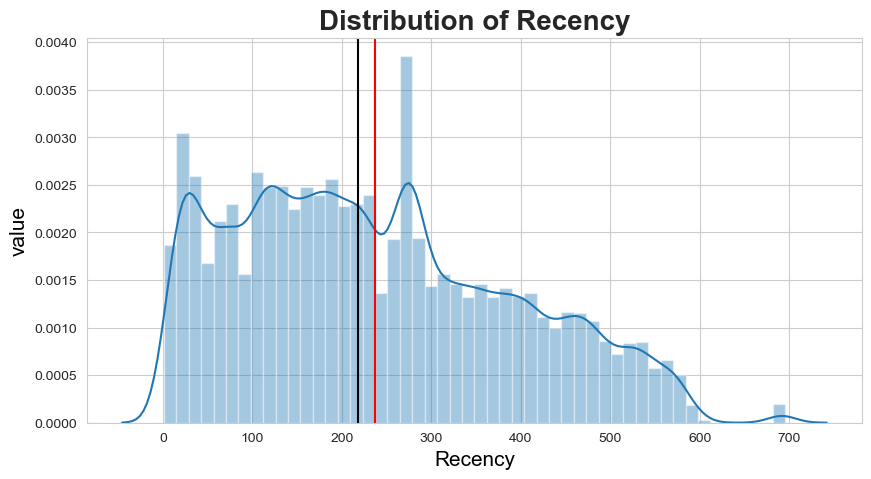

Mean of recency:  236.81492816921352
Median of recency:  218.0
Skewness of recency:  0.45152042399255654


In [165]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontweight='bold',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

##### Since the skewness of recency is 0.45, we could say that it is symmetrically or normally distributed. 

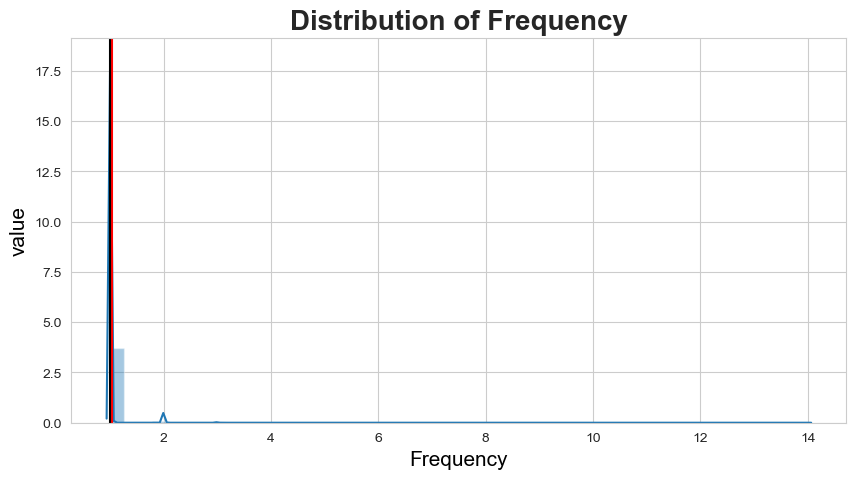

Mean of frequency:  1.0330781044078725
Median of frequency:  1.0
Skewness of frequency:  10.585296256148329


In [166]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

##### Since the skewness of frequency is 10.98, we could say that it is highly positively or right skewed.

In [167]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

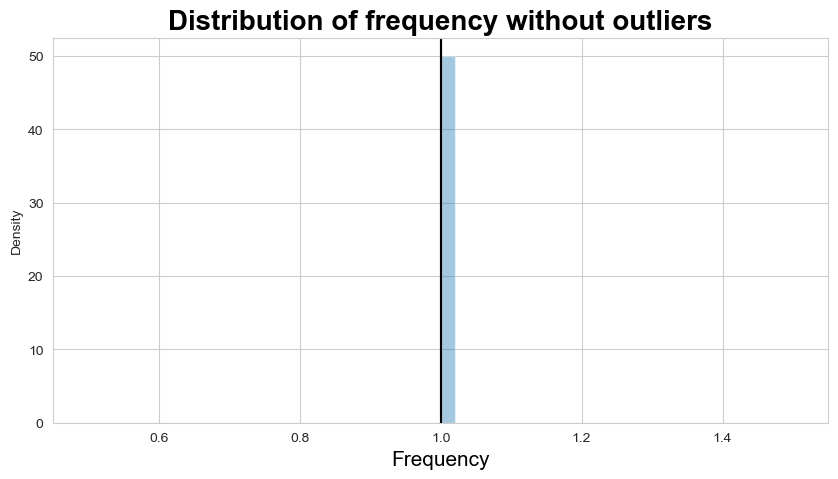

In [168]:
plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [169]:
frequencyDistribution.Frequency.describe()

count    89081.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64

**Observations:**
1. The frequency from RFM analysis without outliers has a standard deviation of 0, that is, all the values are only 1. 
2. So the frequency will not help in our analysis and also to segment the customers. 

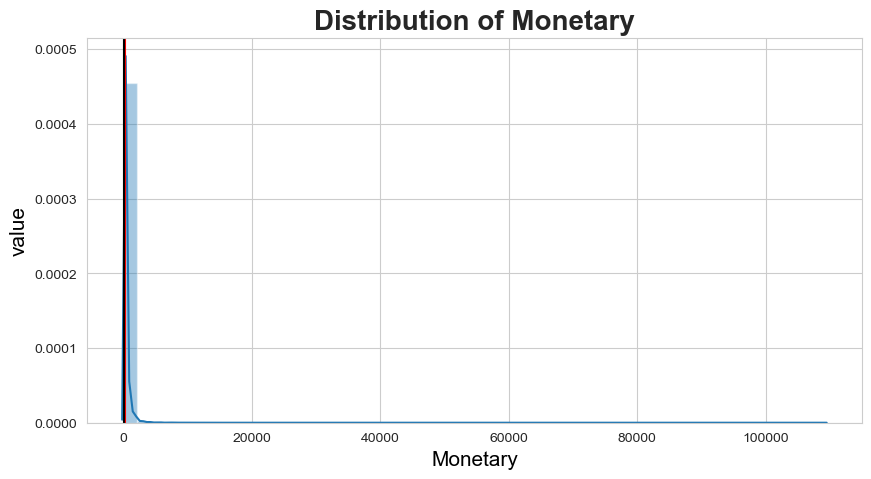

Mean of monetary:  212.12455501943725
Median of monetary:  112.83
Skewness of monetary:  70.58353211288973


In [170]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

##### Since the skewness of monetary is 70.33, we could say that it is highly positively or right skewed.

In [171]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

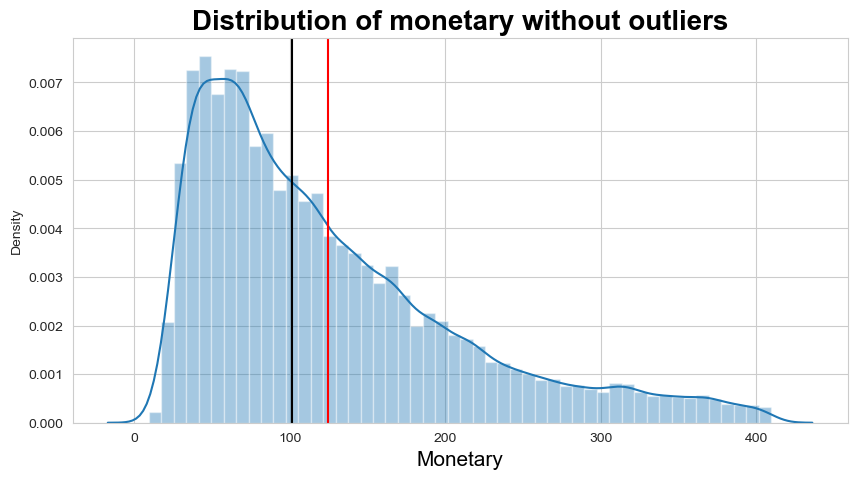

In [172]:
plt.figure(figsize=(10, 5))
sns.distplot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [173]:
monetaryDistribution.Monetary.describe()

count    82808.000000
mean       124.749936
std         85.073285
min          9.590000
25%         60.000000
50%        101.250000
75%        166.710000
max        409.600000
Name: Monetary, dtype: float64

**Observations:**
1. The average monetary value after outlier treatement is `124.74 Brazilian Real`, while the median value is `101.25 Brazilian Real`. 
2. The middle 50% of values of monetary lie between `60 and 166.71 Brazilian Real`. 

<a id="seg"></a>
## Customer Segmentation

<a id="lare"></a>
### Labels for Recency

In [174]:
ll_r = rfm.Recency.quantile(0.25)
mid_r = rfm.Recency.quantile(0.50)
ul_r = rfm.Recency.quantile(0.75)
print(ll_r, mid_r, ul_r)

113.0 218.0 345.0


In [175]:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4

In [176]:
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  
0              1  
1              2  
2              4  
3              3  
4              3

#### Recency label breakdown:

1 - These are the customers who whose visit date(s) are the most recent. (Recency value within the 25% quantile)<br>
2 - These are the customers who whose visit date(s) are not very recent. (Recency value between 25% and 50% quantile)<br>
3 - These are the customers who whose visit date(s) are somewhat recent. (Recency value between 50% and 75% quantile)<br>
4 - These are the customers who whose visit date(s) are the oldest. (Recency value more than 75% quantile)

<a id="lamy"></a>
### Labels for Monetary

In [177]:
ll_m = rfm.Monetary.quantile(0.25)
mid_m = rfm.Monetary.quantile(0.50)
ul_m = rfm.Monetary.quantile(0.75)
print(ll_m, mid_m, ul_m)

63.83 112.83 202.14


In [178]:
def monetary_label(money):
    if money <= ll_m:
        return 4
    elif (money > ll_m) and (money <= mid_m):
        return 3
    elif (money > mid_m) and (money <= ul_m):
        return 2
    elif money > ul_m:
        return 1

In [179]:
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  
0              1               2  
1              2               4  
2              4               3  
3              3               4  
4              3               2

#### Monetary label breakdown:

1 - These are the customers who spend large amount. (Monetary value within the 25% quantile)<br>
2 - These are the customers who spend good amount. (Monetary value between 25% and 50% quantile)<br>
3 - These are the customers who spend moderately. (Monetary value between 50% and 75% quantile)<br>
4 - These are the customers who spend the least. (Monetary value more than 75% quantile)

<a id="lafr"></a>
### Labels for Frequency

In [180]:
rfm.Frequency.value_counts()

1     89081
2      2512
3       174
4        29
5         9
6         3
7         3
9         1
14        1
Name: Frequency, dtype: int64

In [181]:
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

In [182]:
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  frequency_label  
0              1               2                4  
1              2               4                4  
2              4               3                4  
3              3               4                4  
4              3               2                4

#### Frequency label breakdown:

1 - These are the most frequent customers. (Frequency > 3)<br>
2 - These are the frequent frequent customers. (Frequency = 3)<br>
3 - These are the somewhat frequent customers. (Frequency = 2)<br>
4 - These are the least frequent customers. (Frequency = 1)

In [183]:
rfm['Rank'] = list(zip(rfm.recency_label, rfm.monetary_label, rfm.frequency_label))
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  frequency_label       Rank  
0              1               2                4  (1, 2, 4)  
1              2               4                4  (2, 4, 4)  
2              4               3                4  (4, 3, 4)  
3              3               4                4  (3, 4, 4)  
4              3               2                4  (3, 2, 4)

In [184]:
rfm.recency_label.value_counts()

2    23098
1    23000
4    22891
3    22824
Name: recency_label, dtype: int64

In [185]:
rfm.frequency_label.value_counts()

4    89081
3     2512
2      174
1       46
Name: frequency_label, dtype: int64

In [186]:
rfm.monetary_label.value_counts()

4    22961
1    22953
2    22950
3    22949
Name: monetary_label, dtype: int64

Since most of the frequency class is 4, we will use only recency and monetary for customer segmentation. 

In [187]:
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  frequency_label       Rank rank_rm  
0              1               2                4  (1, 2, 4)  (1, 2)  
1              2               4                4  (2, 4, 4)  (2, 4)  
2              4               3                4  (4, 3, 4)  (4, 3)  
3              3               4                4  (3, 4, 4)  (3, 4)  
4              3               2                4  (3, 2, 4)  (3, 2)

In [188]:
rfm.rank_rm.value_counts()

(1, 2)    5936
(4, 3)    5909
(3, 3)    5891
(2, 4)    5848
(1, 1)    5835
(2, 2)    5823
(2, 1)    5809
(4, 4)    5791
(1, 4)    5698
(3, 1)    5684
(3, 2)    5625
(4, 1)    5625
(3, 4)    5624
(2, 3)    5618
(4, 2)    5566
(1, 3)    5531
Name: rank_rm, dtype: int64

<a id="ranking"></a>
## Meaning of ranks:

### The most important and least important customers (Recency Rank, Monetary Rank):
- Comparing Recency and Monetary - Recency rank is of higher importance than Monetary rank

#### The most important ranks:
1. (Recency - 1, Monetary - 1) - They are very recent and have spend a lot of money
2. (Recency - 1, Monetary - 2) - They are very recent and have spend a good amount of money
3. (Recency - 2, Monetary - 1) - They are recent and have spend a lot of money
4. (Recency - 2, Monetary - 2) - They are recent and have spend a good of money
5. (Recency - 1, Monetary - 3) - They are very recent and have spend a decent of money

#### The least important ranks:
1. (Recency - 4, Monetary - 4) - They are not at all recent and spend a negligible amount of money
2. (Recency - 4, Monetary - 3) - They are not at all recent and spend a a decent amount of money
3. (Recency - 4, Monetary - 2) - They are not at all recent and spend a good amount of money
4. (Recency - 3, Monetary - 4) - They are not very recent and spend a negligible amount of money
5. (Recency - 3, Monetary - 3) - They are not very recent and spend a decent amount of money

<a id="target"></a>
### Creating a target variable

In [189]:
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   recency_label  monetary_label  frequency_label       Rank rank_rm  Churn  
0              1               2                4  (1, 2, 4)  (1, 2)      0  
1              2               4                4  (2, 4, 4)  (2, 4)      0  
2              4               3                4  (4, 3, 4)  (4, 3)      1  
3              3               4                4  (3, 4, 4)  (3, 4)      1  
4              3               2                4  (3, 2, 4)  (3, 2)      1

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. <br><br>
We used the recency column to frame our target variable. If the customer's recency falls above the average value of recency, we consider such customers as churned. The rest of the customers as not churned. <br><br>
We used the mean of recency as the threshold as the recency is normally or symmetrically distributed. <br><br>
We will have to impute the target variable to the main dataframe and do the further classification algorithm.

<a id="finaldf"></a>
## Merging the target variable with our final dataframe

In [190]:
final = final.merge(rfm[['customer_unique_id', 'Recency', 'Monetary', 'Frequency', 'Churn']], on = 'customer_unique_id')
final.head()

customer_unique_id customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                     7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                     6053        osasco   
2  0000f46a3911fa3c0805444483337064                    88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                    66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                    18040      sorocaba   

  customer_state  no_of_orders  purchased_approved  delivered_estimated  \
0             SP             1               891.0                    4   
1             SP             1             26057.0                    4   
2             SC             1                 0.0                    1   
3             PA             1              1176.0                   11   
4             SP             1              1270.0                    7   

   purchased_delivered  no_of_products   price  freight_value  \
0                  6.0               1  129.90          12.00   
1                  3.0               1   18.90           8.29   
2                 25.0               1   69.00          17.22   
3                 20.0               1   25.99          17.63   
4                 13.0               1  180.00          16.89   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0            1500.0               34.0                7.0              32.0   
1             375.0               26.0               11.0              18.0   
2            1500.0               25.0               50.0              35.0   
3             150.0               19.0                5.0              11.0   
4            6050.0               16.0                3.0              11.0   

   geolocation_lat  geolocation_lng payment_type  payment_installments  \
0       -23.333580       -46.823060  credit_card                     8   
1       -23.545029       -46.781482  credit_card                     1   
2       -27.532246       -48.618667  credit_card                     8   
3        -1.304189       -48.476339  credit_card                     4   
4       -23.496567       -47.462811  credit_card                     6   

   payment_value  review_score  Recency  Monetary  Frequency  Churn  
0         141.90           5.0      111    141.90          1      0  
1          27.19           NaN      114     27.19          1      0  
2          86.22           NaN      537     86.22          1      1  
3          43.62           NaN      321     43.62          1      1  
4         196.89           NaN      288    196.89          1      1

In [191]:
records, features = final.shape
print('Total number of unique records: ', records)
print('Total number of features: ', features)

Total number of unique records:  91813
Total number of features:  25


In [192]:
final['Churn'] = final.Churn.astype('object')

<a id="out"></a>
### Outlier Treatement

Skewness of no_of_orders: 10.585296256148329
Standard deviation of no_of_orders: 0.2068549724334724


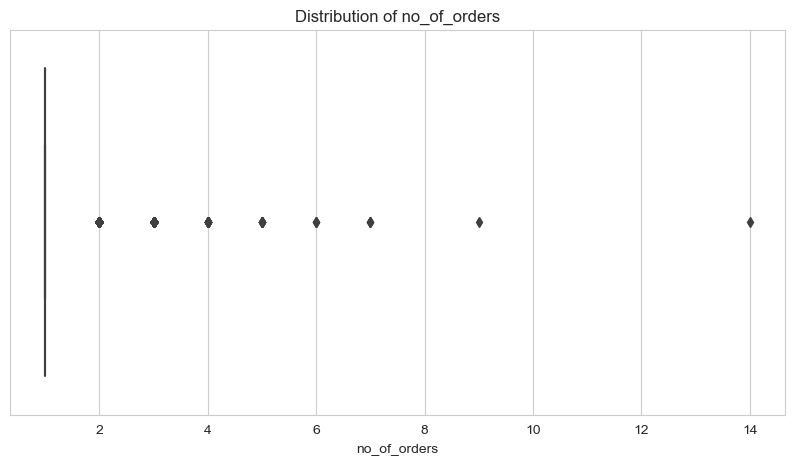

Skewness of purchased_approved: 1.667928604518987
Standard deviation of purchased_approved: 23579.11811399036


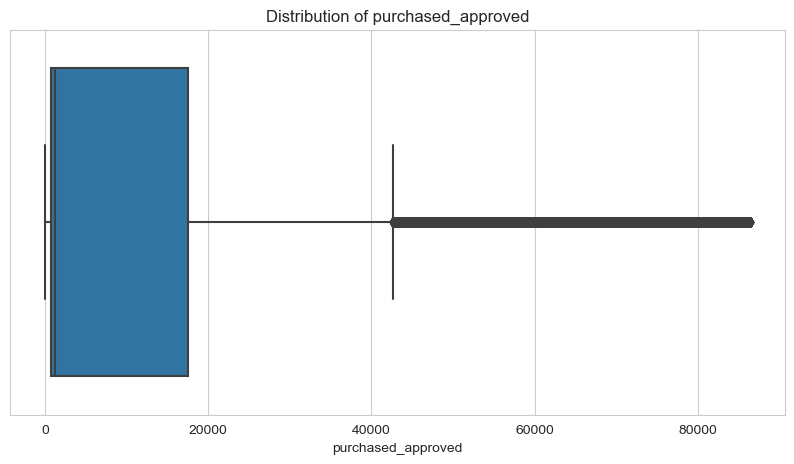

Skewness of delivered_estimated: -2.088286856892505
Standard deviation of delivered_estimated: 10.187986731917716


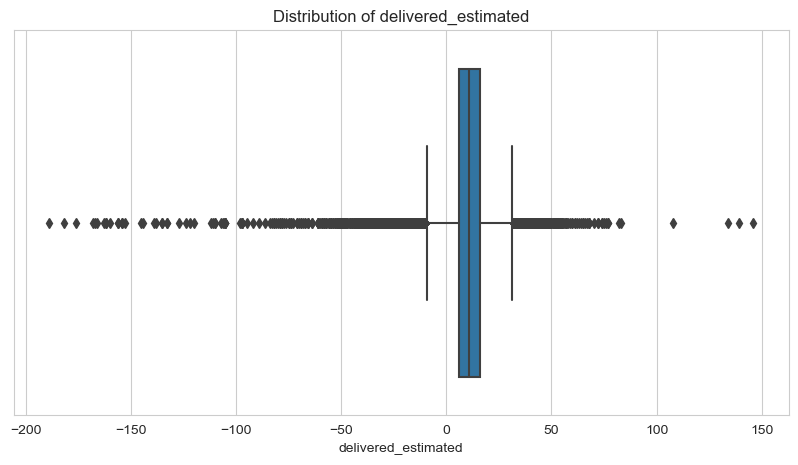

Skewness of purchased_delivered: 3.8853907592376564
Standard deviation of purchased_delivered: 9.542753028486288


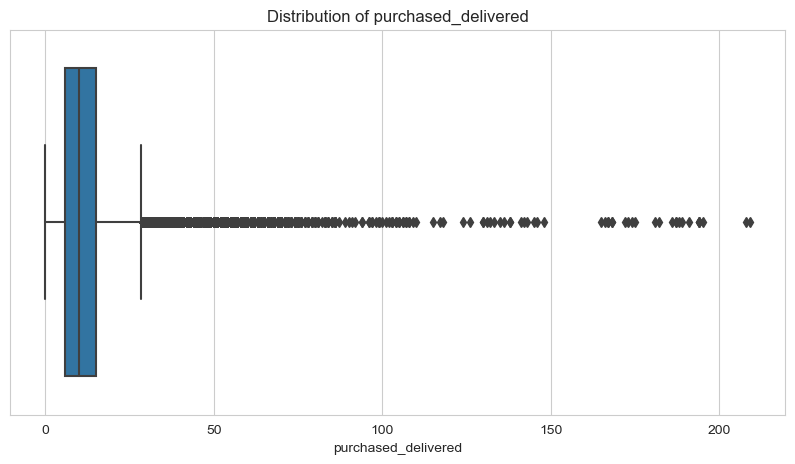

Skewness of no_of_products: 7.362787175800258
Standard deviation of no_of_products: 0.31476882259991573


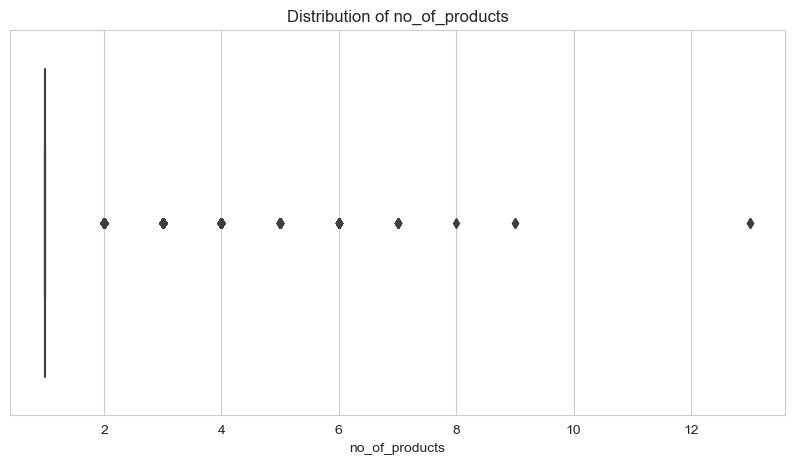

Skewness of price: 11.754475311493609
Standard deviation of price: 243.82931900160096


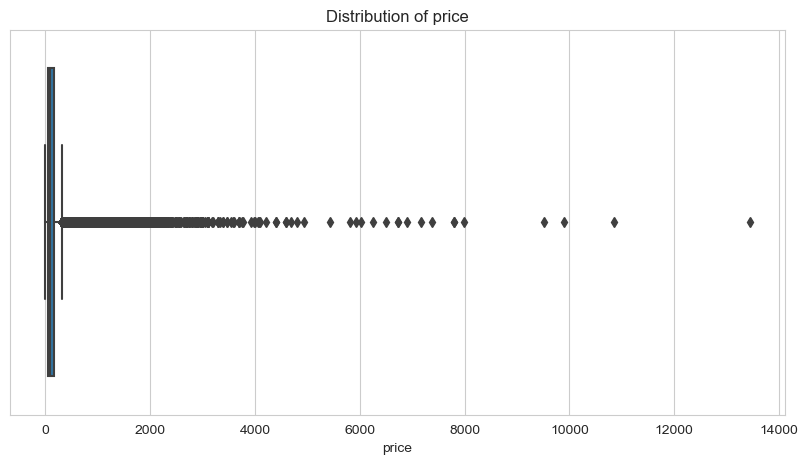

Skewness of freight_value: 13.59774060287801
Standard deviation of freight_value: 26.858324901391562


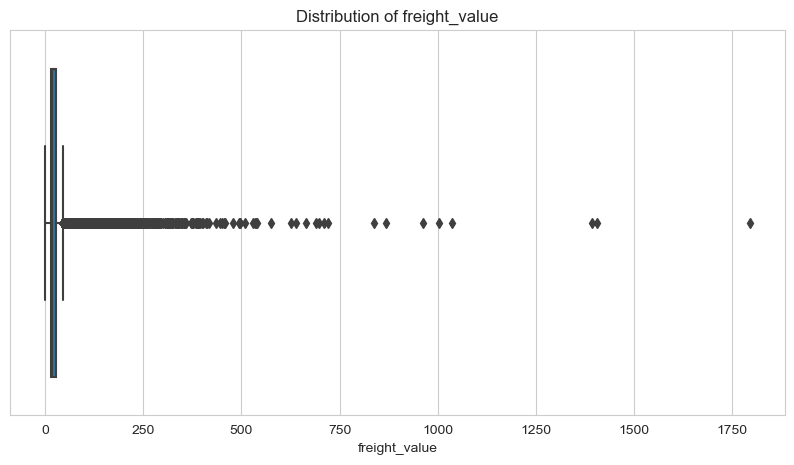

Skewness of product_weight_g: 12.115060834361428
Standard deviation of product_weight_g: 5792.502050169426


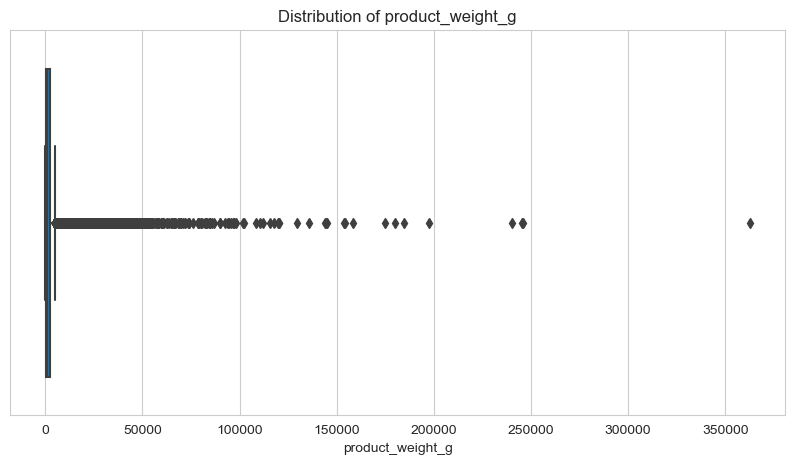

Skewness of product_length_cm: 15.904503747885638
Standard deviation of product_length_cm: 35.36812043087404


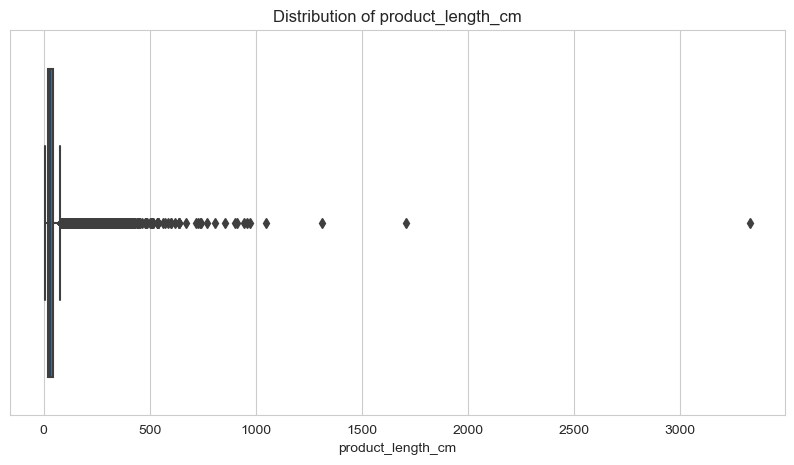

Skewness of product_height_cm: 14.363532976655083
Standard deviation of product_height_cm: 25.14433076248833


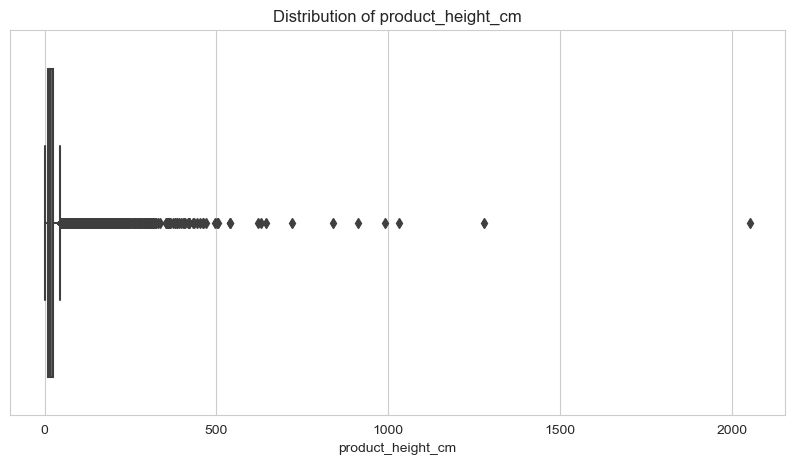

Skewness of product_width_cm: 16.360017338157533
Standard deviation of product_width_cm: 26.21512228384171


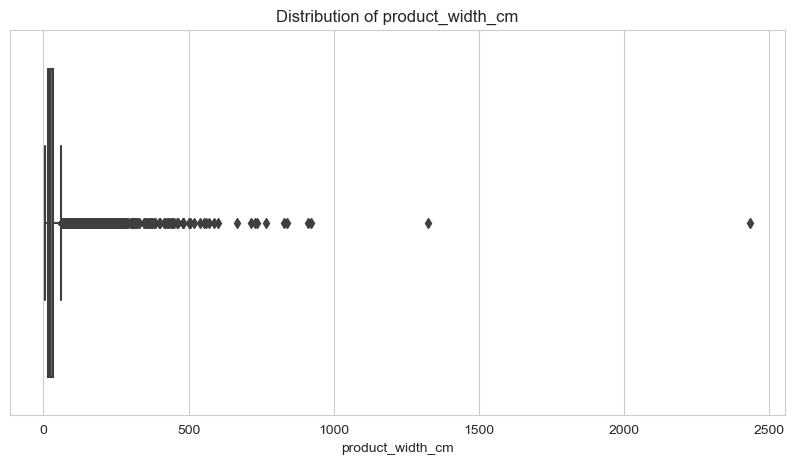

Skewness of geolocation_lat: 1.7812881274814432
Standard deviation of geolocation_lat: 5.686369524075173


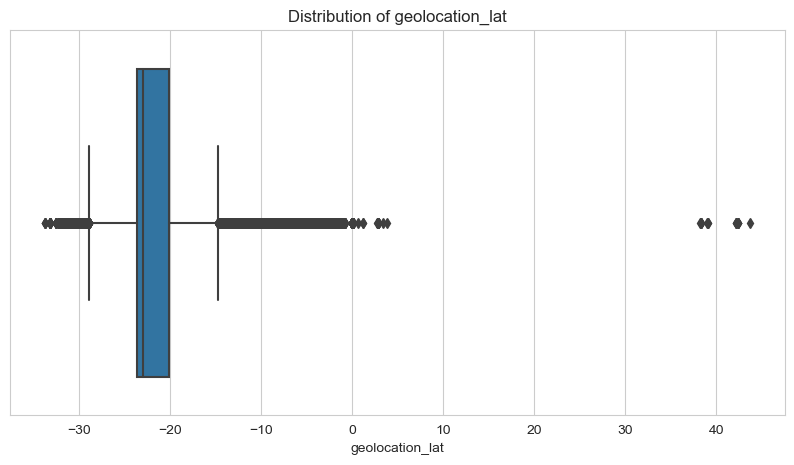

Skewness of geolocation_lng: 0.19474446706269963
Standard deviation of geolocation_lng: 4.097116263912021


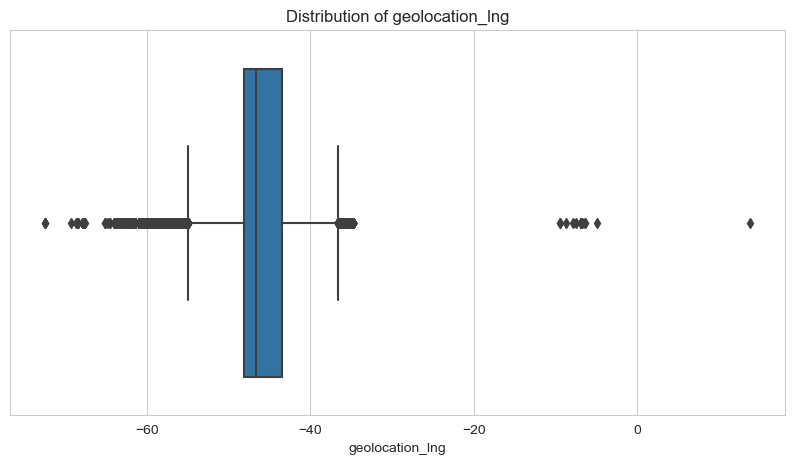

Skewness of payment_installments: 1.5981571643941768
Standard deviation of payment_installments: 2.7263229691909845


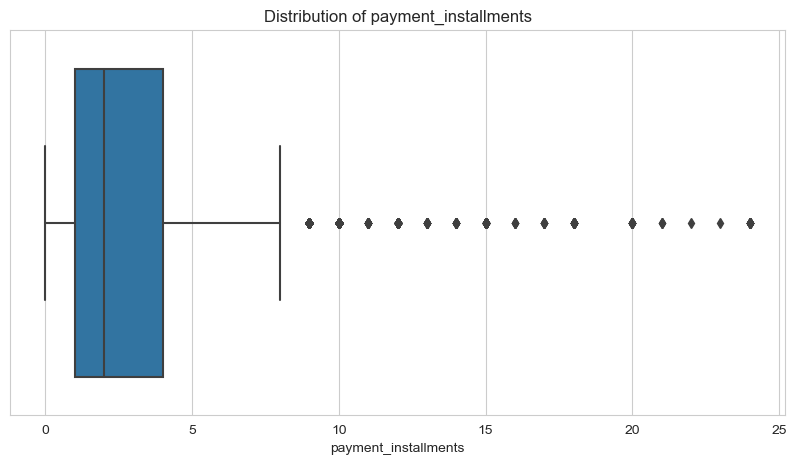

Skewness of payment_value: 70.58353211288973
Standard deviation of payment_value: 644.3298812264713


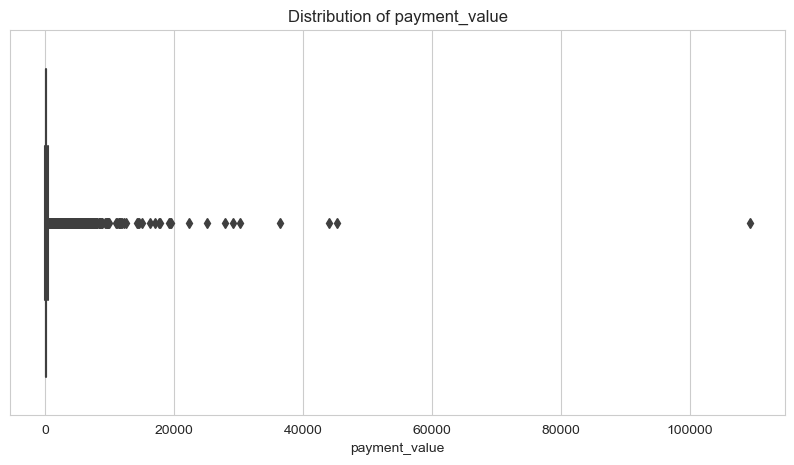

Skewness of review_score: -1.0703731376724537
Standard deviation of review_score: 1.5076977515098173


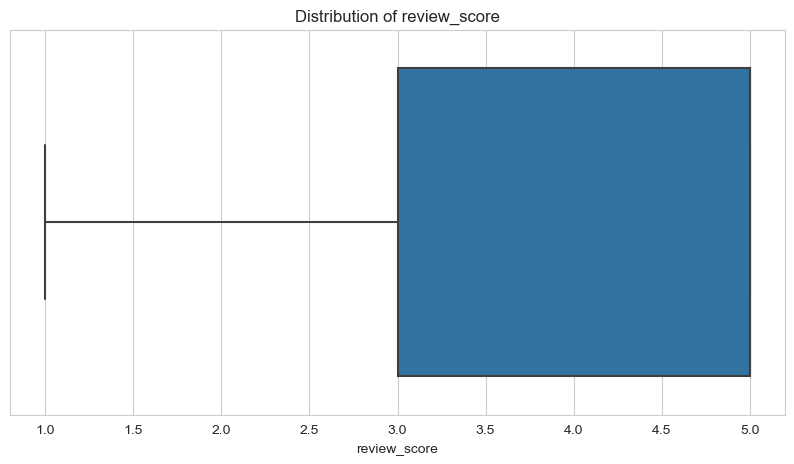

Skewness of Recency: 0.45152042399255654
Standard deviation of Recency: 152.59797957995303


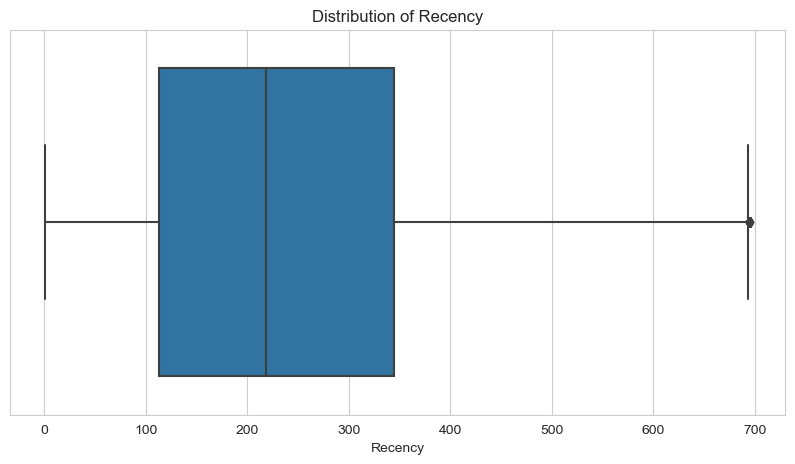

Skewness of Monetary: 70.58353211288973
Standard deviation of Monetary: 644.3298812264713


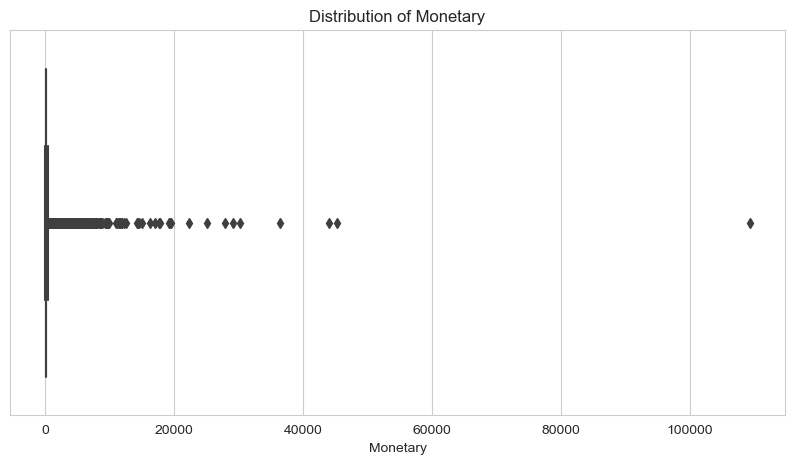

Skewness of Frequency: 10.585296256148329
Standard deviation of Frequency: 0.2068549724334724


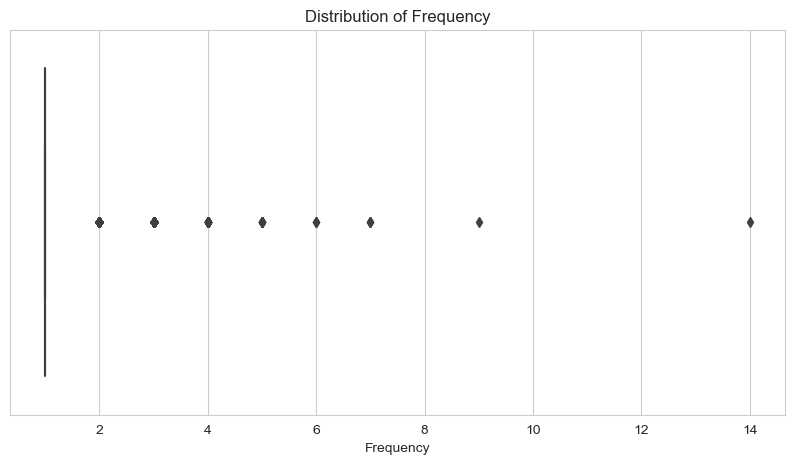

In [193]:
for col in final.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {final[col].skew()}')
    print(f'Standard deviation of {col}: {final[col].std()}')
    sns.boxplot(final[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [194]:
final.drop(columns = ['customer_zip_code_prefix', 'no_of_orders', 'no_of_products', 'Frequency'], axis = 1, inplace = True)

**Observations:**
1. Since the columns `no_of_orders`, `no_of_products` and `Frequency` has standard deviation almost equal to 0, we are dropping those columns, as it would not add value to the model building. 

In [195]:
final_outlierTreated = final.copy()

In [196]:
for i in final_outlierTreated.select_dtypes(include = np.number).columns:
    q1 = final_outlierTreated[i].quantile(0.25)
    q3 = final_outlierTreated[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    final_outlierTreated[i] = np.where(final_outlierTreated[i]>ul,ul,final_outlierTreated[i])
    final_outlierTreated[i] = np.where(final_outlierTreated[i]<ll,ll,final_outlierTreated[i])

Skewness of purchased_approved: 1.2274515783671078
Standard deviation of purchased_approved: 16313.727910202762


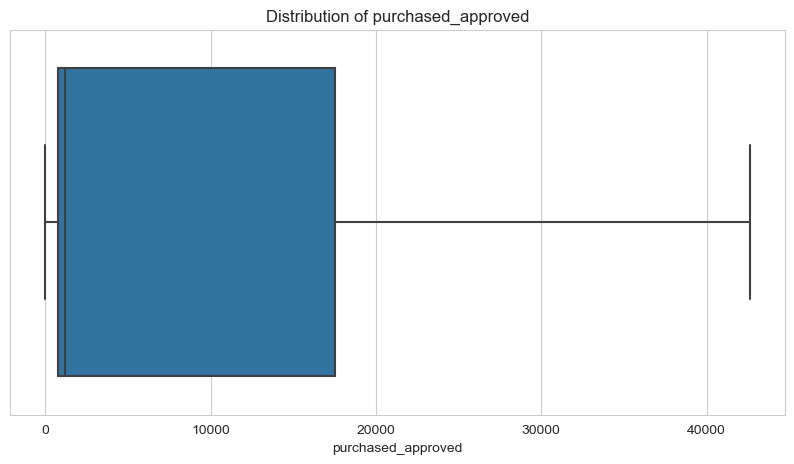

Skewness of delivered_estimated: -0.09961825084175056
Standard deviation of delivered_estimated: 8.270888724083651


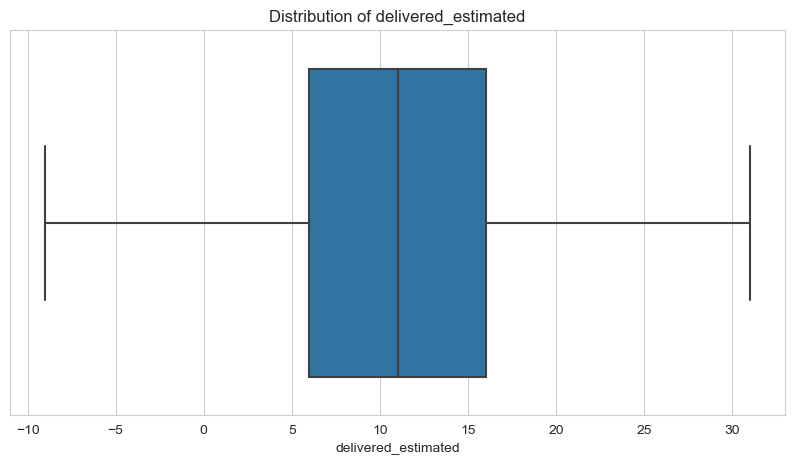

Skewness of purchased_delivered: 0.8832823458798826
Standard deviation of purchased_delivered: 7.107649056324948


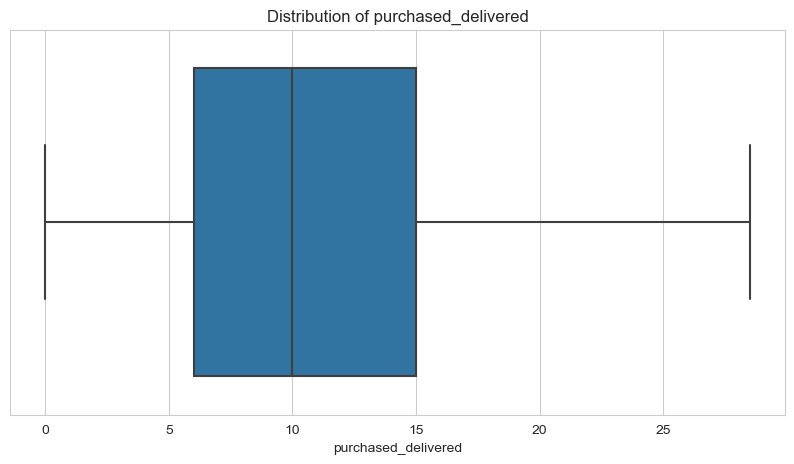

Skewness of price: 1.0632847039416682
Standard deviation of price: 92.1464581851578


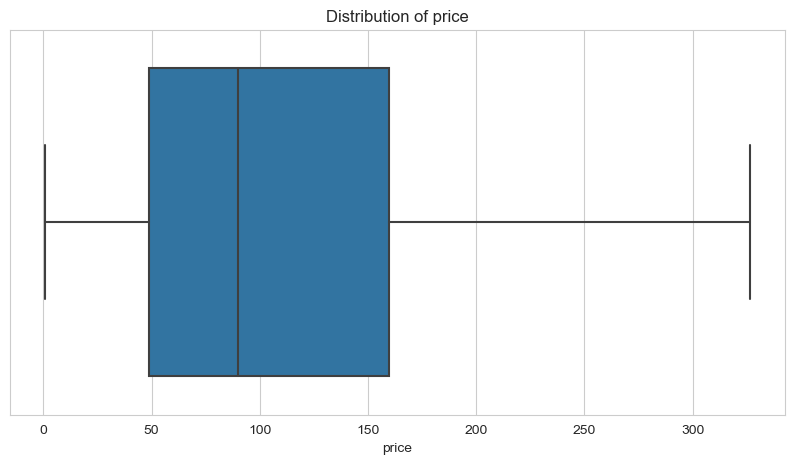

Skewness of freight_value: 0.9841075900240293
Standard deviation of freight_value: 11.122901836831927


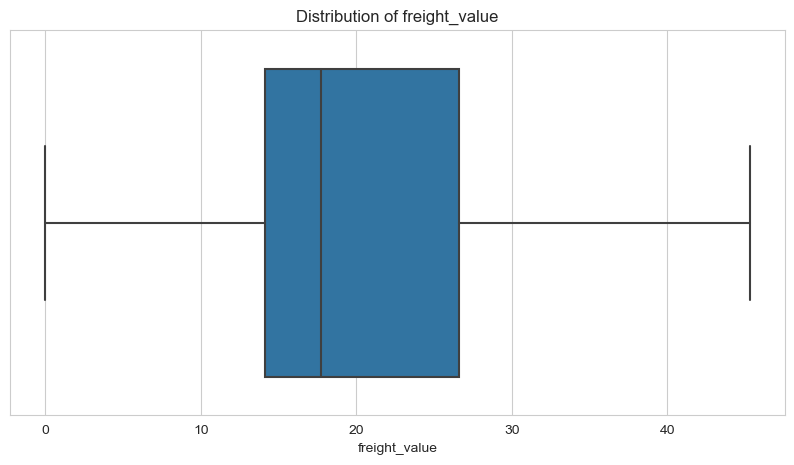

Skewness of product_weight_g: 1.1834365064819088
Standard deviation of product_weight_g: 1761.53569635261


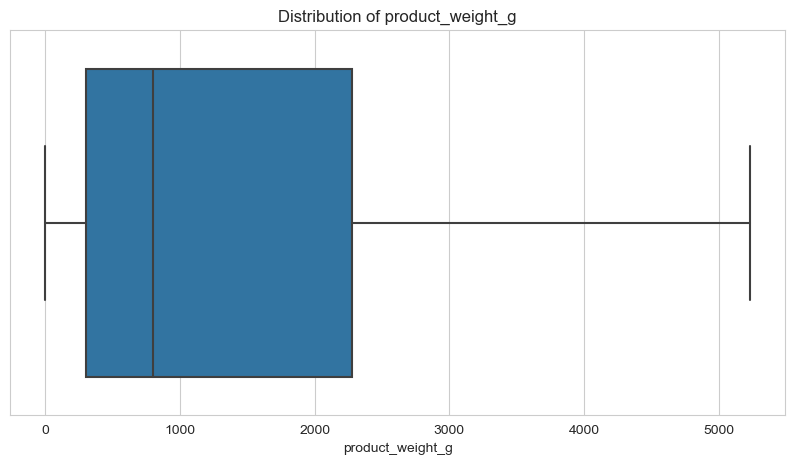

Skewness of product_length_cm: 1.0926138152729885
Standard deviation of product_length_cm: 18.787598001686344


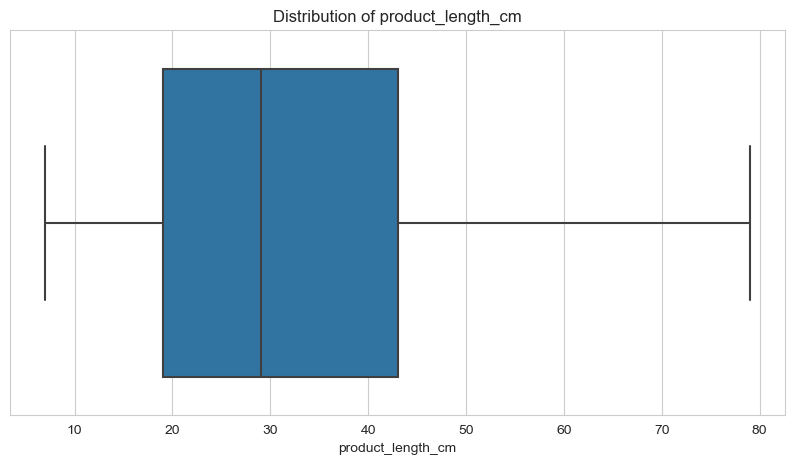

Skewness of product_height_cm: 0.983482557761645
Standard deviation of product_height_cm: 12.618137138146759


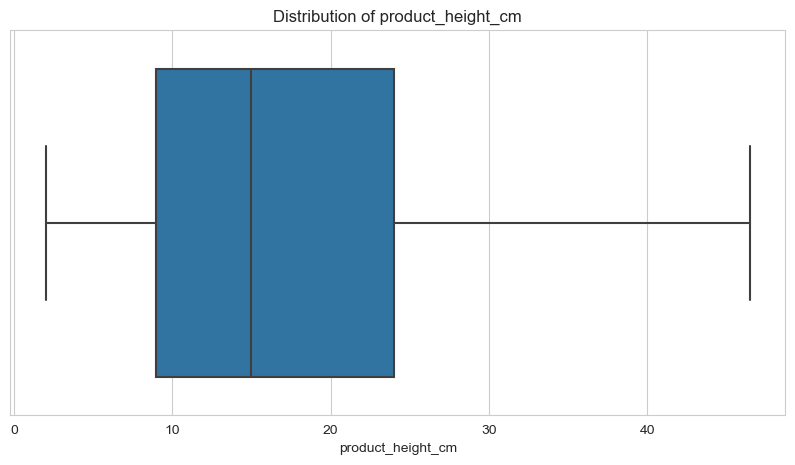

Skewness of product_width_cm: 1.1252579700635255
Standard deviation of product_width_cm: 14.45907540545604


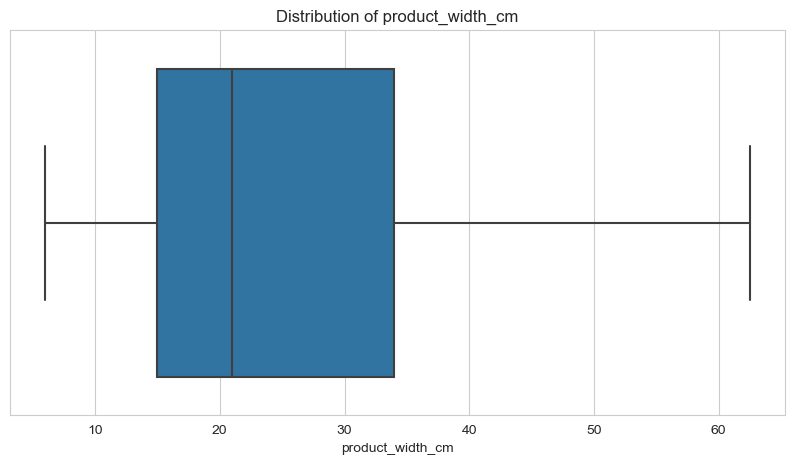

Skewness of geolocation_lat: 0.5304662439811726
Standard deviation of geolocation_lat: 3.674878785083487


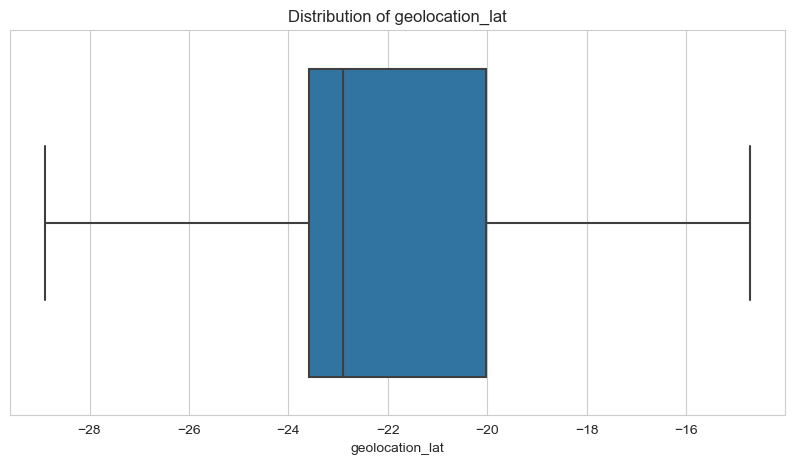

Skewness of geolocation_lng: 0.2799052282443094
Standard deviation of geolocation_lng: 3.8003889392099057


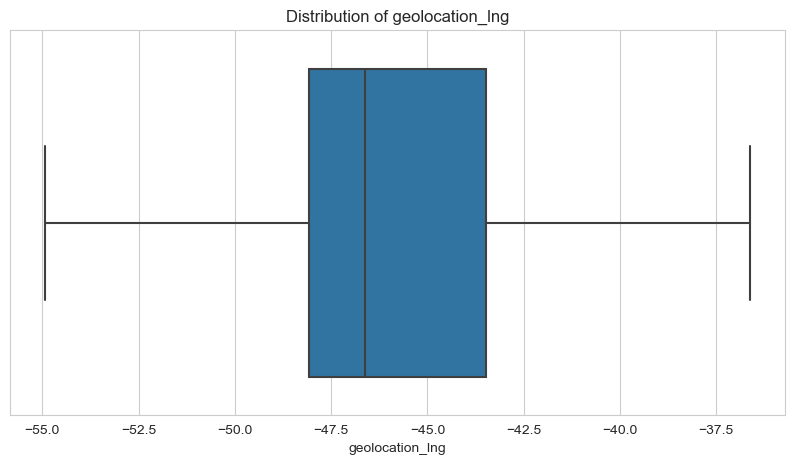

Skewness of payment_installments: 1.2125695044896538
Standard deviation of payment_installments: 2.438690177644189


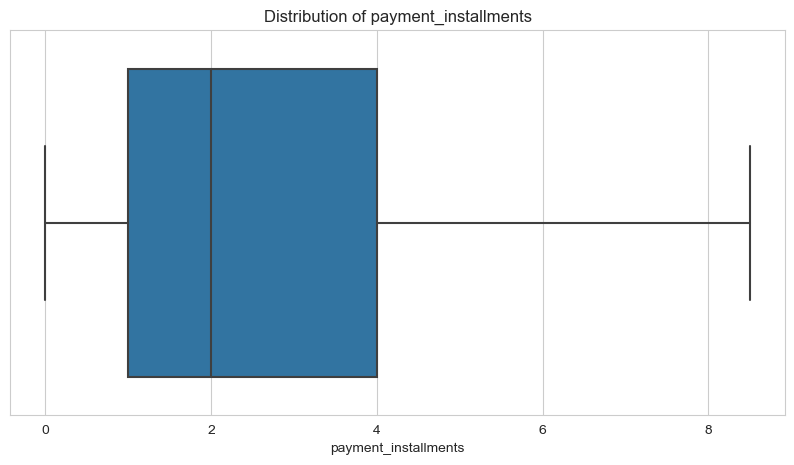

Skewness of payment_value: 1.0931281451957815
Standard deviation of payment_value: 117.07072474553797


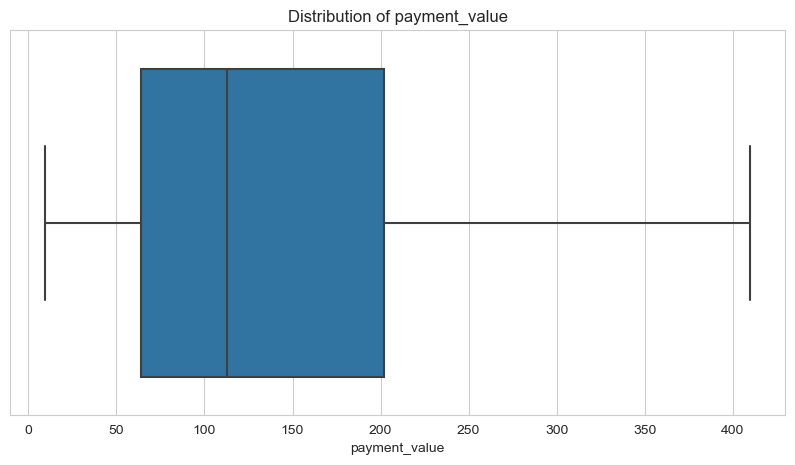

Skewness of review_score: -1.0703731376724537
Standard deviation of review_score: 1.5076977515098173


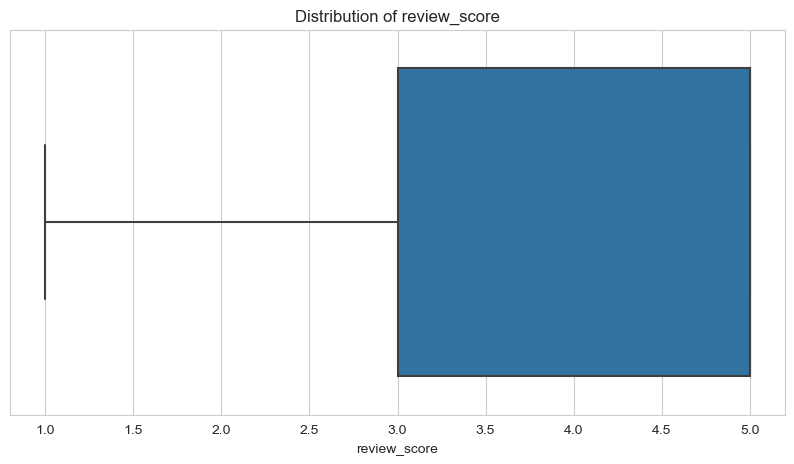

Skewness of Recency: 0.45142701527588064
Standard deviation of Recency: 152.59582770627875


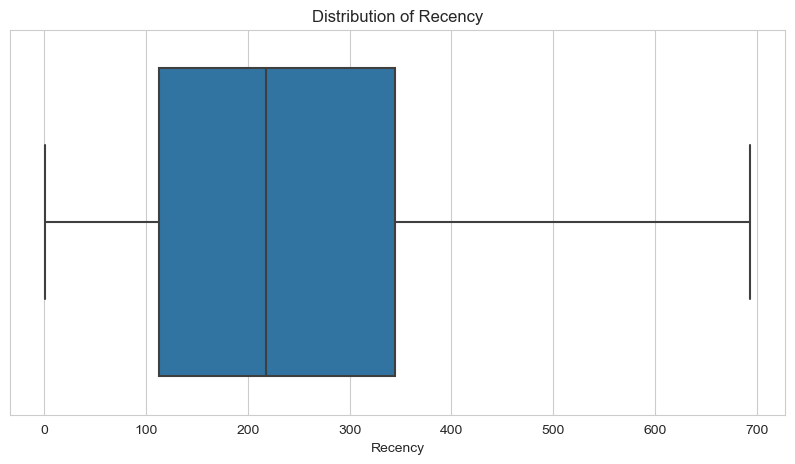

Skewness of Monetary: 1.0931281451957815
Standard deviation of Monetary: 117.07072474553797


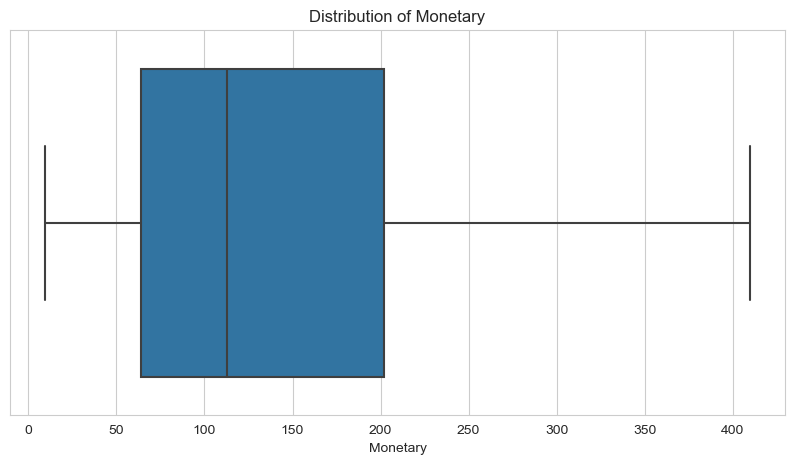

In [197]:
for col in final_outlierTreated.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {final_outlierTreated[col].skew()}')
    print(f'Standard deviation of {col}: {final_outlierTreated[col].std()}')
    sns.boxplot(final_outlierTreated[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [198]:
final_outlierTreated.shape

(91813, 21)

<a id="miss"></a>
## Missing Value Treatement

In [199]:
final_outlierTreated.isna().sum() / len(final) * 100

customer_unique_id       0.000000
customer_city            0.000000
customer_state           0.000000
purchased_approved       0.000000
delivered_estimated      0.000000
purchased_delivered      0.000000
price                    0.000000
freight_value            0.000000
product_weight_g         0.000000
product_length_cm        0.000000
product_height_cm        0.000000
product_width_cm         0.000000
geolocation_lat          0.000000
geolocation_lng          0.000000
payment_type             0.000000
payment_installments     0.000000
payment_value            0.000000
review_score            89.858735
Recency                  0.000000
Monetary                 0.000000
Churn                    0.000000
dtype: float64

In [200]:
final_outlierTreated.drop(columns = ['review_score'], axis = 1, inplace = True)

**Observation:**
1. Since more than 85% of values are missing in the `review_score` feature, we are dropping the column. 

<a id="edafinal"></a>
## Exploratory Data Analysis

### Uni-Variate Analysis

**Observations:**
1. Target variable is balanced. So we do not require upsampling of the data using SMOTE. 

**Observations**
1. Except for delivered_estimated and Recency, all other features are highly skewed. 

### Bivariate Numerical Vs. Categorical

**Observations**
1. The mean of all the features for both Churn and not Churn remain more or less the same. 
2. Only for the recency feature, the mean is different. Customers who have churned are very late or their recency is not small. Customers who have not churned has a recency smaller compared to those churned. 

### Multivariate Analysis

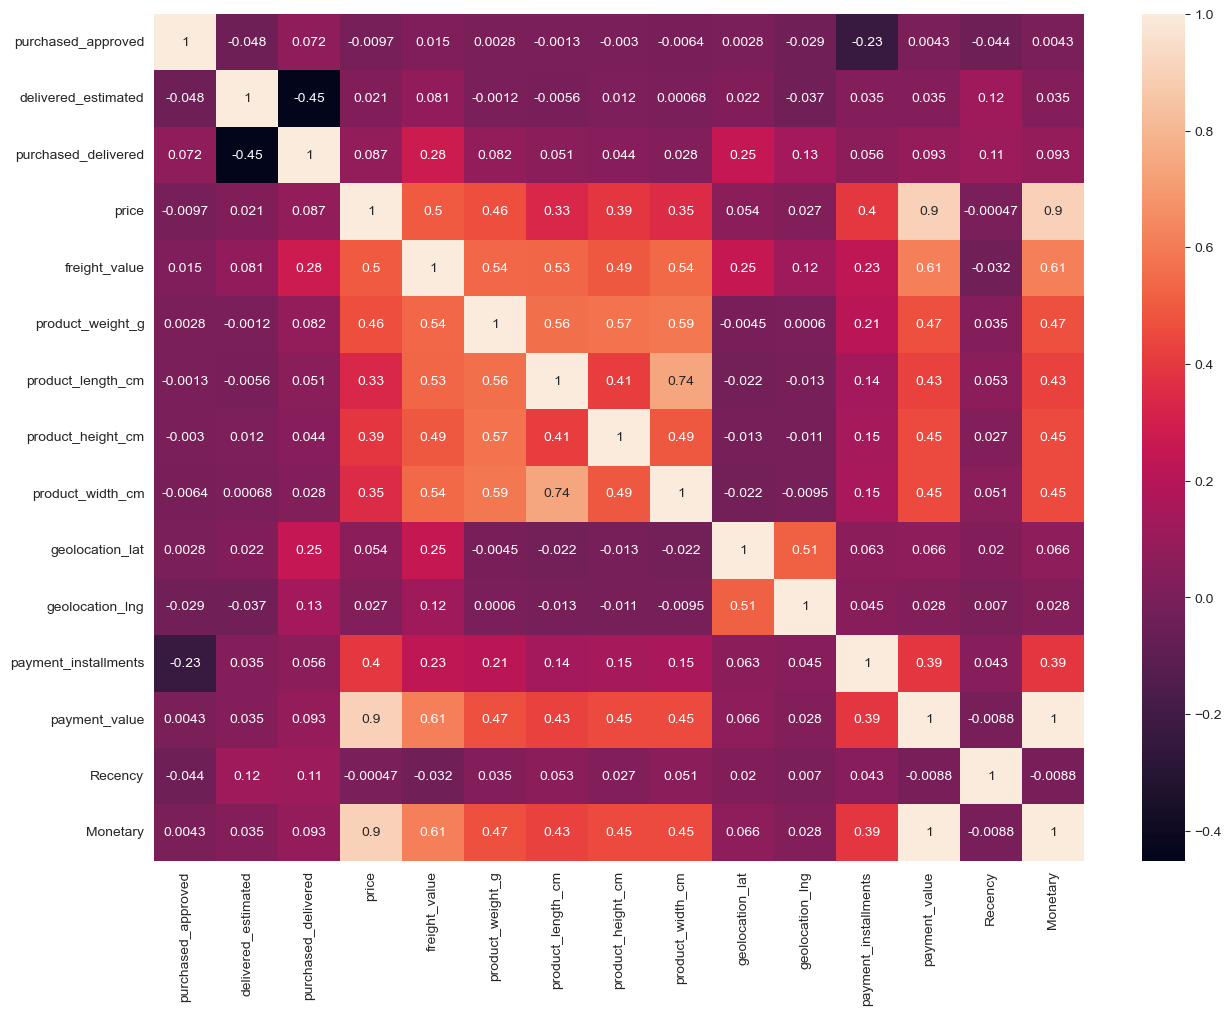

In [201]:
plt.figure(figsize=(15,11))
sns.heatmap(final_outlierTreated.corr(), annot = True)
plt.show()

<a id="stats"></a>
## Statistical Tests

### Statistical test for categorical and categorical variables 
#### Chi-Squared test for Independence
**Hypothesis**<br><br>
**Null Hypothesis, H0: Variables are independent**<br>
**Alternate Hypothesis, Ha: Variables are dependent**

In [202]:
def cat_cat(variable):
    dependent_variables = []
    independent_variables = []
    for var in variable:
        print(f'{var} and Churn')
        observed = pd.crosstab(final_outlierTreated[var], final_outlierTreated.Churn)
        chi_stats, pval, dof, expected = stats.chi2_contingency(observed)
        print('test statistics: ', chi_stats)
        print('p - value: ', pval)
        print('degrees of freedom: ', dof)
        if pval < 0.05:
            print(f'Reject Null Hypothesis. \nThe variables {var} and target variable, Churn are dependent.\n')
            dependent_variables.append(var)
        else:
            print(f'Failed to reject Null Hypothesis. \nThe variables {var} and target variable, Churn are independent.\n')
            independent_variables.append(var)
    print('Dependent variables: ', dependent_variables)
    print('Independent variables: ', independent_variables)
        
variable = ['customer_state', 'payment_type', 'payment_installments', 'customer_city']
cat_cat(variable)

customer_state and Churn
test statistics:  349.30634157644846
p - value:  2.544438479372205e-58
degrees of freedom:  26
Reject Null Hypothesis. 
The variables customer_state and target variable, Churn are dependent.

payment_type and Churn
test statistics:  280.58076711074347
p - value:  1.5855108511588307e-60
degrees of freedom:  3
Reject Null Hypothesis. 
The variables payment_type and target variable, Churn are dependent.

payment_installments and Churn
test statistics:  482.7901303228205
p - value:  2.777644545195786e-98
degrees of freedom:  9
Reject Null Hypothesis. 
The variables payment_installments and target variable, Churn are dependent.

customer_city and Churn
test statistics:  4518.320912345529
p - value:  7.516583234017529e-08
degrees of freedom:  4029
Reject Null Hypothesis. 
The variables customer_city and target variable, Churn are dependent.

Dependent variables:  ['customer_state', 'payment_type', 'payment_installments', 'customer_city']
Independent variables:  []


### Statistical test for categorical and numerical variables 
#### ANOVA test for Independence
**Hypothesis**<br><br>
**Null Hypothesis, H0: Variables are not correlated with each other**<br>
**Alternate Hypothesis, Ha: Variables are correlated with each other**

In [203]:
def num_cat(variable):
    correlated_variables = []
    noncorrelated_variables = []
    for var in variable:
        print(f'{var} Vs. target variable, Churn')
        churn = final[final.Churn == 1][var]
        not_churn = final[final.Churn == 0][var]
        test_stats, churn_pval = stats.shapiro(churn)
        test_stats, notchurn_pval = stats.shapiro(not_churn)
        if churn_pval < 0.05:
            print(f'churn of {var} is not normal')
        else: 
            print(f'churn of {var} is normal')
        if notchurn_pval < 0.05:
            print(f'not churn of {var} is not normal')
        else: 
            print(f'not churn of {var} is normal')
        levene_teststats, pval_levene = stats.levene(churn, not_churn)
        if pval_levene < 0.05:
            print(f'atleast one variance is not equal')
        else: 
            print(f'all variances are equal')
        anova_teststats, pval_anova = stats.f_oneway(churn, not_churn)
        if pval_anova < 0.05:
            print(f'Reject Null Hypothesis. \nThe variables {var} and target variable, Churn are correlated with each other.\n')
            correlated_variables.append(var)
        else:
            print(f'Failed to reject Null Hypothesis. \nThe variables {var} and target variable, Churn are not correlated with each other.\n')
            noncorrelated_variables.append(var)
            
    print('Correlated variables: ', correlated_variables)
    print('Non-correlated variables: ', noncorrelated_variables)

            
variable = ['purchased_approved', 'delivered_estimated', 'purchased_delivered', 'price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'Recency', 'Monetary']
num_cat(variable)

purchased_approved Vs. target variable, Churn
churn of purchased_approved is not normal
not churn of purchased_approved is not normal
atleast one variance is not equal
Reject Null Hypothesis. 
The variables purchased_approved and target variable, Churn are correlated with each other.

delivered_estimated Vs. target variable, Churn
churn of delivered_estimated is not normal
not churn of delivered_estimated is not normal
atleast one variance is not equal
Reject Null Hypothesis. 
The variables delivered_estimated and target variable, Churn are correlated with each other.

purchased_delivered Vs. target variable, Churn
churn of purchased_delivered is not normal
not churn of purchased_delivered is not normal
atleast one variance is not equal
Reject Null Hypothesis. 
The variables purchased_delivered and target variable, Churn are correlated with each other.

price Vs. target variable, Churn
churn of price is not normal
not churn of price is not normal
all variances are equal
Failed to rejec

In [204]:
def non_parametric_tests(variable):
    correlated_variables = []
    noncorrelated_variables = []
    for var in variable:
        test_stats, pval = stats.mannwhitneyu(final_outlierTreated[final_outlierTreated.Churn == 1][var], final_outlierTreated[final_outlierTreated.Churn == 0][var])
        if pval < 0.05:
            print(f'Reject Null Hypothesis. \nThe variables {var} and target variable, Churn are correlated with each other.\n')
            correlated_variables.append(var)
        else:
            print(f'Failed to reject Null Hypothesis. \nThe variables {var} and target variable, Churn are not correlated with each other.\n')
            noncorrelated_variables.append(var)
    print(f'Correlated variables: ', correlated_variables)
    print(f'Non correlated variables: ', noncorrelated_variables)
        
variable = ['purchased_approved', 'delivered_estimated', 'purchased_delivered', 'price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'Recency', 'Monetary']
non_parametric_tests(variable)

Reject Null Hypothesis. 
The variables purchased_approved and target variable, Churn are correlated with each other.

Reject Null Hypothesis. 
The variables delivered_estimated and target variable, Churn are correlated with each other.

Reject Null Hypothesis. 
The variables purchased_delivered and target variable, Churn are correlated with each other.

Failed to reject Null Hypothesis. 
The variables price and target variable, Churn are not correlated with each other.

Reject Null Hypothesis. 
The variables freight_value and target variable, Churn are correlated with each other.

Reject Null Hypothesis. 
The variables product_weight_g and target variable, Churn are correlated with each other.

Reject Null Hypothesis. 
The variables product_length_cm and target variable, Churn are correlated with each other.

Reject Null Hypothesis. 
The variables product_height_cm and target variable, Churn are correlated with each other.

Reject Null Hypothesis. 
The variables product_width_cm and ta

<a id="trans"></a>
## Transformation of Data

In [205]:
transformed_data = final_outlierTreated.copy()
transformed_data['Churn'] = transformed_data['Churn'].astype('object')

In [206]:
transformed_data.skew()

purchased_approved      1.227452
delivered_estimated    -0.099618
purchased_delivered     0.883282
price                   1.063285
freight_value           0.984108
product_weight_g        1.183437
product_length_cm       1.092614
product_height_cm       0.983483
product_width_cm        1.125258
geolocation_lat         0.530466
geolocation_lng         0.279905
payment_installments    1.212570
payment_value           1.093128
Recency                 0.451427
Monetary                1.093128
Churn                   0.187881
dtype: float64

In [207]:
pt = PowerTransformer()
for var in transformed_data:
    if var in ['delivered_estimated','geolocation_lat','geolocation_lng']:
        transformed_data[var] = pt.fit_transform(transformed_data[[var]])

In [208]:
transformed_data.skew()

purchased_approved      1.227452
delivered_estimated     0.102399
purchased_delivered     0.883282
price                   1.063285
freight_value           0.984108
product_weight_g        1.183437
product_length_cm       1.092614
product_height_cm       0.983483
product_width_cm        1.125258
geolocation_lat         0.032724
geolocation_lng        -0.013289
payment_installments    1.212570
payment_value           1.093128
Recency                 0.451427
Monetary                1.093128
Churn                   0.187881
dtype: float64

In [209]:
pt = PowerTransformer(method='box-cox')
for var in transformed_data.select_dtypes(include=np.number):
    if var not in ['delivered_estimated','geolocation_lat','geolocation_lng']:
        transformed_data[var] = pt.fit_transform(0.001 + transformed_data[[var]])

In [210]:
transformed_data.skew()

purchased_approved      0.131016
delivered_estimated     0.102399
purchased_delivered    -0.024187
price                  -0.029732
freight_value           0.177033
product_weight_g       -0.004242
product_length_cm       0.102077
product_height_cm      -0.033945
product_width_cm        0.070383
geolocation_lat         0.032724
geolocation_lng        -0.013289
payment_installments   -0.311447
payment_value          -0.000310
Recency                -0.159233
Monetary               -0.000310
Churn                   0.187881
dtype: float64

<a id="class"></a>
## Classification Model

In [211]:
transformed_data.head(1)

customer_unique_id customer_city customer_state  \
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar             SP   

   purchased_approved  delivered_estimated  purchased_delivered     price  \
0           -0.589107            -0.872307            -0.715772  0.452749   

   freight_value  product_weight_g  product_length_cm  product_height_cm  \
0       -0.86895          0.462624           0.380076            -0.9127   

   product_width_cm  geolocation_lat  geolocation_lng payment_type  \
0          0.712408        -0.338695        -0.147041  credit_card   

   payment_installments  payment_value   Recency  Monetary Churn  
0              1.610244        0.27855 -0.731367   0.27855     0

In [212]:
def state_encoding(state):
    if state in ['RS', 'SC', 'PR']:
        return 'southern'
    elif state in ['SP', 'RJ', 'MG', 'ES']:
        return 'southeastern'
    elif state in ['MT', 'MS', 'GO', 'DF']:
        return 'centralwestern'
    elif state in ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']:
        return 'northeastern'
    else: 
        return 'northern'

In [213]:
transformed_data['customer_state'] = transformed_data['customer_state'].apply(state_encoding)

In [214]:
features = transformed_data.copy()
features.head()

customer_unique_id customer_city customer_state  \
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar   southeastern   
1  0000b849f77a49e4a4ce2b2a4ca5be3f        osasco   southeastern   
2  0000f46a3911fa3c0805444483337064      sao jose       southern   
3  0000f6ccb0745a6a4b88665a16c9f078         belem       northern   
4  0004aac84e0df4da2b147fca70cf8255      sorocaba   southeastern   

   purchased_approved  delivered_estimated  purchased_delivered     price  \
0           -0.589107            -0.872307            -0.715772  0.452749   
1            1.251806            -0.872307            -1.506279 -1.663911   
2           -3.573287            -1.220039             1.615248 -0.307838   
3           -0.464177            -0.021842             1.174156 -1.353452   
4           -0.428822            -0.512583             0.409752  0.872895   

   freight_value  product_weight_g  product_length_cm  product_height_cm  \
0      -0.868950          0.462624           0.380076          -0.912700   
1      -1.408249         -0.677817          -0.166058          -0.382605   
2      -0.259437          0.462624          -0.252291           1.751600   
3      -0.216588         -1.409914          -0.905970          -1.271429   
4      -0.294373          1.525191          -1.363941          -1.763282   

   product_width_cm  geolocation_lat  geolocation_lng payment_type  \
0          0.712408        -0.338695        -0.147041  credit_card   
1         -0.427272        -0.403281        -0.135824  credit_card   
2          0.867884        -1.740208        -0.641281  credit_card   
3         -1.629357         1.763267        -0.601404  credit_card   
4         -1.629357        -0.388422        -0.320930  credit_card   

   payment_installments  payment_value   Recency  Monetary Churn  
0              1.610244       0.278550 -0.731367  0.278550     0  
1             -0.928309      -1.841310 -0.705650 -1.841310     0  
2              1.610244      -0.361197  1.654622 -0.361197     1  
3              0.912107      -1.235398  0.643557 -1.235398     1  
4              1.335787       0.699360  0.464106  0.699360     1

In [215]:
features.std()

purchased_approved      1.000005
delivered_estimated     1.000005
purchased_delivered     1.000005
price                   1.000005
freight_value           1.000005
product_weight_g        1.000005
product_length_cm       1.000005
product_height_cm       1.000005
product_width_cm        1.000005
geolocation_lat         1.000005
geolocation_lng         1.000005
payment_installments    1.000005
payment_value           1.000005
Recency                 1.000005
Monetary                1.000005
Churn                   0.497811
dtype: float64

In [216]:
features.drop(columns = ['customer_unique_id', 'customer_city', 'payment_value'], axis = 1, inplace = True)

In [217]:
features.head(1)

customer_state  purchased_approved  delivered_estimated  \
0   southeastern           -0.589107            -0.872307   

   purchased_delivered     price  freight_value  product_weight_g  \
0            -0.715772  0.452749       -0.86895          0.462624   

   product_length_cm  product_height_cm  product_width_cm  geolocation_lat  \
0           0.380076            -0.9127          0.712408        -0.338695   

   geolocation_lng payment_type  payment_installments   Recency  Monetary  \
0        -0.147041  credit_card              1.610244 -0.731367   0.27855   

  Churn  
0     0

In [218]:
independent = features.drop(columns = ['Churn'], axis = 1)
df_numeric = independent.select_dtypes(include = np.number)
df_categorical = independent.select_dtypes(exclude = np.number)
df_target = features['Churn'].astype('int')

In [219]:
encoded_data = pd.get_dummies(df_categorical, drop_first = True)

In [220]:
X = pd.concat([df_numeric, encoded_data], axis = 1)
X.drop(columns = ['Recency'], axis = 1, inplace = True)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 680, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (73450, 20)
y_train (73450,)
X_test (18363, 20)
y_test (18363,)


#### Statistically proving train & test are good representations of overall data <br>
* A ttest independence need to be done on each column to show both have similar representations.
* Null Hypothesis : Both sets have same mean , thus have equal representation.
* Alternate Hypothesis : Both sets have unequal means , thus unequal representation.

In [222]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    True
dtype: bool

* As all the columns have pvalues greater than significance level of 0.05, we do not reject the null hypothesis and  we can conclude that all independent features are properly represented both in train and test sets.

<a id="model"></a>
## Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [223]:
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.656818
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                73450
Model:                          Logit   Df Residuals:                    73430
Method:                           MLE   Df Model:                           19
Date:                Fri, 07 Apr 2023   Pseudo R-squ.:                 0.04694
Time:                        12:47:56   Log-Likelihood:                -48243.
converged:                       True   LL-Null:                       -50620.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
purchased_approved             -0.4058      0.011    -38.263      0.000   

In [224]:
print('AIC:', logreg.aic)

AIC: 96526.60834140793


We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [225]:
logreg.params

purchased_approved            -0.405835
delivered_estimated            0.297133
purchased_delivered            0.377103
price                         -0.067562
freight_value                 -0.343480
product_weight_g               0.090042
product_length_cm              0.115955
product_height_cm              0.043078
product_width_cm               0.087253
geolocation_lat                0.126702
geolocation_lng               -0.046486
payment_installments           0.165773
Monetary                      -0.008952
customer_state_northeastern    0.493639
customer_state_northern        0.360754
customer_state_southeastern    0.525514
customer_state_southern        0.638856
payment_type_credit_card      -0.902331
payment_type_debit_card       -1.207441
payment_type_voucher          -0.402390
dtype: float64

In [226]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

Odds
purchased_approved           0.666420
delivered_estimated          1.345995
purchased_delivered          1.458055
price                        0.934670
freight_value                0.709298
product_weight_g             1.094220
product_length_cm            1.122946
product_height_cm            1.044020
product_width_cm             1.091173
geolocation_lat              1.135079
geolocation_lng              0.954578
payment_installments         1.180305
Monetary                     0.991088
customer_state_northeastern  1.638266
customer_state_northern      1.434410
customer_state_southeastern  1.691328
customer_state_southern      1.894312
payment_type_credit_card     0.405623
payment_type_debit_card      0.298961
payment_type_voucher         0.668720

**Interpretation:** 



**Predictions on train set**

In [227]:
y_pred_prob_train = logreg.predict(X_train)
y_pred_train = [ 0 if x < 0.5 else 1 for x in y_pred_prob_train]

**Do predictions on the test set.**

In [228]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

33259    0.451318
48871    0.432133
17839    0.565245
48029    0.386503
42414    0.458929
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [229]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[0, 0, 1, 0, 0]

#### Plot the confusion matrix.

In [230]:
type(y_pred)

list

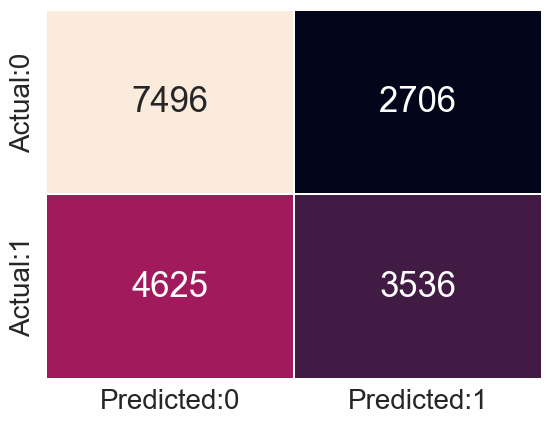

In [231]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [232]:
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     10202
           1       0.57      0.43      0.49      8161

    accuracy                           0.60     18363
   macro avg       0.59      0.58      0.58     18363
weighted avg       0.60      0.60      0.59     18363



**Interpretation:** 

From the above output, we can infer that the recall of the positive class is known as `sensitivity` and the recall of the negative class is `specificity`.

`support` is the number of observations in the corresponding class.

The `macro average` in the output is obtained by averaging the unweighted mean per label and the `weighted average` is given by averaging the support-weighted mean per label.

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [233]:
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.17208578836831034


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.5) is 0.189, we can say that there is very less agreement between the actual and predicted values.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

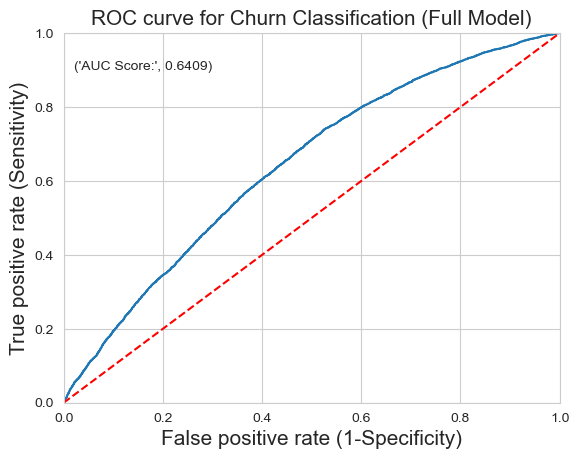

In [234]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Classification (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.999.

In [235]:
cols = ['test_accuracy', 'train_accuracy', 'test_precision', 'train_precision','test_recall','train_recall', 'test_kappa', 'train_kappa', 'f1_score','roc_auc_score']
model_evaluation = pd.DataFrame(columns=cols)
model_evaluation.loc['Logit_FullModel'] = [accuracy_score(y_test,y_pred), accuracy_score(y_train,y_pred_train),
                                          precision_score(y_test,y_pred), precision_score(y_train,y_pred_train),
                                          recall_score(y_test,y_pred), recall_score(y_train,y_pred_train),
                                          cohen_kappa_score(y_test,y_pred), cohen_kappa_score(y_train,y_pred_train),
                                          f1_score(y_test,y_pred), roc_auc_score(y_test,y_pred_prob)]
model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel       0.600773        0.606222        0.566485   

                 train_precision  test_recall  train_recall  test_kappa  \
Logit_FullModel         0.590736      0.43328      0.440721    0.172086   

                 train_kappa  f1_score  roc_auc_score  
Logit_FullModel     0.189292  0.491009       0.640911

<a id="cut_off"></a>
## Identify the Best Cut-off Value

**Tabulate the performance measures for different cut-offs.**

The performance measures that we obtained above, are for the cut_off = 0.5. Now, let us consider a list of values as cut-off and calculate the different performance measures.

In [236]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model, cutoff):
    y_pred_prob = logreg.predict(X_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [237]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for value in cutoff:
    update_score_card(logreg, value)

In [238]:
print('Score Card for Logistic regression:')
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


**Interpretation:** The above dataframe shows that, the model cut_off probability 0.5, returns the highest AUC score, f1-score, kappa score and accuracy.

#### In the above method, we passed the list of values for the cut-off. But, this method is not efficient as one can pass different values and obtain a cut-off based on the passed values.

#### To obtain the optimal cut-off value we use the following methods:

1. Youden's Index
2. Cost-based Method

<a id="youden"></a>
### Youden's Index

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [239]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

TPR       FPR  Threshold  Difference
0  0.740963  0.526759   0.412076    0.214204
1  0.740841  0.526661   0.412113    0.214179
2  0.740718  0.526563   0.412164    0.214155
3  0.740841  0.526759   0.412095    0.214081
4  0.740718  0.526661   0.412138    0.214057

As we can see that the optimal cut-off probability is approximately 0.437
. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.437, then consider it to be 0 else consider it to be 1.

In [240]:
y_pred_youden = [ 0 if x < 0.437 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

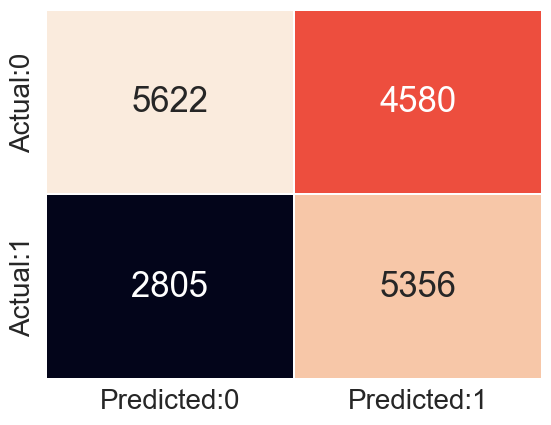

In [241]:
cm = confusion_matrix(y_test, y_pred_youden)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

**Compute various performance metrics.**

In [242]:
acc_table = classification_report(y_test, y_pred_youden)
print(acc_table)

              precision    recall  f1-score   support

           0       0.67      0.55      0.60     10202
           1       0.54      0.66      0.59      8161

    accuracy                           0.60     18363
   macro avg       0.60      0.60      0.60     18363
weighted avg       0.61      0.60      0.60     18363



**Interpretation:** From the above output, we can see that the model with cut-off = 0.437, is 60% accurate. The specificity and the sensitivity are nearly balanced.

In [243]:
kappa = cohen_kappa_score(y_test, y_pred_youden)
print('kappa value:',kappa)

kappa value: 0.20294522589094788


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.437) is 0.20, we can say that there is very less agreement between the actual and predicted values.

<a id="cost"></a>
### Cost-based Method

The full logistic regression model (build in section 3), have different values for false positives (FP) and false negatives (FN). Thus, we can use the cost-based method to calculate the optimal value of the cut-off. In this method, we find the optimal value of the cut-off for which the total cost is minimum. The total cost is given by the formula:

<p style='text-indent:25em'> <strong>total_cost = FN x C_1 + FP x C_2 </strong> </p>

Where,<br>
C_1: It is the cost of false negatives <br>
C_2: It is the cost of false positives

The cost values can be decided using business knowledge.

In [244]:
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):
    cm = confusion_matrix(actual_value, predicted_value)     
    cm_array = np.array(cm)
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP


df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])
i = 0
for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3.5, 2) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    i += 1

In [245]:
df_total_cost.sort_values('total_cost', ascending = True).head(10)

cut-off  total_cost
29     0.39     17957.5
27     0.37     17998.0
28     0.38     18008.0
26     0.36     18024.5
25     0.35     18089.0
30     0.40     18101.5
31     0.41     18167.0
24     0.34     18238.0
23     0.33     18407.0
32     0.42     18408.5

Here, we are considering the cut-off value as 0.38. i.e. if 'y_pred_prob' is less than 0.38, then consider it to be 0 else consider it to be 1.

In [246]:
y_pred_cost = [ 0 if x < 0.39 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

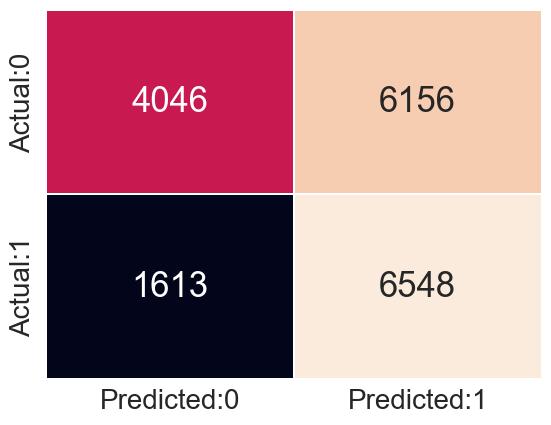

In [247]:
cm = confusion_matrix(y_test, y_pred_cost)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

**Compute various performance metrics.**

In [248]:
acc_table = classification_report(y_test, y_pred_cost)
print(acc_table)

              precision    recall  f1-score   support

           0       0.71      0.40      0.51     10202
           1       0.52      0.80      0.63      8161

    accuracy                           0.58     18363
   macro avg       0.62      0.60      0.57     18363
weighted avg       0.63      0.58      0.56     18363



**Interpretation:** From the above output, we can see that the model with cut-off = 0.46 is 98% accurate. 

In [249]:
kappa = cohen_kappa_score(y_test, y_pred_cost)
print('kappa value:',kappa)

kappa value: 0.18844809485482528


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.46) is 0.95, we can say that there is substantial agreement between the actual and predicted values.

In [250]:
model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel       0.600773        0.606222        0.566485   

                 train_precision  test_recall  train_recall  test_kappa  \
Logit_FullModel         0.590736      0.43328      0.440721    0.172086   

                 train_kappa  f1_score  roc_auc_score  
Logit_FullModel     0.189292  0.491009       0.640911

## Decision Tree model

In [251]:
xtrain_dt, xtest_dt, ytrain_dt, ytest_dt = train_test_split(X, df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_dt.shape)
print('ytrain: ', ytrain_dt.shape)
print('xtest: ', xtest_dt.shape)
print('ytest: ', ytest_dt.shape)

xtrain:  (73450, 20)
ytrain:  (73450,)
xtest:  (18363, 20)
ytest:  (18363,)


In [252]:
decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(xtrain_dt, ytrain_dt)

In [253]:
ypred_proba_dt = decisionTree.predict(xtest_dt)

In [254]:
ypred_dt = [0 if i < 0.437 else 1 for i in ypred_proba_dt]
ypred_dt[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0]

In [255]:
ypred_proba_dt_train = decisionTree.predict(xtrain_dt)
ypred_dt_train = [0 if i < 0.437 else 1 for i in ypred_proba_dt_train]

In [256]:
confusion_dt = confusion_matrix(ytest_dt, ypred_dt)
print('Confusion Matrix: ', confusion_dt)

Confusion Matrix:  [[7079 3123]
 [3017 5144]]


In [257]:
print(classification_report(ytest_dt, ypred_dt))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     10202
           1       0.62      0.63      0.63      8161

    accuracy                           0.67     18363
   macro avg       0.66      0.66      0.66     18363
weighted avg       0.67      0.67      0.67     18363



In [258]:
model_evaluation.loc['DecisionTree'] = [accuracy_score(ytest_dt, ypred_dt), accuracy_score(ytrain_dt, ypred_dt_train),
                                          precision_score(ytest_dt, ypred_dt), precision_score(ytrain_dt, ypred_dt_train),
                                          recall_score(ytest_dt, ypred_dt), recall_score(ytrain_dt, ypred_dt_train),
                                          cohen_kappa_score(ytest_dt, ypred_dt), cohen_kappa_score(ytrain_dt, ypred_dt_train),
                                          f1_score(ytest_dt, ypred_dt), roc_auc_score(ytest_dt, ypred_proba_dt)]
model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel       0.600773        0.606222        0.566485   
DecisionTree          0.665632        1.000000        0.622233   

                 train_precision  test_recall  train_recall  test_kappa  \
Logit_FullModel         0.590736     0.433280      0.440721    0.172086   
DecisionTree            1.000000     0.630315      1.000000    0.323778   

                 train_kappa  f1_score  roc_auc_score  
Logit_FullModel     0.189292  0.491009       0.640911  
DecisionTree        1.000000  0.626248       0.662099

## XG Boost Model

In [259]:
xtrain_xg, xtest_xg, ytrain_xg, ytest_xg = train_test_split(X, df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_xg.shape)
print('ytrain: ', ytrain_xg.shape)
print('xtest: ', xtest_xg.shape)
print('ytest: ', ytest_xg.shape)

xtrain:  (73450, 20)
ytrain:  (73450,)
xtest:  (18363, 20)
ytest:  (18363,)


In [260]:
xgBoost = XGBClassifier()
xbBoost = xgBoost.fit(xtrain_xg, ytrain_xg)

In [261]:
ypred_proba_xg = xgBoost.predict(xtest_xg)

In [262]:
ypred_xg = [0 if i < 0.437 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

[0, 0, 1, 0, 1, 1, 0, 0, 1, 0]

In [263]:
ypred_proba_xg_train = xgBoost.predict(xtrain_xg)
ypred_xg_train = [0 if i < 0.437 else 1 for i in ypred_proba_xg_train]

In [264]:
confusion_xg = confusion_matrix(ytest_xg, ypred_xg)
print('Confusion Matrix: ', confusion_xg)

Confusion Matrix:  [[7997 2205]
 [1906 6255]]


In [265]:
print(classification_report(ytest_xg, ypred_xg))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     10202
           1       0.74      0.77      0.75      8161

    accuracy                           0.78     18363
   macro avg       0.77      0.78      0.77     18363
weighted avg       0.78      0.78      0.78     18363



In [266]:
model_evaluation.loc['XGBoost'] = [accuracy_score(ytest_xg, ypred_xg), accuracy_score(ytrain_xg, ypred_xg_train),
                                          precision_score(ytest_xg, ypred_xg), precision_score(ytrain_xg, ypred_xg_train),
                                          recall_score(ytest_xg, ypred_xg), recall_score(ytrain_xg, ypred_xg_train),
                                          cohen_kappa_score(ytest_xg, ypred_xg), cohen_kappa_score(ytrain_xg, ypred_xg_train),
                                          f1_score(ytest_xg, ypred_xg), roc_auc_score(ytest_xg, ypred_proba_xg)]
model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel       0.600773        0.606222        0.566485   
DecisionTree          0.665632        1.000000        0.622233   
XGBoost               0.776126        0.836801        0.739362   

                 train_precision  test_recall  train_recall  test_kappa  \
Logit_FullModel         0.590736     0.433280      0.440721    0.172086   
DecisionTree            1.000000     0.630315      1.000000    0.323778   
XGBoost                 0.810934     0.766450      0.836751    0.548307   

                 train_kappa  f1_score  roc_auc_score  
Logit_FullModel     0.189292  0.491009       0.640911  
DecisionTree        1.000000  0.626248       0.662099  
XGBoost             0.671843  0.752662       0.775158

### Random Forest

In [267]:
xtrain_random, xtest_random, ytrain_random, ytest_random = train_test_split(X, df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_random.shape)
print('ytrain: ', ytrain_random.shape)
print('xtest: ', xtest_random.shape)
print('ytest: ', ytest_random.shape)

xtrain:  (73450, 20)
ytrain:  (73450,)
xtest:  (18363, 20)
ytest:  (18363,)


In [268]:
rand = RandomForestClassifier()
rand_model = rand.fit(xtrain_random,ytrain_random)

In [269]:
ypred_proba_random = rand_model.predict(xtest_random)

In [270]:
ypred_random = [0 if i < 0.437 else 1 for i in ypred_proba_random]
ypred_random[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

In [271]:
ypred_proba_random_train = rand_model.predict(xtrain_random)
ypred_random_train = [0 if i < 0.437 else 1 for i in ypred_proba_random_train]

In [272]:
confusion_random = confusion_matrix(ytest_random, ypred_random)
print('Confusion Matrix: ', confusion_random)

Confusion Matrix:  [[8038 2164]
 [2626 5535]]


In [273]:
print(classification_report(ytest_random, ypred_random))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     10202
           1       0.72      0.68      0.70      8161

    accuracy                           0.74     18363
   macro avg       0.74      0.73      0.73     18363
weighted avg       0.74      0.74      0.74     18363



In [274]:
model_evaluation.loc['RandomForest Classifier'] = [accuracy_score(ytest_random, ypred_random), accuracy_score(ytrain_random, ypred_random_train),
                                          precision_score(ytest_random, ypred_random), precision_score(ytrain_random, ypred_random_train),
                                          recall_score(ytest_random, ypred_random), recall_score(ytrain_random, ypred_random_train),
                                          cohen_kappa_score(ytest_random, ypred_random), cohen_kappa_score(ytrain_random, ypred_random_train),
                                          f1_score(ytest_random, ypred_random), roc_auc_score(ytest_random, ypred_proba_random)]
model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel               0.600773        0.606222        0.566485   
DecisionTree                  0.665632        1.000000        0.622233   
XGBoost                       0.776126        0.836801        0.739362   
RandomForest Classifier       0.739149        1.000000        0.718925   

                         train_precision  test_recall  train_recall  \
Logit_FullModel                 0.590736     0.433280      0.440721   
DecisionTree                    1.000000     0.630315      1.000000   
XGBoost                         0.810934     0.766450      0.836751   
RandomForest Classifier         1.000000     0.678226      1.000000   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
Logit_FullModel            0.172086     0.189292  0.491009       0.640911  
DecisionTree               0.323778     1.000000  0.626248       0.662099  
XGBoost                    0.548307     0.671843  0.752662       0.775158  
RandomForest Classifier    0.468765     1.000000  0.697982       0.733055

## KNN 2 Cluster

In [275]:
from sklearn.neighbors import KNeighborsClassifier

In [276]:
xtrain_kn, xtest_kn, ytrain_kn, ytest_kn = train_test_split(X, df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_kn.shape)
print('ytrain: ', ytrain_kn.shape)
print('xtest: ', xtest_kn.shape)
print('ytest: ', ytest_kn.shape)

xtrain:  (73450, 20)
ytrain:  (73450,)
xtest:  (18363, 20)
ytest:  (18363,)


In [277]:
knn = KNeighborsClassifier(n_neighbors=2)
knn_model = knn.fit(xtrain_kn,ytrain_kn)

In [278]:
ypred_proba_knn = knn_model.predict(xtest_kn)
ypred_knn = [0 if i < 0.437 else 1 for i in ypred_proba_knn]
ypred_knn[:10]

[0, 0, 1, 1, 0, 0, 1, 1, 0, 0]

In [279]:
ypred_proba_knn_train = knn_model.predict(xtrain_kn)
ypred_knn_train = [0 if i < 0.437 else 1 for i in ypred_proba_knn_train]

In [280]:
confusion_knn = confusion_matrix(ytest_kn, ypred_knn)
print('Confusion Matrix: ', confusion_knn)

Confusion Matrix:  [[8418 1784]
 [5287 2874]]


In [281]:
print(classification_report(ytest_kn, ypred_knn))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70     10202
           1       0.62      0.35      0.45      8161

    accuracy                           0.61     18363
   macro avg       0.62      0.59      0.58     18363
weighted avg       0.62      0.61      0.59     18363



In [282]:
model_evaluation.loc['KNN 2 Cluster'] = [accuracy_score(ytest_kn, ypred_knn), accuracy_score(ytrain_kn, ypred_knn_train),
                                          precision_score(ytest_kn, ypred_knn), precision_score(ytrain_kn, ypred_knn_train),
                                          recall_score(ytest_kn, ypred_knn), recall_score(ytrain_kn, ypred_knn_train),
                                          cohen_kappa_score(ytest_kn, ypred_knn), cohen_kappa_score(ytrain_kn, ypred_knn_train),
                                          f1_score(ytest_kn, ypred_knn), roc_auc_score(ytest_kn, ypred_proba_knn)]
model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel               0.600773        0.606222        0.566485   
DecisionTree                  0.665632        1.000000        0.622233   
XGBoost                       0.776126        0.836801        0.739362   
RandomForest Classifier       0.739149        1.000000        0.718925   
KNN 2 Cluster                 0.614932        0.811668        0.617003   

                         train_precision  test_recall  train_recall  \
Logit_FullModel                 0.590736     0.433280      0.440721   
DecisionTree                    1.000000     0.630315      1.000000   
XGBoost                         0.810934     0.766450      0.836751   
RandomForest Classifier         1.000000     0.678226      1.000000   
KNN 2 Cluster                   1.000000     0.352163      0.586482   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
Logit_FullModel            0.172086     0.189292  0.491009       0.640911  
DecisionTree               0.323778     1.000000  0.626248       0.662099  
XGBoost                    0.548307     0.671843  0.752662       0.775158  
RandomForest Classifier    0.468765     1.000000  0.697982       0.733055  
KNN 2 Cluster              0.185249     0.607022  0.448397       0.588648

### KNN cluster 3

In [283]:
xtrain_knn, xtest_knn, ytrain_knn, ytest_knn = train_test_split(X, df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_knn.shape)
print('ytrain: ', ytrain_knn.shape)
print('xtest: ', xtest_knn.shape)
print('ytest: ', ytest_knn.shape)

xtrain:  (73450, 20)
ytrain:  (73450,)
xtest:  (18363, 20)
ytest:  (18363,)


In [284]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(xtrain_knn,ytrain_knn)

In [285]:
ypred_proba_knn = knn_model.predict(xtest_knn)
ypred_knn = [0 if i < 0.437 else 1 for i in ypred_proba_knn]
ypred_knn[:10]

[0, 0, 1, 1, 0, 1, 1, 1, 0, 0]

In [286]:
ypred_proba_knn_train = knn_model.predict(xtrain_knn)
ypred_knn_train = [0 if i < 0.437 else 1 for i in ypred_proba_knn_train]

In [287]:
confusion_knn = confusion_matrix(ytest_knn, ypred_knn)
print('Confusion Matrix: ', confusion_knn)

Confusion Matrix:  [[6614 3588]
 [3361 4800]]


In [288]:
print(classification_report(ytest_knn, ypred_knn))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66     10202
           1       0.57      0.59      0.58      8161

    accuracy                           0.62     18363
   macro avg       0.62      0.62      0.62     18363
weighted avg       0.62      0.62      0.62     18363



In [289]:
model_evaluation.loc['KNN 3 Cluster'] = [accuracy_score(ytest_knn, ypred_knn), accuracy_score(ytrain_knn, ypred_knn_train),
                                          precision_score(ytest_knn, ypred_knn), precision_score(ytrain_knn, ypred_knn_train),
                                          recall_score(ytest_knn, ypred_knn), recall_score(ytrain_knn, ypred_knn_train),
                                          cohen_kappa_score(ytest_knn, ypred_knn), cohen_kappa_score(ytrain_knn, ypred_knn_train),
                                          f1_score(ytest_knn, ypred_knn), roc_auc_score(ytest_knn, ypred_proba_knn)]
model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel               0.600773        0.606222        0.566485   
DecisionTree                  0.665632        1.000000        0.622233   
XGBoost                       0.776126        0.836801        0.739362   
RandomForest Classifier       0.739149        1.000000        0.718925   
KNN 2 Cluster                 0.614932        0.811668        0.617003   
KNN 3 Cluster                 0.621576        0.810293        0.572246   

                         train_precision  test_recall  train_recall  \
Logit_FullModel                 0.590736     0.433280      0.440721   
DecisionTree                    1.000000     0.630315      1.000000   
XGBoost                         0.810934     0.766450      0.836751   
RandomForest Classifier         1.000000     0.678226      1.000000   
KNN 2 Cluster                   1.000000     0.352163      0.586482   
KNN 3 Cluster                   0.792431     0.588163      0.790536   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
Logit_FullModel            0.172086     0.189292  0.491009       0.640911  
DecisionTree               0.323778     1.000000  0.626248       0.662099  
XGBoost                    0.548307     0.671843  0.752662       0.775158  
RandomForest Classifier    0.468765     1.000000  0.697982       0.733055  
KNN 2 Cluster              0.185249     0.607022  0.448397       0.588648  
KNN 3 Cluster              0.235811     0.617473  0.580095       0.618234

### Logistic Regression

In [290]:
xtrain_log, xtest_log, ytrain_log, ytest_log = train_test_split(X, df_target, test_size = 0.2, random_state = 500)
print('xtrain: ', xtrain_log.shape)
print('ytrain: ', ytrain_log.shape)
print('xtest: ', xtest_log.shape)
print('ytest: ', ytest_log.shape)

lr = LogisticRegression()
lr_model = lr.fit(xtrain_log,ytrain_log)

xtrain:  (73450, 20)
ytrain:  (73450,)
xtest:  (18363, 20)
ytest:  (18363,)


In [291]:
ypred_proba_log = lr_model.predict(xtest_log)
ypred_log = [0 if i < 0.437 else 1 for i in ypred_proba_log]
ypred_log[:10]

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [292]:
ypred_proba_log_train = lr_model.predict(xtrain_log)
ypred_log_train = [0 if i < 0.437 else 1 for i in ypred_proba_log_train]

In [293]:
confusion_log = confusion_matrix(ytest_log, ypred_log)
print('Confusion Matrix: ', confusion_log)
print(classification_report(ytest_log, ypred_log))

Confusion Matrix:  [[7368 2685]
 [4581 3729]]
              precision    recall  f1-score   support

           0       0.62      0.73      0.67     10053
           1       0.58      0.45      0.51      8310

    accuracy                           0.60     18363
   macro avg       0.60      0.59      0.59     18363
weighted avg       0.60      0.60      0.60     18363



In [294]:
model_evaluation.loc['Logistic'] = [accuracy_score(ytest_log, ypred_log), accuracy_score(ytrain_log, ypred_log_train),
                                          precision_score(ytest_log, ypred_log), precision_score(ytrain_log, ypred_log_train),
                                          recall_score(ytest_log, ypred_log), recall_score(ytrain_log, ypred_log_train),
                                          cohen_kappa_score(ytest_log, ypred_log), cohen_kappa_score(ytrain_log, ypred_log_train),
                                          f1_score(ytest_log, ypred_log), roc_auc_score(ytest_log, ypred_proba_log)]
model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel               0.600773        0.606222        0.566485   
DecisionTree                  0.665632        1.000000        0.622233   
XGBoost                       0.776126        0.836801        0.739362   
RandomForest Classifier       0.739149        1.000000        0.718925   
KNN 2 Cluster                 0.614932        0.811668        0.617003   
KNN 3 Cluster                 0.621576        0.810293        0.572246   
Logistic                      0.604313        0.607257        0.581384   

                         train_precision  test_recall  train_recall  \
Logit_FullModel                 0.590736     0.433280      0.440721   
DecisionTree                    1.000000     0.630315      1.000000   
XGBoost                         0.810934     0.766450      0.836751   
RandomForest Classifier         1.000000     0.678226      1.000000   
KNN 2 Cluster                   1.000000     0.352163      0.586482   
KNN 3 Cluster                   0.792431     0.588163      0.790536   
Logistic                        0.587208     0.448736      0.450470   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
Logit_FullModel            0.172086     0.189292  0.491009       0.640911  
DecisionTree               0.323778     1.000000  0.626248       0.662099  
XGBoost                    0.548307     0.671843  0.752662       0.775158  
RandomForest Classifier    0.468765     1.000000  0.697982       0.733055  
KNN 2 Cluster              0.185249     0.607022  0.448397       0.588648  
KNN 3 Cluster              0.235811     0.617473  0.580095       0.618234  
Logistic                   0.185317     0.191588  0.506520       0.590826

### NavieBayers 

In [295]:
xtrain_nav, xtest_nav, ytrain_nav, ytest_nav = train_test_split(X, df_target, test_size = 0.2, random_state = 500)
print('xtrain: ', xtrain_nav.shape)
print('ytrain: ', ytrain_nav.shape)
print('xtest: ', xtest_nav.shape)
print('ytest: ', ytest_nav.shape)

xtrain:  (73450, 20)
ytrain:  (73450,)
xtest:  (18363, 20)
ytest:  (18363,)


In [296]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_model = lr.fit(xtrain_nav,ytrain_nav)

ypred_proba_nav = nb_model.predict(xtest_nav)
ypred_nav = [0 if i < 0.437 else 1 for i in ypred_proba_nav]
ypred_nav[:10]

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [297]:
ypred_proba_nav_train = nb_model.predict(xtrain_nav)
ypred_nav_train = [0 if i < 0.437 else 1 for i in ypred_proba_nav_train]
confusion_nav = confusion_matrix(ytest_nav, ypred_nav)
print('Confusion Matrix: ', confusion_nav)
print(classification_report(ytest_nav, ypred_nav))

Confusion Matrix:  [[7368 2685]
 [4581 3729]]
              precision    recall  f1-score   support

           0       0.62      0.73      0.67     10053
           1       0.58      0.45      0.51      8310

    accuracy                           0.60     18363
   macro avg       0.60      0.59      0.59     18363
weighted avg       0.60      0.60      0.60     18363



In [298]:
model_evaluation.loc['GaussianNB'] = [accuracy_score(ytest_nav, ypred_nav), accuracy_score(ytrain_nav, ypred_nav_train),
                                          precision_score(ytest_nav, ypred_nav), precision_score(ytrain_nav, ypred_nav_train),
                                          recall_score(ytest_nav, ypred_nav), recall_score(ytrain_nav, ypred_nav_train),
                                          cohen_kappa_score(ytest_nav, ypred_nav), cohen_kappa_score(ytrain_nav, ypred_nav_train),
                                          f1_score(ytest_nav, ypred_nav), roc_auc_score(ytest_nav, ypred_proba_nav)]

model_evaluation

test_accuracy  train_accuracy  test_precision  \
Logit_FullModel               0.600773        0.606222        0.566485   
DecisionTree                  0.665632        1.000000        0.622233   
XGBoost                       0.776126        0.836801        0.739362   
RandomForest Classifier       0.739149        1.000000        0.718925   
KNN 2 Cluster                 0.614932        0.811668        0.617003   
KNN 3 Cluster                 0.621576        0.810293        0.572246   
Logistic                      0.604313        0.607257        0.581384   
GaussianNB                    0.604313        0.607257        0.581384   

                         train_precision  test_recall  train_recall  \
Logit_FullModel                 0.590736     0.433280      0.440721   
DecisionTree                    1.000000     0.630315      1.000000   
XGBoost                         0.810934     0.766450      0.836751   
RandomForest Classifier         1.000000     0.678226      1.000000   
KNN 2 Cluster                   1.000000     0.352163      0.586482   
KNN 3 Cluster                   0.792431     0.588163      0.790536   
Logistic                        0.587208     0.448736      0.450470   
GaussianNB                      0.587208     0.448736      0.450470   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
Logit_FullModel            0.172086     0.189292  0.491009       0.640911  
DecisionTree               0.323778     1.000000  0.626248       0.662099  
XGBoost                    0.548307     0.671843  0.752662       0.775158  
RandomForest Classifier    0.468765     1.000000  0.697982       0.733055  
KNN 2 Cluster              0.185249     0.607022  0.448397       0.588648  
KNN 3 Cluster              0.235811     0.617473  0.580095       0.618234  
Logistic                   0.185317     0.191588  0.506520       0.590826  
GaussianNB                 0.185317     0.191588  0.506520       0.590826

In [299]:
model_evaluation.sort_values(by='test_recall',ascending=False)

test_accuracy  train_accuracy  test_precision  \
XGBoost                       0.776126        0.836801        0.739362   
RandomForest Classifier       0.739149        1.000000        0.718925   
DecisionTree                  0.665632        1.000000        0.622233   
KNN 3 Cluster                 0.621576        0.810293        0.572246   
Logistic                      0.604313        0.607257        0.581384   
GaussianNB                    0.604313        0.607257        0.581384   
Logit_FullModel               0.600773        0.606222        0.566485   
KNN 2 Cluster                 0.614932        0.811668        0.617003   

                         train_precision  test_recall  train_recall  \
XGBoost                         0.810934     0.766450      0.836751   
RandomForest Classifier         1.000000     0.678226      1.000000   
DecisionTree                    1.000000     0.630315      1.000000   
KNN 3 Cluster                   0.792431     0.588163      0.790536   
Logistic                        0.587208     0.448736      0.450470   
GaussianNB                      0.587208     0.448736      0.450470   
Logit_FullModel                 0.590736     0.433280      0.440721   
KNN 2 Cluster                   1.000000     0.352163      0.586482   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost                    0.548307     0.671843  0.752662       0.775158  
RandomForest Classifier    0.468765     1.000000  0.697982       0.733055  
DecisionTree               0.323778     1.000000  0.626248       0.662099  
KNN 3 Cluster              0.235811     0.617473  0.580095       0.618234  
Logistic                   0.185317     0.191588  0.506520       0.590826  
GaussianNB                 0.185317     0.191588  0.506520       0.590826  
Logit_FullModel            0.172086     0.189292  0.491009       0.640911  
KNN 2 Cluster              0.185249     0.607022  0.448397       0.588648

### RFE Creation of Top 4 Models 

In [300]:
X_train_rfe = X_train.iloc[:,0:]
X_test_rfe = X_test.iloc[:,0:]
xg =  XGBClassifier()
xgb_model = RFE(estimator = xg, n_features_to_select = 10)
rfe_model = xgb_model.fit(X_train_rfe, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['purchased_approved', 'delivered_estimated', 'purchased_delivered',
       'price', 'freight_value', 'product_weight_g', 'Monetary',
       'customer_state_southeastern', 'payment_type_credit_card',
       'payment_type_debit_card'],
      dtype='object')


In [301]:
xtrain_xg, xtest_xg, ytrain_xg, ytest_xg = train_test_split(X[signi_feat_rfe], df_target, random_state = 680, test_size = 0.2)
print('xtrain: ', xtrain_xg.shape)
print('ytrain: ', ytrain_xg.shape)
print('xtest: ', xtest_xg.shape)
print('ytest: ', ytest_xg.shape)

xtrain:  (73450, 10)
ytrain:  (73450,)
xtest:  (18363, 10)
ytest:  (18363,)


In [302]:
gBoost = XGBClassifier()
xbBoost = xgBoost.fit(xtrain_xg, ytrain_xg)

ypred_proba_xg = xgBoost.predict(xtest_xg)
ypred_xg = [0 if i < 0.437 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

ypred_proba_xg_train = xgBoost.predict(xtrain_xg)
ypred_xg_train = [0 if i < 0.437 else 1 for i in ypred_proba_xg_train]

confusion_xg = confusion_matrix(ytest_xg, ypred_xg)
print('Confusion Matrix: ', confusion_xg)

print(classification_report(ytest_xg, ypred_xg))

cols = ['test_accuracy', 'train_accuracy', 'test_precision', 'train_precision','test_recall','train_recall', 'test_kappa', 'train_kappa', 'f1_score','roc_auc_score']
model_evaluation1 = pd.DataFrame(columns=cols)
model_evaluation1.loc['XGBoost RFE'] = [accuracy_score(ytest_xg, ypred_xg), accuracy_score(ytrain_xg, ypred_xg_train),
                                          precision_score(ytest_xg, ypred_xg), precision_score(ytrain_xg, ypred_xg_train),
                                          recall_score(ytest_xg, ypred_xg), recall_score(ytrain_xg, ypred_xg_train),
                                          cohen_kappa_score(ytest_xg, ypred_xg), cohen_kappa_score(ytrain_xg, ypred_xg_train),
                                          f1_score(ytest_xg, ypred_xg), roc_auc_score(ytest_xg, ypred_proba_xg)]
model_evaluation1


Confusion Matrix:  [[7834 2368]
 [1926 6235]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     10202
           1       0.72      0.76      0.74      8161

    accuracy                           0.77     18363
   macro avg       0.76      0.77      0.76     18363
weighted avg       0.77      0.77      0.77     18363



test_accuracy  train_accuracy  test_precision  train_precision  \
XGBoost RFE        0.76616        0.815562        0.724747         0.785573   

             test_recall  train_recall  test_kappa  train_kappa  f1_score  \
XGBoost RFE        0.764      0.818426    0.529022     0.629438  0.743856   

             roc_auc_score  
XGBoost RFE       0.765944

In [303]:
xtrain_random, xtest_random, ytrain_random, ytest_random = train_test_split(X[signi_feat_rfe], df_target, random_state = 680, test_size = 0.2)
train_test_split(X, df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_random.shape)
print('ytrain: ', ytrain_random.shape)
print('xtest: ', xtest_random.shape)
print('ytest: ', ytest_random.shape)

xtrain:  (73450, 10)
ytrain:  (73450,)
xtest:  (18363, 10)
ytest:  (18363,)


In [304]:
rand = RandomForestClassifier()
rand_model = rand.fit(xtrain_random,ytrain_random)

ypred_proba_random = rand_model.predict(xtest_random)
ypred_random = [0 if i < 0.437 else 1 for i in ypred_proba_random]
ypred_random[:10]

ypred_proba_random_train = rand_model.predict(xtrain_random)
ypred_random_train = [0 if i < 0.437 else 1 for i in ypred_proba_random_train]

confusion_random = confusion_matrix(ytest_random, ypred_random)
print('Confusion Matrix: ', confusion_random)

print(classification_report(ytest_random, ypred_random))

model_evaluation1.loc['RandomForest Classifier'] = [accuracy_score(ytest_random, ypred_random), accuracy_score(ytrain_random, ypred_random_train),
                                          precision_score(ytest_random, ypred_random), precision_score(ytrain_random, ypred_random_train),
                                          recall_score(ytest_random, ypred_random), recall_score(ytrain_random, ypred_random_train),
                                          cohen_kappa_score(ytest_random, ypred_random), cohen_kappa_score(ytrain_random, ypred_random_train),
                                          f1_score(ytest_random, ypred_random), roc_auc_score(ytest_random, ypred_proba_random)]
model_evaluation1


Confusion Matrix:  [[7783 2419]
 [2510 5651]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     10202
           1       0.70      0.69      0.70      8161

    accuracy                           0.73     18363
   macro avg       0.73      0.73      0.73     18363
weighted avg       0.73      0.73      0.73     18363



test_accuracy  train_accuracy  test_precision  \
XGBoost RFE                    0.76616        0.815562        0.724747   
RandomForest Classifier        0.73158        0.999755        0.700248   

                         train_precision  test_recall  train_recall  \
XGBoost RFE                     0.785573      0.76400      0.818426   
RandomForest Classifier         0.999821      0.69244      0.999641   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost RFE                0.529022     0.629438  0.743856       0.765944  
RandomForest Classifier    0.455838     0.999506  0.696322       0.727665

In [305]:
xtrain_dt, xtest_dt, ytrain_dt, ytest_dt = train_test_split(X[signi_feat_rfe], df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_dt.shape)
print('ytrain: ', ytrain_dt.shape)
print('xtest: ', xtest_dt.shape)
print('ytest: ', ytest_dt.shape)

decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(xtrain_dt, ytrain_dt)

ypred_proba_dt = decisionTree.predict(xtest_dt)

ypred_dt = [0 if i < 0.437 else 1 for i in ypred_proba_dt]
ypred_dt[:10]

ypred_proba_dt_train = decisionTree.predict(xtrain_dt)
ypred_dt_train = [0 if i < 0.437 else 1 for i in ypred_proba_dt_train]

confusion_dt = confusion_matrix(ytest_dt, ypred_dt)
print('Confusion Matrix: ', confusion_dt)

print(classification_report(ytest_dt, ypred_dt))

model_evaluation1.loc['DecisionTree'] = [accuracy_score(ytest_dt, ypred_dt), accuracy_score(ytrain_dt, ypred_dt_train),
                                          precision_score(ytest_dt, ypred_dt), precision_score(ytrain_dt, ypred_dt_train),
                                          recall_score(ytest_dt, ypred_dt), recall_score(ytrain_dt, ypred_dt_train),
                                          cohen_kappa_score(ytest_dt, ypred_dt), cohen_kappa_score(ytrain_dt, ypred_dt_train),
                                          f1_score(ytest_dt, ypred_dt), roc_auc_score(ytest_dt, ypred_proba_dt)]
model_evaluation1


xtrain:  (73450, 10)
ytrain:  (73450,)
xtest:  (18363, 10)
ytest:  (18363,)
Confusion Matrix:  [[7022 3180]
 [2959 5202]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     10202
           1       0.62      0.64      0.63      8161

    accuracy                           0.67     18363
   macro avg       0.66      0.66      0.66     18363
weighted avg       0.67      0.67      0.67     18363



test_accuracy  train_accuracy  test_precision  \
XGBoost RFE                   0.766160        0.815562        0.724747   
RandomForest Classifier       0.731580        0.999755        0.700248   
DecisionTree                  0.665686        0.999755        0.620616   

                         train_precision  test_recall  train_recall  \
XGBoost RFE                     0.785573     0.764000      0.818426   
RandomForest Classifier         0.999821     0.692440      0.999641   
DecisionTree                    0.999940     0.637422      0.999522   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost RFE                0.529022     0.629438  0.743856       0.765944  
RandomForest Classifier    0.455838     0.999506  0.696322       0.727665  
DecisionTree               0.324838     0.999506  0.628906       0.662859

In [306]:
xtrain_knn, xtest_knn, ytrain_knn, ytest_knn = train_test_split(X[signi_feat_rfe], df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_knn.shape)
print('ytrain: ', ytrain_knn.shape)
print('xtest: ', xtest_knn.shape)
print('ytest: ', ytest_knn.shape)

knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(xtrain_knn,ytrain_knn)

ypred_proba_knn = knn_model.predict(xtest_knn)
ypred_knn = [0 if i < 0.437 else 1 for i in ypred_proba_knn]
ypred_knn[:10]

ypred_proba_knn_train = knn_model.predict(xtrain_knn)
ypred_knn_train = [0 if i < 0.437 else 1 for i in ypred_proba_knn_train]

confusion_knn = confusion_matrix(ytest_knn, ypred_knn)
print('Confusion Matrix: ', confusion_knn)

model_evaluation1.loc['KNN 3 Cluster'] = [accuracy_score(ytest_knn, ypred_knn), accuracy_score(ytrain_knn, ypred_knn_train),
                                          precision_score(ytest_knn, ypred_knn), precision_score(ytrain_knn, ypred_knn_train),
                                          recall_score(ytest_knn, ypred_knn), recall_score(ytrain_knn, ypred_knn_train),
                                          cohen_kappa_score(ytest_knn, ypred_knn), cohen_kappa_score(ytrain_knn, ypred_knn_train),
                                          f1_score(ytest_knn, ypred_knn), roc_auc_score(ytest_knn, ypred_proba_knn)]
model_evaluation1


xtrain:  (73450, 10)
ytrain:  (73450,)
xtest:  (18363, 10)
ytest:  (18363,)
Confusion Matrix:  [[6712 3490]
 [3243 4918]]


test_accuracy  train_accuracy  test_precision  \
XGBoost RFE                   0.766160        0.815562        0.724747   
RandomForest Classifier       0.731580        0.999755        0.700248   
DecisionTree                  0.665686        0.999755        0.620616   
KNN 3 Cluster                 0.633339        0.810701        0.584919   

                         train_precision  test_recall  train_recall  \
XGBoost RFE                     0.785573     0.764000      0.818426   
RandomForest Classifier         0.999821     0.692440      0.999641   
DecisionTree                    0.999940     0.637422      0.999522   
KNN 3 Cluster                   0.790374     0.602622      0.795289   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost RFE                0.529022     0.629438  0.743856       0.765944  
RandomForest Classifier    0.455838     0.999506  0.696322       0.727665  
DecisionTree               0.324838     0.999506  0.628906       0.662859  
KNN 3 Cluster              0.259746     0.618565  0.593639       0.630266

In [307]:
model_evaluation1

test_accuracy  train_accuracy  test_precision  \
XGBoost RFE                   0.766160        0.815562        0.724747   
RandomForest Classifier       0.731580        0.999755        0.700248   
DecisionTree                  0.665686        0.999755        0.620616   
KNN 3 Cluster                 0.633339        0.810701        0.584919   

                         train_precision  test_recall  train_recall  \
XGBoost RFE                     0.785573     0.764000      0.818426   
RandomForest Classifier         0.999821     0.692440      0.999641   
DecisionTree                    0.999940     0.637422      0.999522   
KNN 3 Cluster                   0.790374     0.602622      0.795289   

                         test_kappa  train_kappa  f1_score  roc_auc_score  
XGBoost RFE                0.529022     0.629438  0.743856       0.765944  
RandomForest Classifier    0.455838     0.999506  0.696322       0.727665  
DecisionTree               0.324838     0.999506  0.628906       0.662859  
KNN 3 Cluster              0.259746     0.618565  0.593639       0.630266

Test recall scores:<br>
Decision Tree - 0.63, Random Forest- 0.69, XGBoost - 0.76 and KNN 3 clusters - 0.58 

xboost and Random Forest 

Looking at the above values we can see that the top 2 performing models

## Tuned RandomForest

In [308]:
signi_feat_rfe

Index(['purchased_approved', 'delivered_estimated', 'purchased_delivered',
       'price', 'freight_value', 'product_weight_g', 'Monetary',
       'customer_state_southeastern', 'payment_type_credit_card',
       'payment_type_debit_card'],
      dtype='object')

In [309]:
xtrain_random, xtest_random, ytrain_random, ytest_random = train_test_split(X[signi_feat_rfe], df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_random.shape)
print('ytrain: ', ytrain_random.shape)
print('xtest: ', xtest_random.shape)
print('ytest: ', ytest_random.shape)

xtrain:  (73450, 10)
ytrain:  (73450,)
xtest:  (18363, 10)
ytest:  (18363,)


In [310]:
rand = RandomForestClassifier(criterion = 'gini',max_depth = 4,max_features = 'sqrt',max_leaf_nodes = 8,min_samples_split = 2)
rand_model = rand.fit(xtrain_random,ytrain_random)

In [311]:
ypred_proba_random = rand_model.predict(xtest_random)
ypred_random = [0 if i < 0.437 else 1 for i in ypred_proba_random]
ypred_random[:10]

[1, 0, 0, 1, 0, 1, 0, 1, 1, 0]

In [312]:
ypred_proba_random_train = rand_model.predict(xtrain_random)
ypred_random_train = [0 if i < 0.437 else 1 for i in ypred_proba_random_train]

In [313]:
confusion_random = confusion_matrix(ytest_random, ypred_random)
print('Confusion Matrix: ', confusion_random)

Confusion Matrix:  [[8047 2155]
 [4483 3678]]


In [314]:
print(classification_report(ytest_random, ypred_random))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71     10202
           1       0.63      0.45      0.53      8161

    accuracy                           0.64     18363
   macro avg       0.64      0.62      0.62     18363
weighted avg       0.64      0.64      0.63     18363



In [315]:
cols = ['test_accuracy', 'train_accuracy', 'test_precision', 'train_precision','test_recall','train_recall', 'test_kappa', 'train_kappa', 'f1_score','roc_auc_score']
model_evaluation2 = pd.DataFrame(columns=cols)
model_evaluation2.loc['Tuned RandomForest Classifier'] = [accuracy_score(ytest_random, ypred_random), accuracy_score(ytrain_random, ypred_random_train),
                                          precision_score(ytest_random, ypred_random), precision_score(ytrain_random, ypred_random_train),
                                          recall_score(ytest_random, ypred_random), recall_score(ytrain_random, ypred_random_train),
                                          cohen_kappa_score(ytest_random, ypred_random), cohen_kappa_score(ytrain_random, ypred_random_train),
                                          f1_score(ytest_random, ypred_random), roc_auc_score(ytest_random, ypred_proba_random)]
model_evaluation2

test_accuracy  train_accuracy  test_precision  \
Tuned RandomForest Classifier       0.638512        0.638339         0.63055   

                               train_precision  test_recall  train_recall  \
Tuned RandomForest Classifier         0.645096      0.45068       0.45773   

                               test_kappa  train_kappa  f1_score  \
Tuned RandomForest Classifier     0.24648     0.253136  0.525654   

                               roc_auc_score  
Tuned RandomForest Classifier       0.619723

## Tuned XG

In [316]:
xtrain_xg, xtest_xg, ytrain_xg, ytest_xg = train_test_split(X[signi_feat_rfe], df_target, test_size = 0.2, random_state = 680)
print('xtrain: ', xtrain_xg.shape)
print('ytrain: ', ytrain_xg.shape)
print('xtest: ', xtest_xg.shape)
print('ytest: ', ytest_xg.shape)

xtrain:  (73450, 10)
ytrain:  (73450,)
xtest:  (18363, 10)
ytest:  (18363,)


In [317]:
xgBoost = XGBClassifier(learning_rate = 0.4,max_depth = 6,n_estimators = 90)
xgBoost.fit(xtrain_xg, ytrain_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [318]:
ypred_proba_xg = xgBoost.predict(xtest_xg)
ypred_xg = [0 if i < 0.437 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 0]

In [319]:
ypred_proba_xg_train = xgBoost.predict(xtrain_xg)
ypred_xg_train = [0 if i < 0.437 else 1 for i in ypred_proba_xg_train]

In [320]:
confusion_xg = confusion_matrix(ytest_xg, ypred_xg)
print('Confusion Matrix: ', confusion_xg)

Confusion Matrix:  [[7862 2340]
 [1912 6249]]


In [321]:
print(classification_report(ytest_xg, ypred_xg))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     10202
           1       0.73      0.77      0.75      8161

    accuracy                           0.77     18363
   macro avg       0.77      0.77      0.77     18363
weighted avg       0.77      0.77      0.77     18363



In [322]:
model_evaluation2.loc['XGBoost'] = [accuracy_score(ytest_xg, ypred_xg), accuracy_score(ytrain_xg, ypred_xg_train),
                                          precision_score(ytest_xg, ypred_xg), precision_score(ytrain_xg, ypred_xg_train),
                                          recall_score(ytest_xg, ypred_xg), recall_score(ytrain_xg, ypred_xg_train),
                                          cohen_kappa_score(ytest_xg, ypred_xg), cohen_kappa_score(ytrain_xg, ypred_xg_train),
                                          f1_score(ytest_xg, ypred_xg), roc_auc_score(ytest_xg, ypred_proba_xg)]
model_evaluation2

test_accuracy  train_accuracy  test_precision  \
Tuned RandomForest Classifier       0.638512        0.638339        0.630550   
XGBoost                             0.768447        0.822396        0.727559   

                               train_precision  test_recall  train_recall  \
Tuned RandomForest Classifier         0.645096     0.450680      0.457730   
XGBoost                               0.790855     0.765715      0.829367   

                               test_kappa  train_kappa  f1_score  \
Tuned RandomForest Classifier    0.246480     0.253136  0.525654   
XGBoost                          0.533549     0.643370  0.746149   

                               roc_auc_score  
Tuned RandomForest Classifier       0.619723  
XGBoost                             0.768174

In [323]:
X[signi_feat_rfe].columns

Index(['purchased_approved', 'delivered_estimated', 'purchased_delivered',
       'price', 'freight_value', 'product_weight_g', 'Monetary',
       'customer_state_southeastern', 'payment_type_credit_card',
       'payment_type_debit_card'],
      dtype='object')

In [325]:
pd.DataFrame(xgBoost.feature_importances_,index=xtrain_xg.columns,columns=['XG_FeatureImportance_boxcox']).sort_values(by='XG_FeatureImportance_boxcox',ascending=False)

XG_FeatureImportance_boxcox
freight_value                                   0.165426
payment_type_debit_card                         0.144714
purchased_approved                              0.122716
payment_type_credit_card                        0.112371
purchased_delivered                             0.096265
delivered_estimated                             0.088525
product_weight_g                                0.083992
price                                           0.074814
Monetary                                        0.061365
customer_state_southeastern                     0.049814

## Model Interpretation:
Since the target class is balanced, we can any of the metrics below to measure the model performance. 

Accuracy: This metric measures the proportion of correct predictions made by the model over all predictions made. It is a simple and intuitive measure, but it may not be the best choice when classes are imbalanced.

Precision: Precision measures the proportion of true positives (correctly predicted positives) out of all predicted positives. It is a useful metric when you want to minimize false positives.

Recall: Recall measures the proportion of true positives out of all actual positives in the data. It is a useful metric when you want to minimize false negatives.

F1 score: The F1 score is the harmonic mean of precision and recall. It balances the tradeoff between precision and recall and provides a single measure of performance.

Area under the ROC curve (AUC-ROC): AUC-ROC is a metric that measures the ability of the model to distinguish between positive and negative classes. It is a good metric when you want to evaluate the overall performance of the model across different thresholds.

The choice of metric depends on the specific goals of your problem and the tradeoffs you want to make between different types of errors.

From all the models built, we choose the logit model built by removing the insignificant features which has p-value greater than 0.05 from that of the base full model. 

1.Classification report (XG Boost Model)
Percision = 0.80 (high - Number of False positives are low)

Recall = 0.79 (high - Number of False negatives are low)

F1 Score = 0.75 (high - imbalance in recall and percision is low)

Accuracy = 0.78

## The XG Boost is the best model for predicting Churn classification.**

## Pipeline

## Business Insights from RM analysis:

*Insights from Recency Ranks:*
1. Customers can be incentivised to purchase more in our store using offers/discounts/events which will make them more recent and at the same time bring in more money
2. Customers will use our store if the website is user-friendly and quick. This will help make the customer's shopping experience smooth meaning they will continue coming back to our store/website for their purchasing needs
3. When advertising using digital marketing techniques:
    - Customers who have a low recency ranks should be targeted less or removed from advertisement lists as it will not bring as much or even returns/sales (This can also be done using customer's time spent on website but that will be for a future project)
    - Customers who have high recency ranks should be targeted more extensively as it will bring a lot of sales in return

*Insights from Monetary Ranks:*
1. Customer's monetary values can be increased with a better algorithm which will recommend similar/useful items when an item is added to cart

*Insights from Frequency Ranks:*<br>
97% (89100 out of 91832) of the customers have the lowest frequency rank (4) meaning they are very infrequent in their purchases. In order to combat this:-
1. Local language can be used in the ecommerce platform/store
2. Extend special offers for repeated purchases
3. Encourage Loyalty programs
4. Lower the Product Pricing for Increased Customer Frequency

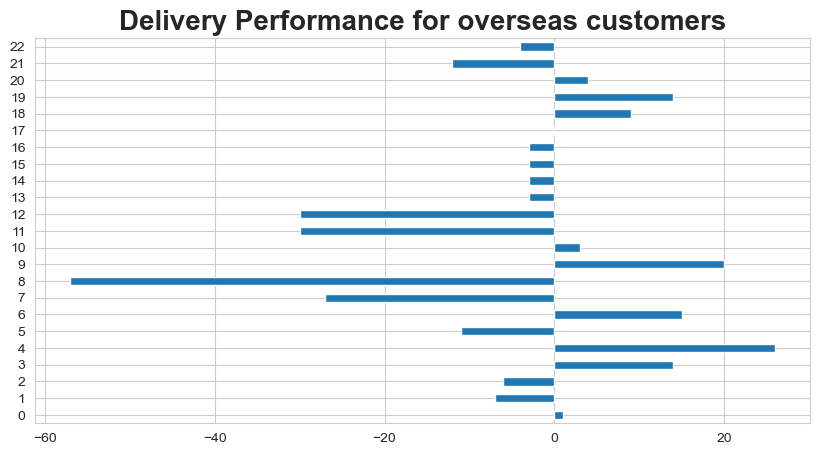

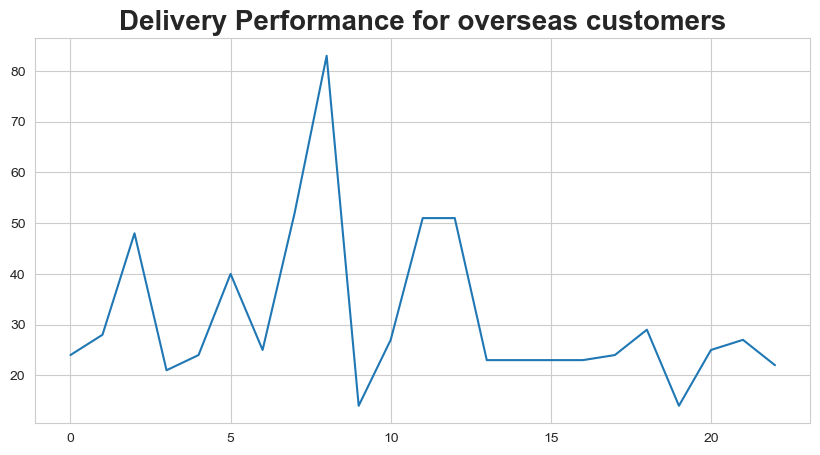

In [326]:
overseasCustomers = customerDensity[customerDensity.geolocation_lat > 10]
overseasCustomers.head()

overseasAnalysis = overseasCustomers[['customer_unique_id']].merge(customers, on = 'customer_unique_id').merge(orders, on = 'customer_id').merge(orderItems, on = 'order_id')
overseasAnalysis.head()

overseasAnalysis.delivered_estimated.plot(kind = 'barh', figsize = (10, 5))
plt.title('Delivery Performance for overseas customers', fontsize=20, fontweight = 'bold')
plt.show()

overseasAnalysis.purchased_delivered.plot(kind = 'line', figsize = (10, 5))
plt.title('Delivery Performance for overseas customers', fontsize=20, fontweight = 'bold')
plt.show()